UFRJ/COPPE/PEE<br>
COC800 Data Mining - Trabalho Final<br>
Alunos: Gustavo Martins da Silva Nunes e Michel Morais Ferreira<br>
Prof:   Alexandre G. Evsukoff

# Census Income Dataset

## Introdução
<div align="justify">
Este notebook apresenta o desenvolvimento da análise de dados realizada para o trabalho final da disciplina COC800 Data Mining no período letivo de 2018/1. 
</div>

### Apresentação do Problema
<div align="justify">
A base de dados [Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) é um subconjunto dos dados obtidos no censo demográfico realizado nos Estados Unidos no ano de 1994[1]. O dataset a ser estudado possui 15 variáveis das 40 utilizadas no conjunto de dados do censo realizado[2], sendo 14 destas variáveis informações sobre a população, tais como idade, raça, profissão, horas de trabalho por semana entre outras, e uma variável que representa se o cidadão recebe anualmente mais de \$50.000 dólares ao ano ou não. A tarefa a ser realizada no estudo desse conjunto de dados é a tarefa de classificação dos cidadãos em duas classes: cidadãos com ganhos anuais iguais ou superiores a $50.000 por ano, ou cidadãos com ganhos inferiores a este. 
  
A escolha por este dataset foi motivada devido à variedade de informações a serem tratadas, tais como dados faltantes e a necessidade do tratamento de variáveis mistas(variáveis contínuas e variáveis categóricas), além do extenso número de artigos que foram escritos utilizando esta base de dados como base de comparação de performance de algoritmos de diversos modelos de aprendizado de máquinas.
</div>

### Objetivo
<div align="justify">
O trabalho tem como objetivo utilizar os modelos estudados durante o curso para classificarmos com a maior acurácia possível os cidadãos nos dois grupos de renda citados anteriormente. Após o treinamento dos modelos, será feita a comparação entre a performance dos modelos.
</div>

### Análise Caracterização e Visualização de Dados
<div align="justify">
Será realizada a análise exploratória dos dados para a averiguação dos dados e compreensão dos mesmos. A fase de exploração de dados será decisiva para a construção de um modelo consistente para a classificação correta pro das classes do problema. Durante a análise exploratória, serão verificados os itens exigidos para o projeto:
</div>

- estatísticas básicas exigidas: Mínimos, máximos, médias, desvios padrões, etcs; <br>
- Avaliação de histogramas e características das variáveis; <br>
- Verificação da existência de outliers; <br>
- Verificação da correlação entre as variáveis. <br>
 
Após a fase de caracterização e visualização de dados exigida pelos requisitos do trabalho, será realizado o pré-processamento dos dados, a fim de adequar os dados para o treinamento dos modelos de aprendizado de máquinas. 
</div>

## Análise Exploratória dos Dados

In [2]:
# Importanto os módulos necessários para o processamento dos dados
import numpy   as np
import pandas  as pd

# Módulos necessários para visualização dos dados
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# O arquivo de dados não possui headers; Incluir uma lista de nomes das features
features = ['age','workclass','fnlwgt','education','education-num','marital-status',
            'occupation','relationship','race','sex','capital-gain','capital-loss',
            'hours-per-week','native-country','earnings']

# Importando os dados do dataset
training_data = pd.read_csv('Data/train.txt',names=features,index_col=False)
test_data = pd.read_csv('Data/test.txt',names=features,index_col=False)

# União do dataset
data = pd.concat([training_data,test_data],ignore_index=True)

In [3]:
len_training, len_test = len(training_data)/len(data), len(test_data)/len(data)
print('Porcentagem do conjunto de treinamento: {:.2f}\nPorcentagem do conjunto de teste: {:.2f}'.format(len_training,len_test))

Porcentagem do conjunto de treinamento: 0.67
Porcentagem do conjunto de teste: 0.33


### Verificação inicial do conjunto de dados

Utilizando gráficos simples, este contato inicial com os dados do problema nos ajuda a entender melhor os dados, assim como incentivar quais perguntas devemos nos fazer em relação às informações presentes.

In [4]:
# Verificando alguns exemplos da base
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [5]:
# Verificando os tipos de dados presentes
print(data.dtypes)

age                object
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
earnings           object
dtype: object


Por algum motivo, a feature <i>age</i> é considerada object, quando deveria ser considerada float64. Possivelmente alguma entrada pode ter sido escrita como string.

In [6]:
# Verificando a feature age
data.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, '|1x3 Cross validator', '25', '38', '28', '44',
       '18', '34', '29', '63', '24', '55', '65', '36', '26', '58', '48',
       '43', '20', '37', '40', '72', '45', '22', '23', '54', '32', '46',
       '56', '17', '39', '52', '21', '42', '33', '30', '47', '41', '19',
       '69', '50', '31', '59', '49', '51', '27', '57', '61', '64', '79',
       '73', '53', '77', '80', '62', '35', '68', '66', '75', '60', '67',
       '71', '70', '90', '81', '74', '78', '82', '83', '85', '76', '84',
       '89', '88', '87'], dtype=object)

Como esperando, havia uma instância na base com a idade preenchida de forma incorreta, e números inseridos como strings. Removendo o exemplo preenchido incorretamente:

In [7]:
# Verificando a instância com erro
index = data[data.age == '|1x3 Cross validator'].index[0]

# Removendo-a da base
data.drop(index,inplace=True)

In [8]:
# Convertendo strings em números
data.age = data.age.astype(float)

In [9]:
# Verificando novamente os tipos presentes de variáveis
print(data.dtypes)

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
earnings           object
dtype: object


In [10]:
print('Quantidade de exemplos presentes no dataset: {}\nQuantidade de features presentes: {}'.format(*data.shape))

Quantidade de exemplos presentes no dataset: 48842
Quantidade de features presentes: 15


##### Verificando a existência de duplicatas

In [11]:
# Registros duplicados

print('Quantidade de registros duplicados: %d' % data[data.duplicated()].shape[0])
print('Porcentagem de registros duplicados: %.2f %%' % ((data[data.duplicated()].shape[0])/data.shape[0]*100))

Quantidade de registros duplicados: 29
Porcentagem de registros duplicados: 0.06 %


##### Amostrando o dataset

In [12]:
fracao_dataset = 0.1

# data_amostrado = data.sample(frac=0.1, replace=False, random_state=0)

data = data.sample(frac=fracao_dataset, replace=False, random_state=0)

##### Estatísticas do conjunto de dados

In [13]:
# Estatísticas relacionadas às variáveis contínuas (float64)
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,4884.000000,4.884000e+03,4884.000000,4884.000000,4884.000000,4884.000000
mean,38.734029,1.916647e+05,9.996314,1117.135954,85.260442,40.296274
std,13.899478,1.057457e+05,2.576932,8097.651020,396.556896,12.249040
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.200595e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.808825e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.420185e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,3004.000000,99.000000


In [14]:
# Estatísticas relacionadas às variáveis contínuas no dataset amostrado
# data_amostrado.describe()

In [15]:
data.fnlwgt.min(), data.fnlwgt.max()

(13769.0, 1455435.0)

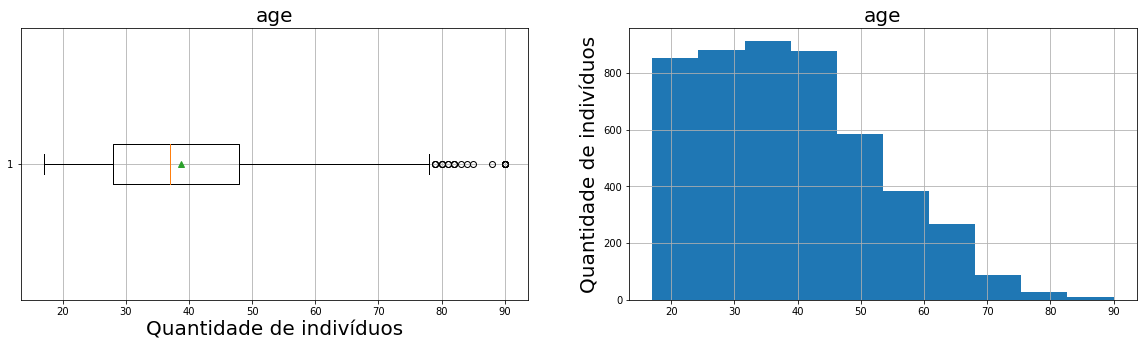

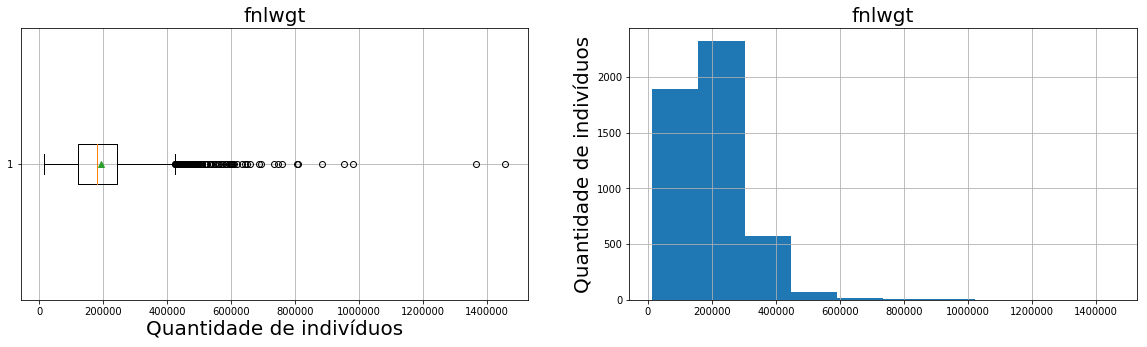

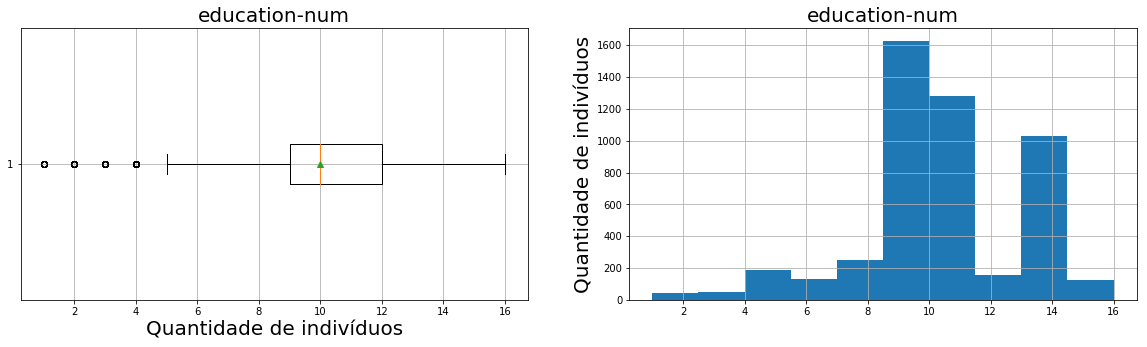

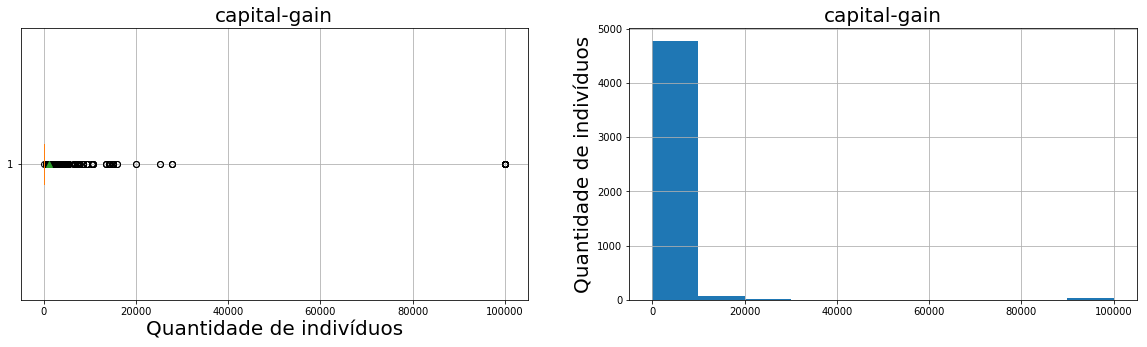

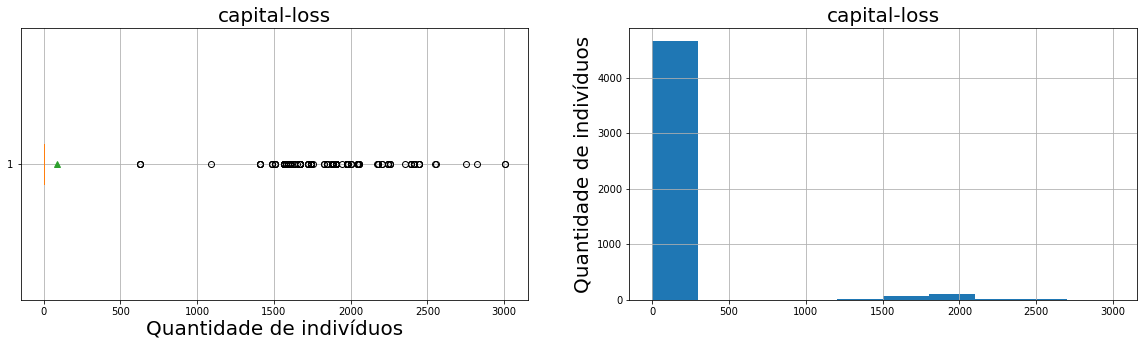

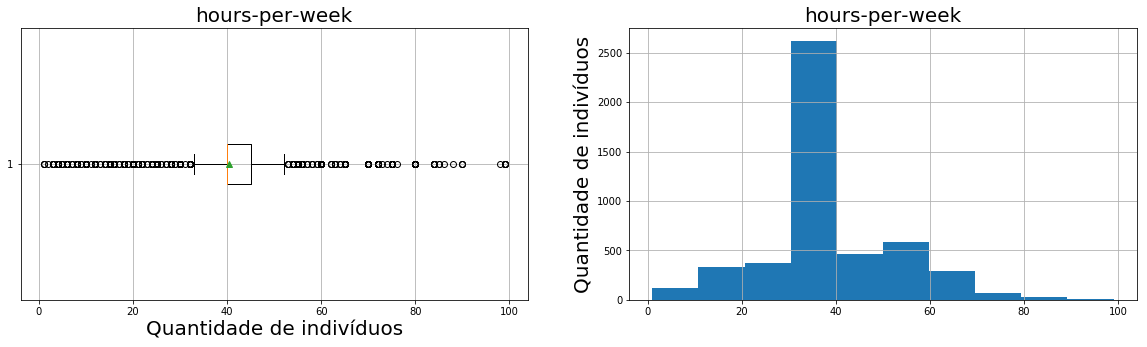

In [16]:
# Visualização das features numéricas

for feature in list(data.select_dtypes(include=['float64']).columns):
    # Configuração dos plots
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.title(feature,fontsize=20)
    plt.xlabel('Quantidade de indivíduos',fontsize=20)
    plt.boxplot(data[feature],showmeans=True,vert=False)
    plt.grid()
    
    plt.subplot(122)
    plt.title(feature,fontsize=20)
    plt.ylabel('Quantidade de indivíduos',fontsize=20)
    plt.hist(data[feature])
    plt.grid()
    
plt.show()

In [16]:
# Visualização das features numéricas no dataset amostrado

# for feature in list(data_amostrado.select_dtypes(include=['float64']).columns):
#     # Configuração dos plots
#     plt.figure(figsize=(20,5))
#     plt.subplot(121)
#     plt.title(feature,fontsize=20)
#     plt.xlabel('Quantidade de indivíduos',fontsize=20)
#     plt.boxplot(data_amostrado[feature],showmeans=True,vert=False)
#     plt.grid()
    
#     plt.subplot(122)
#     plt.title(feature,fontsize=20)
#     plt.ylabel('Quantidade de indivíduos',fontsize=20)
#     plt.hist(data_amostrado[feature])
#     plt.grid()
    
# plt.show()

##### Estatísticas relacionadas às variáveis categóricas (Binárias, Nominais e Ordinais)

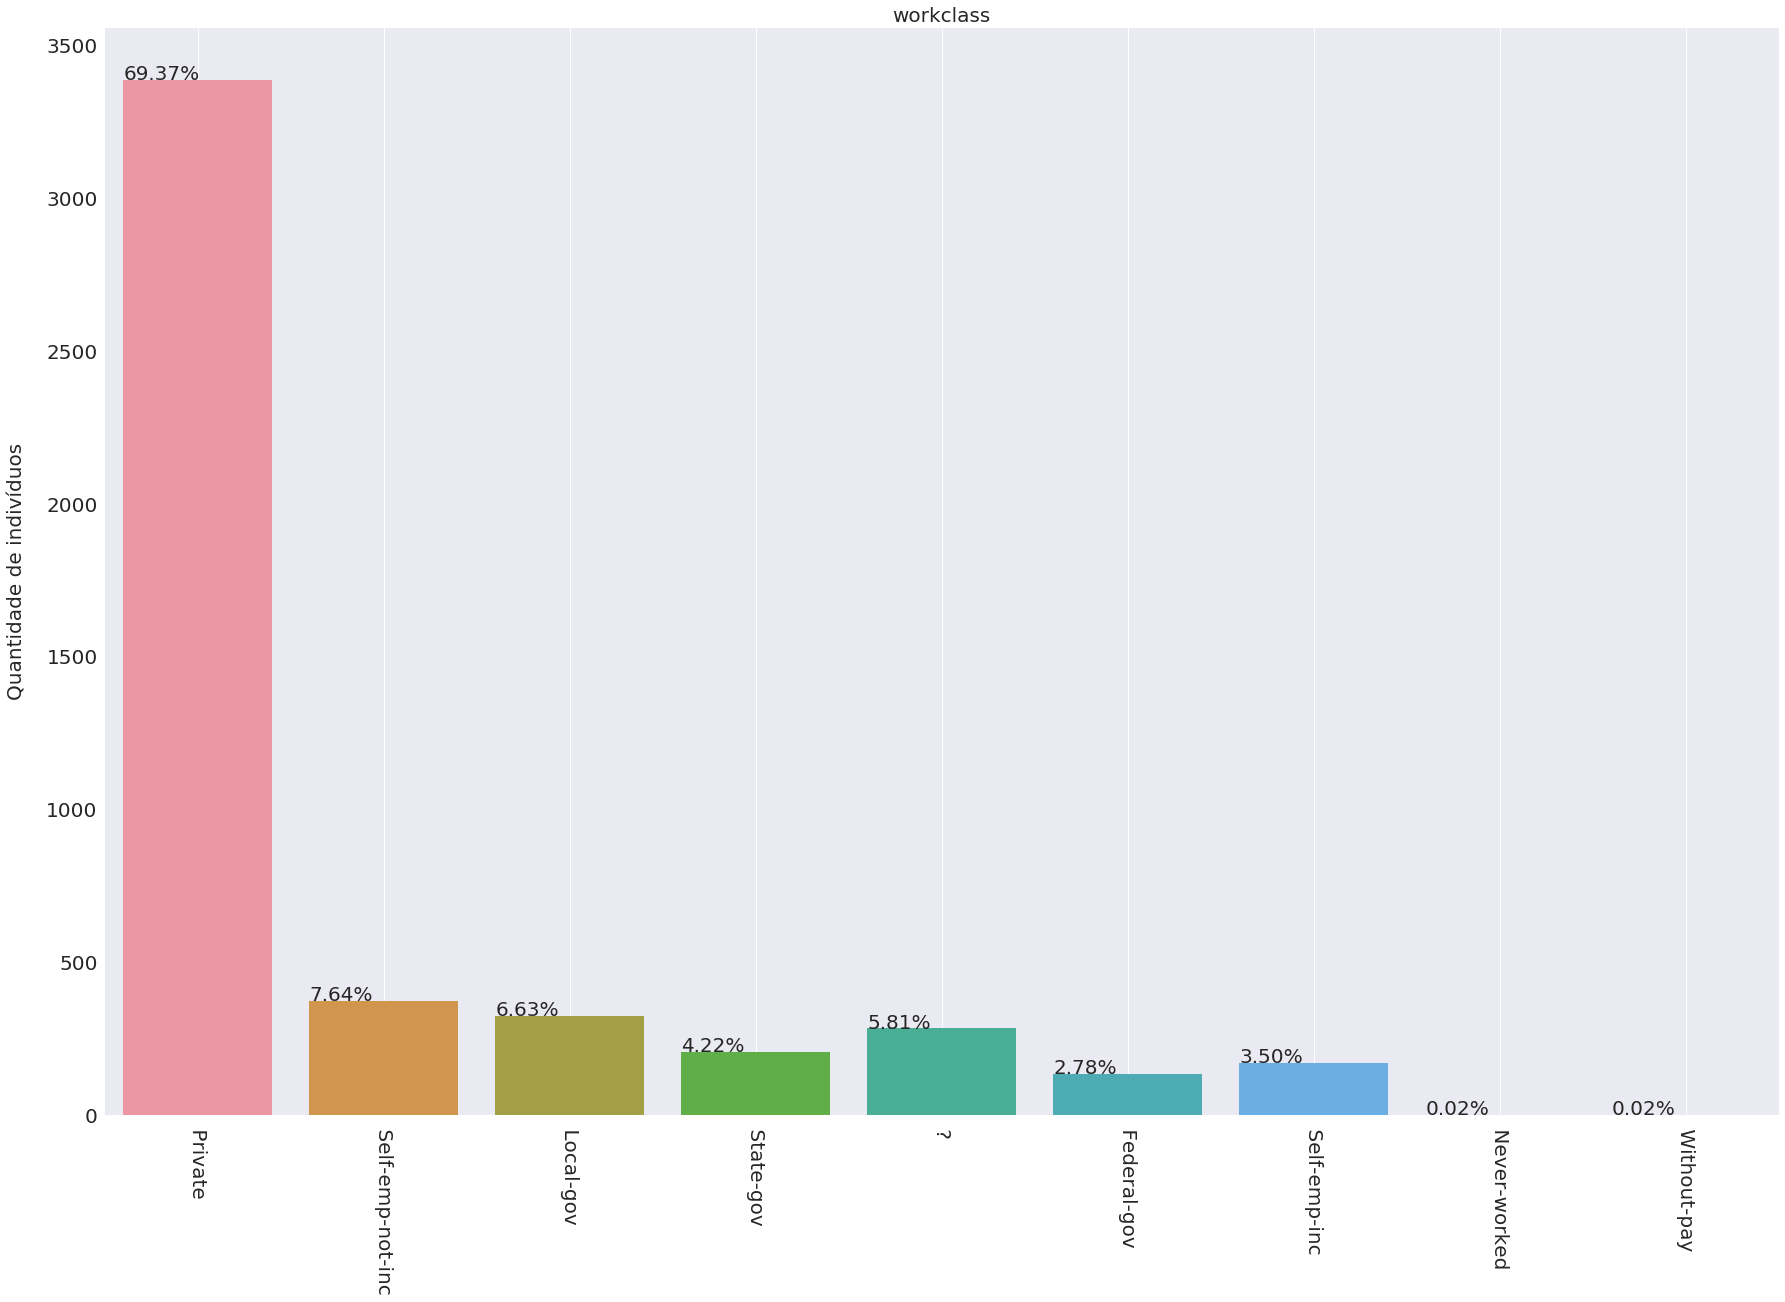

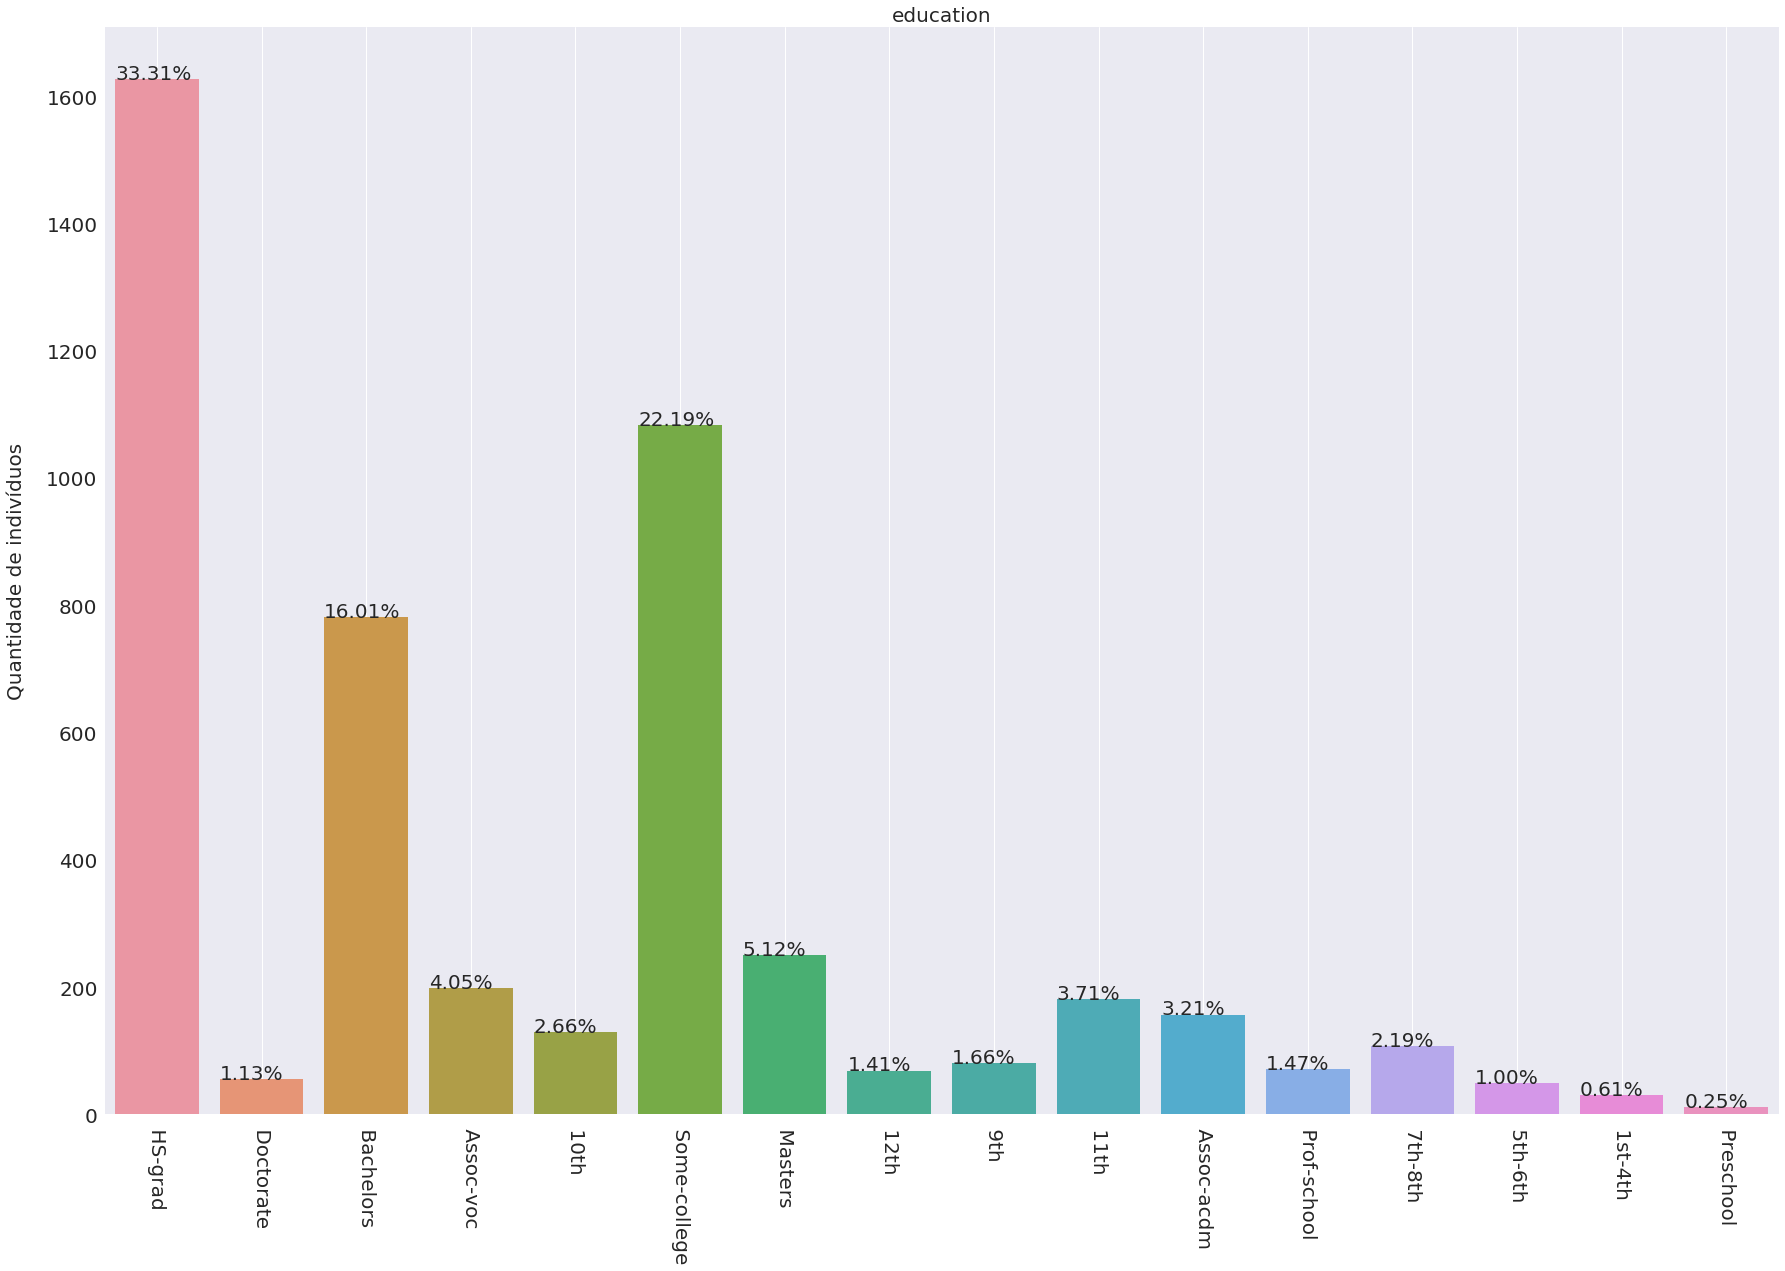

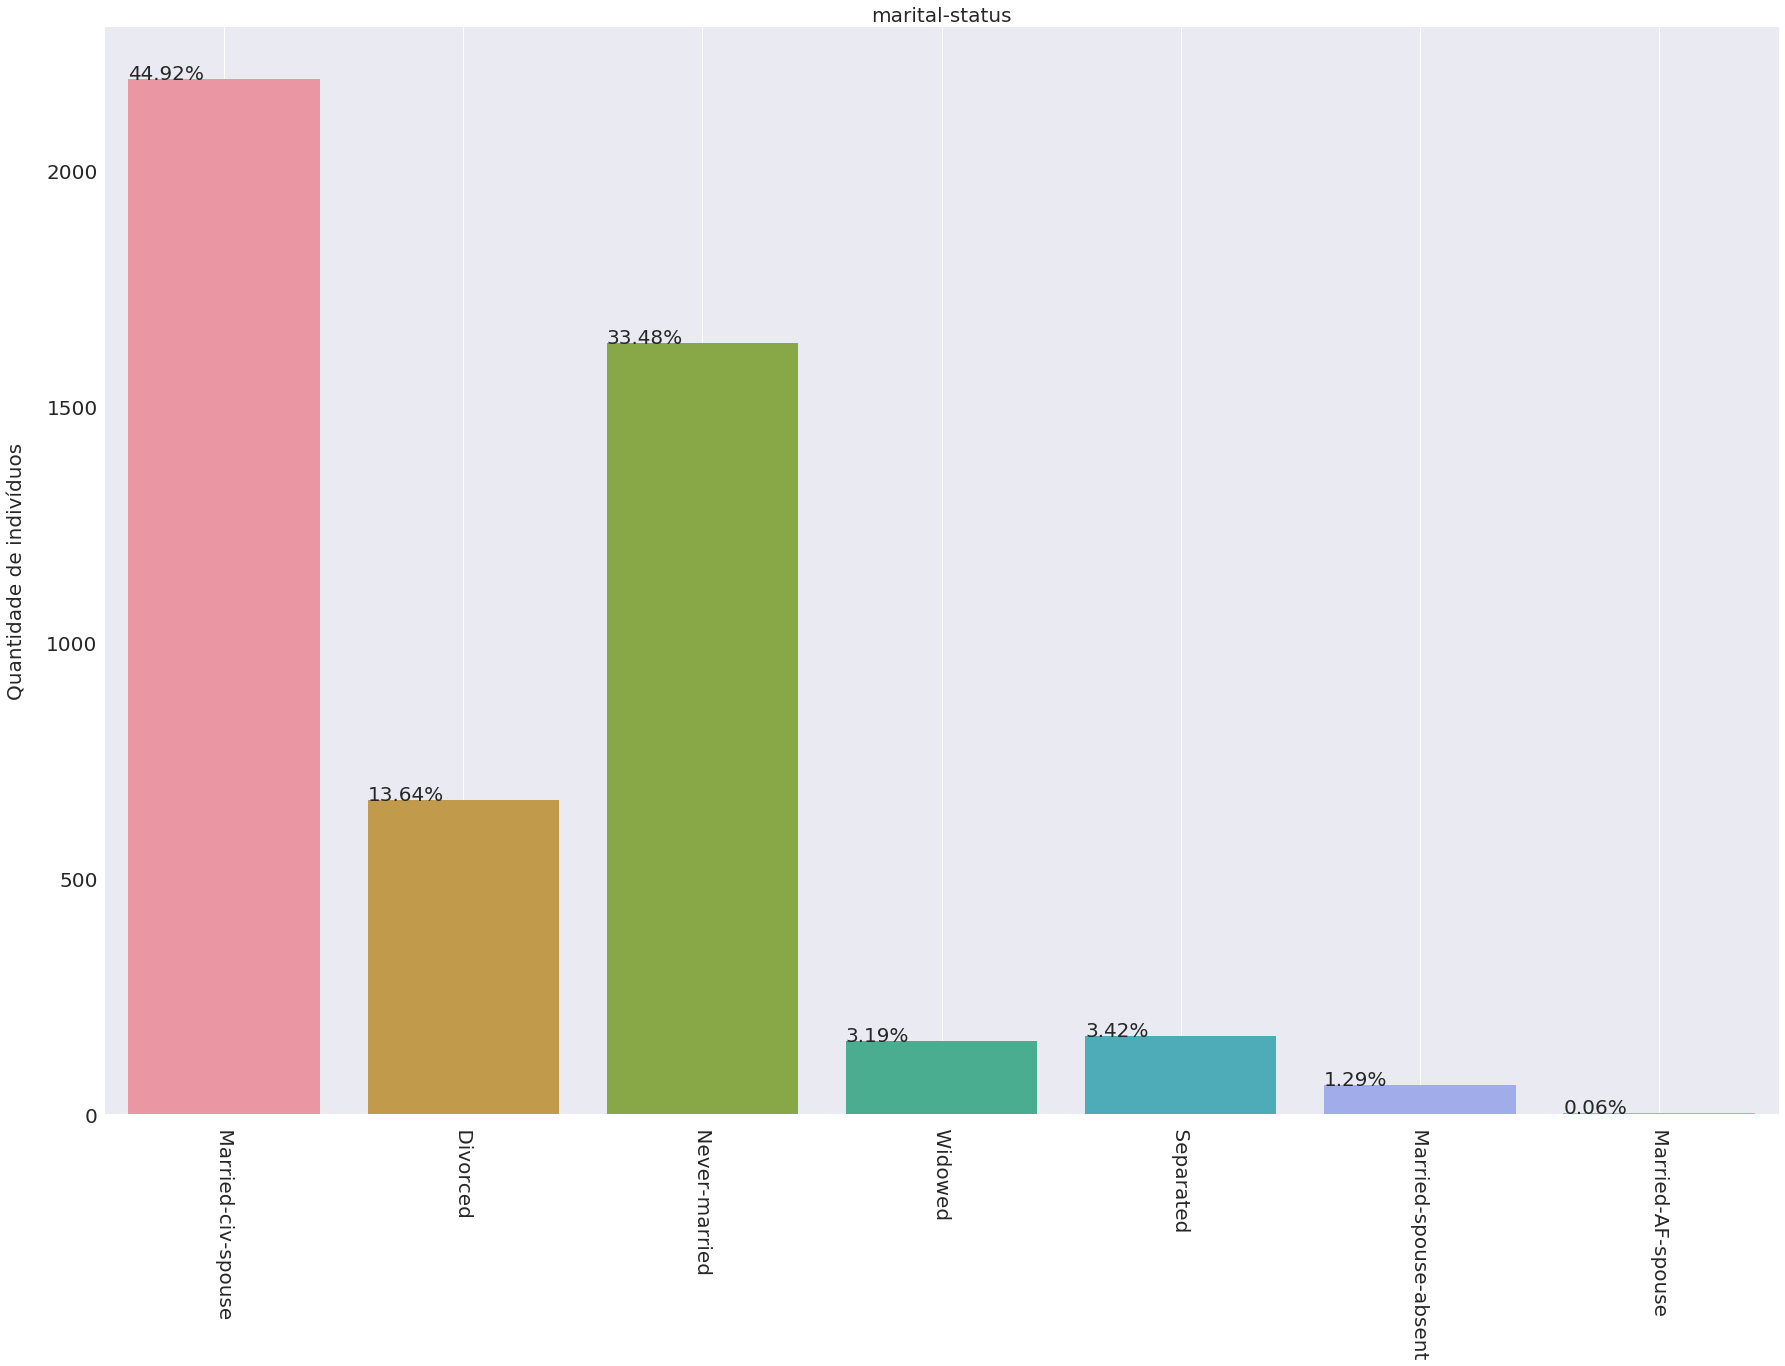

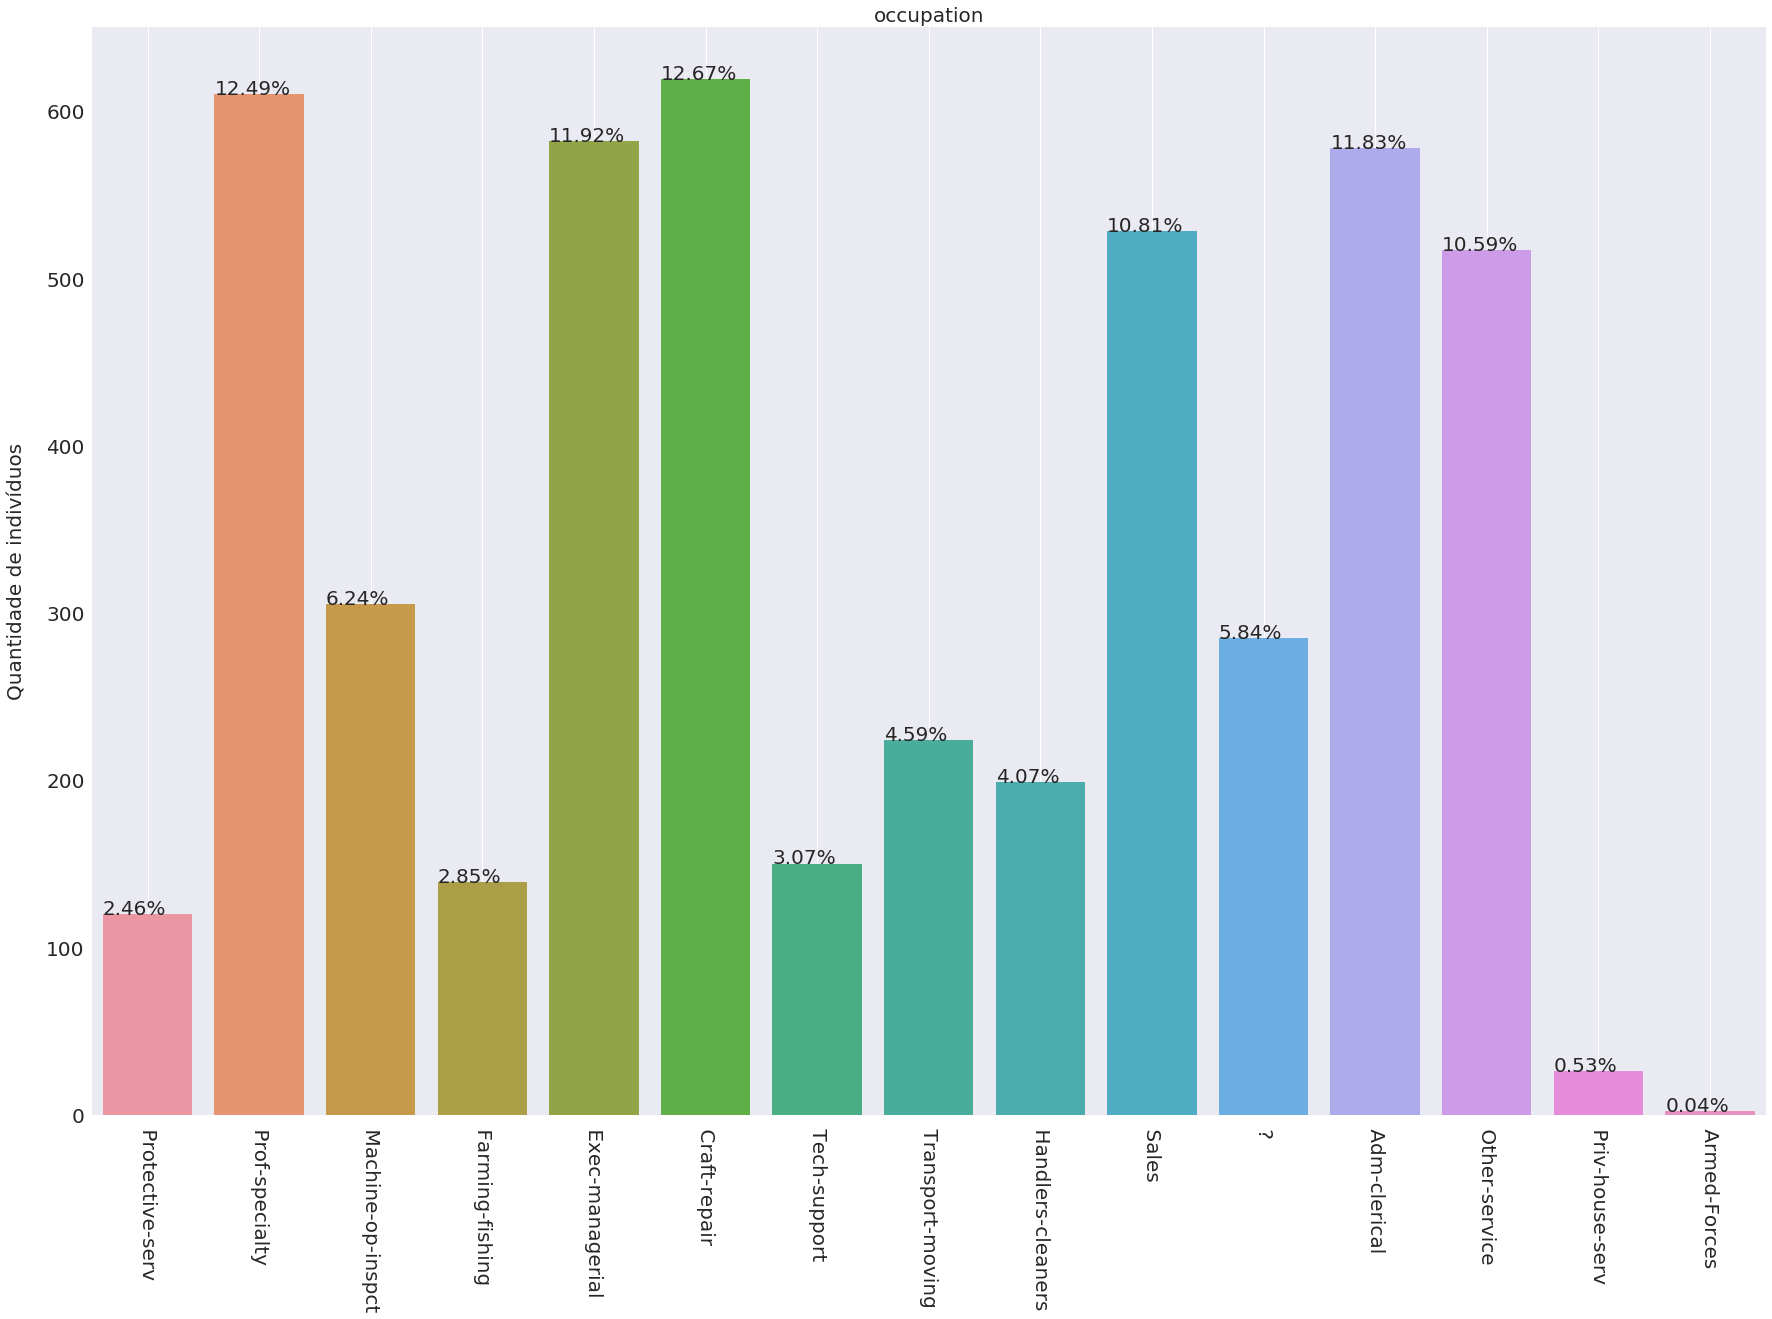

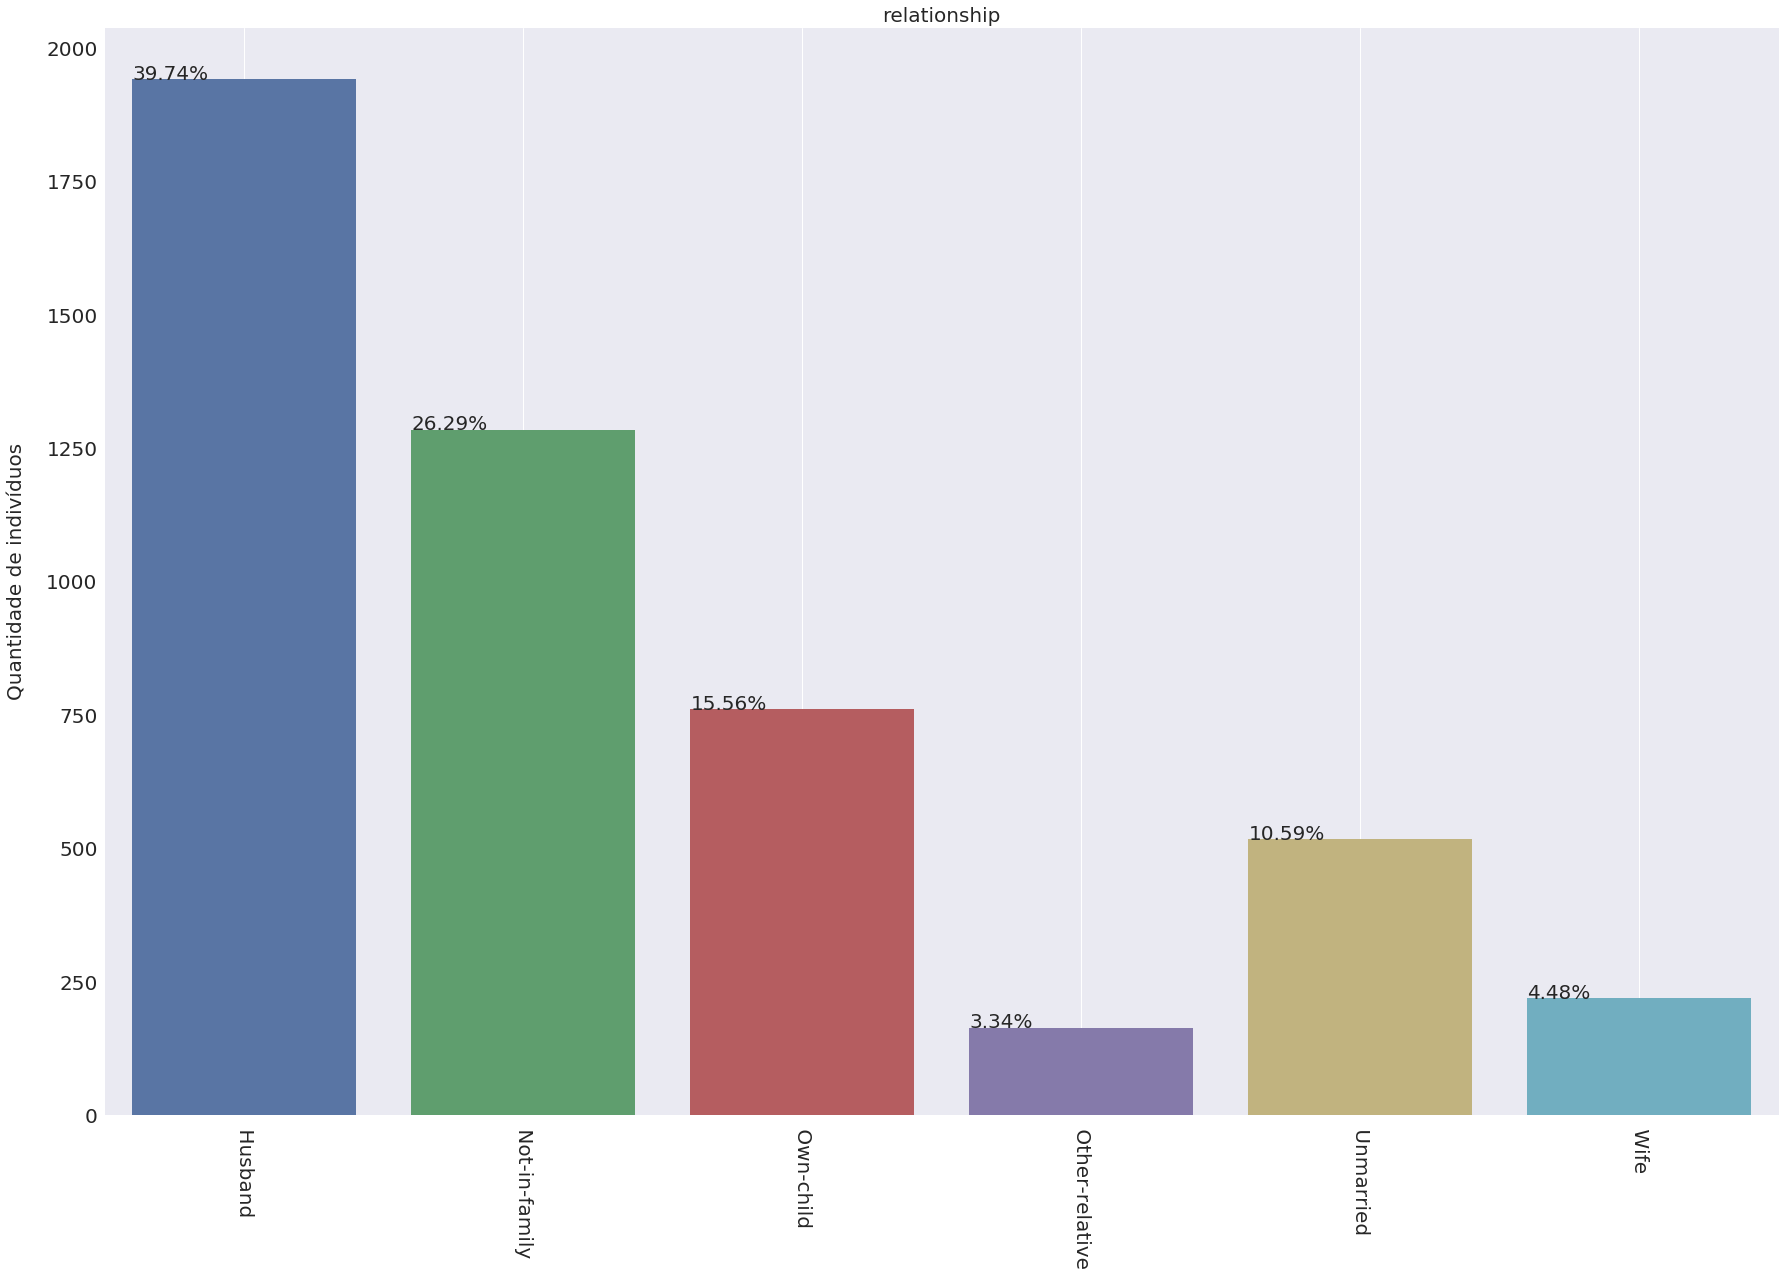

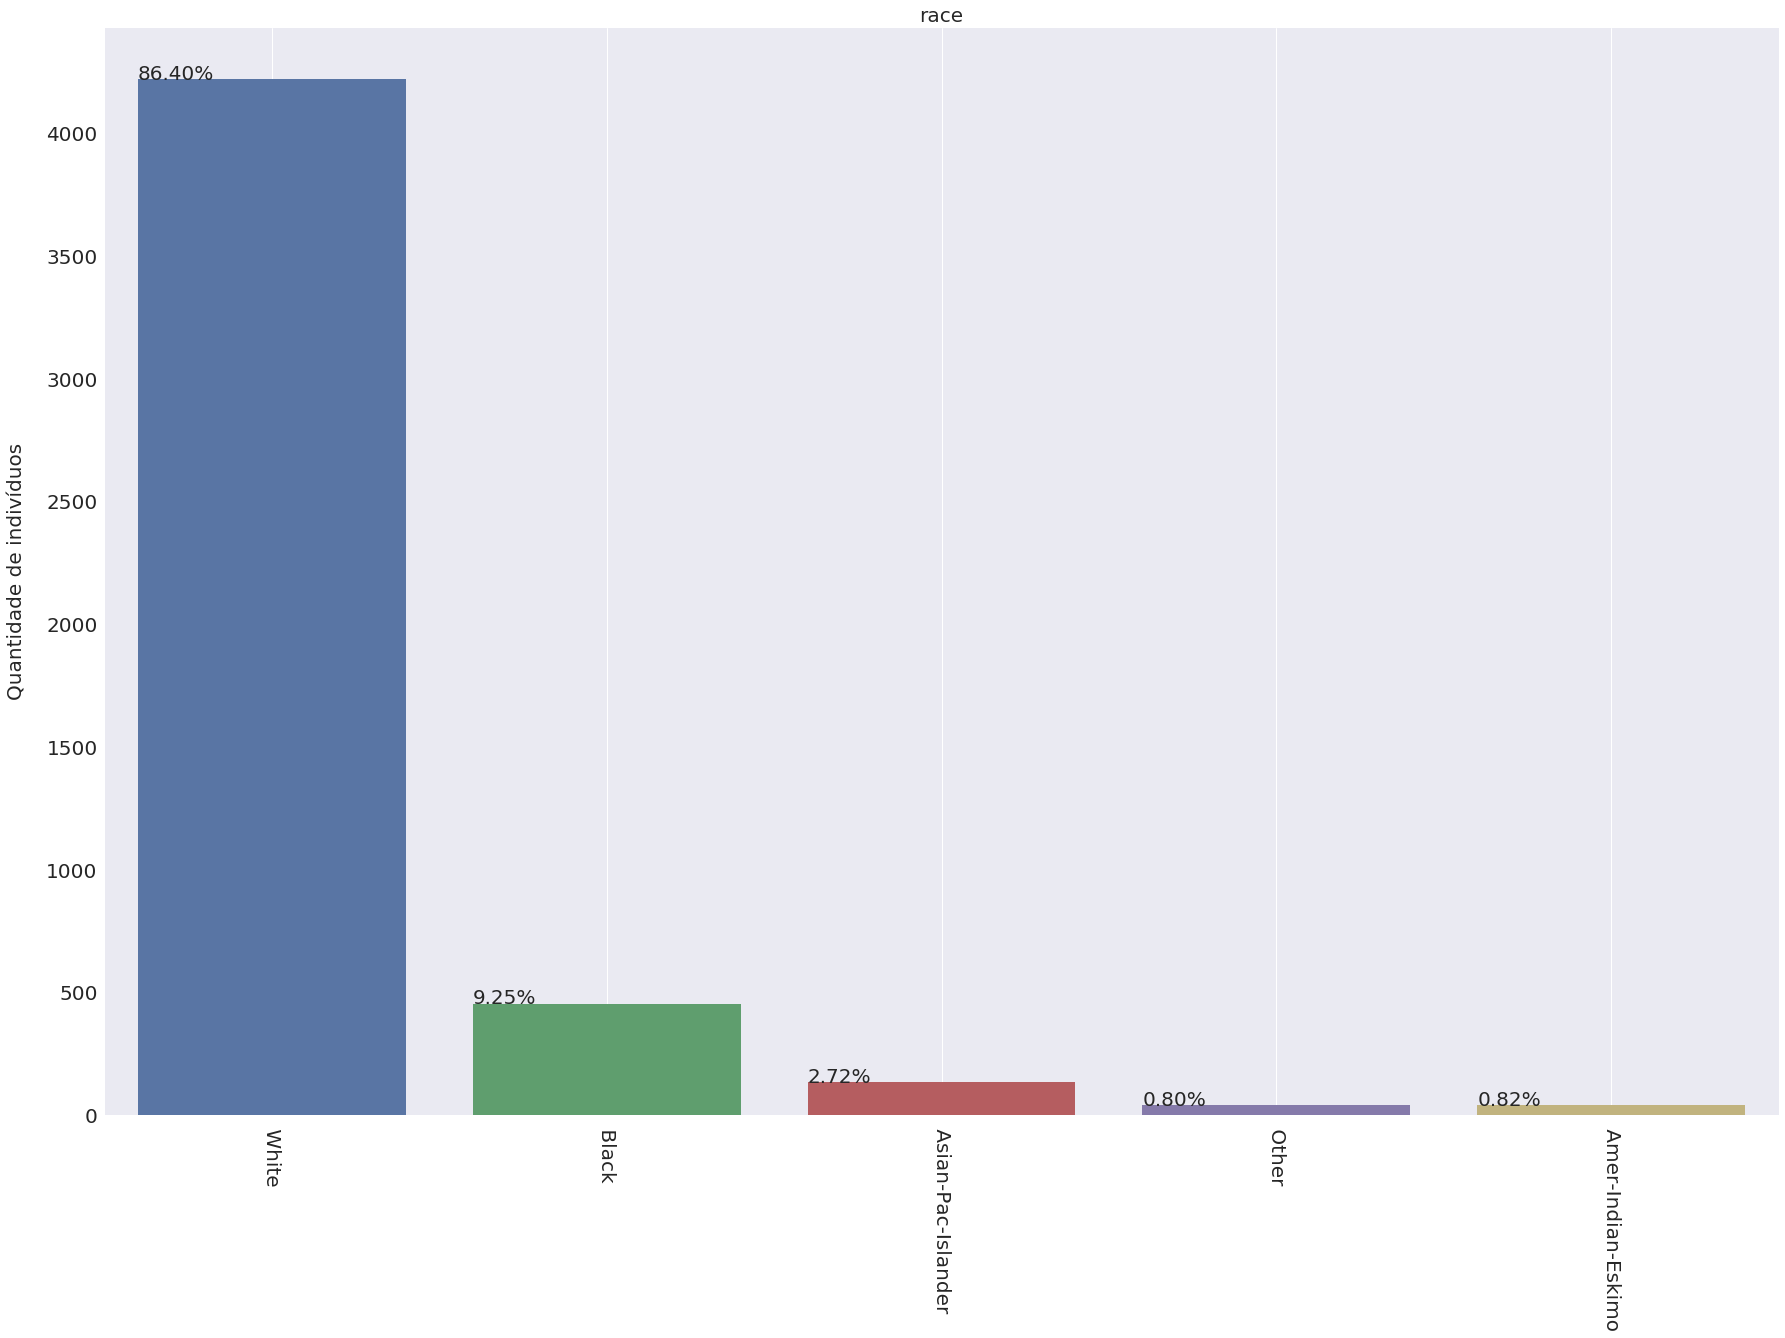

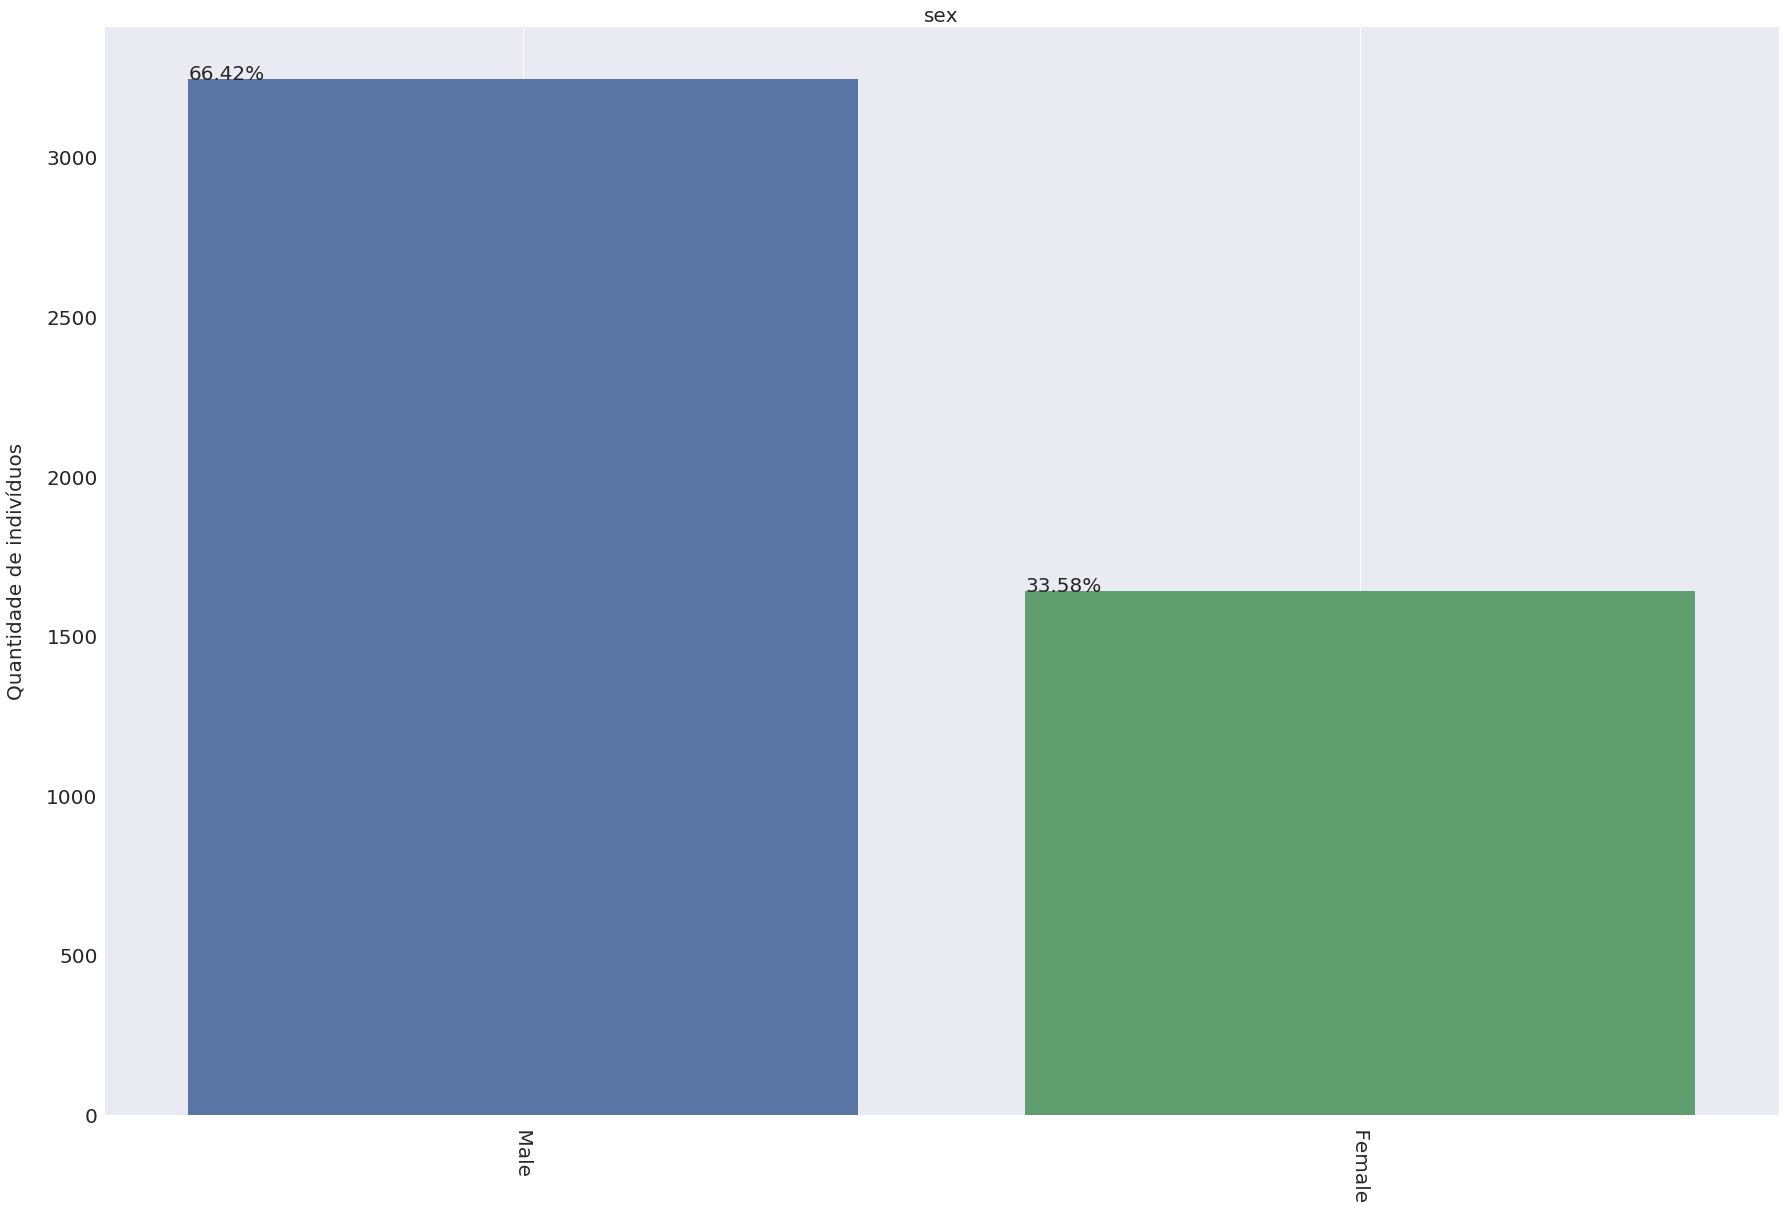

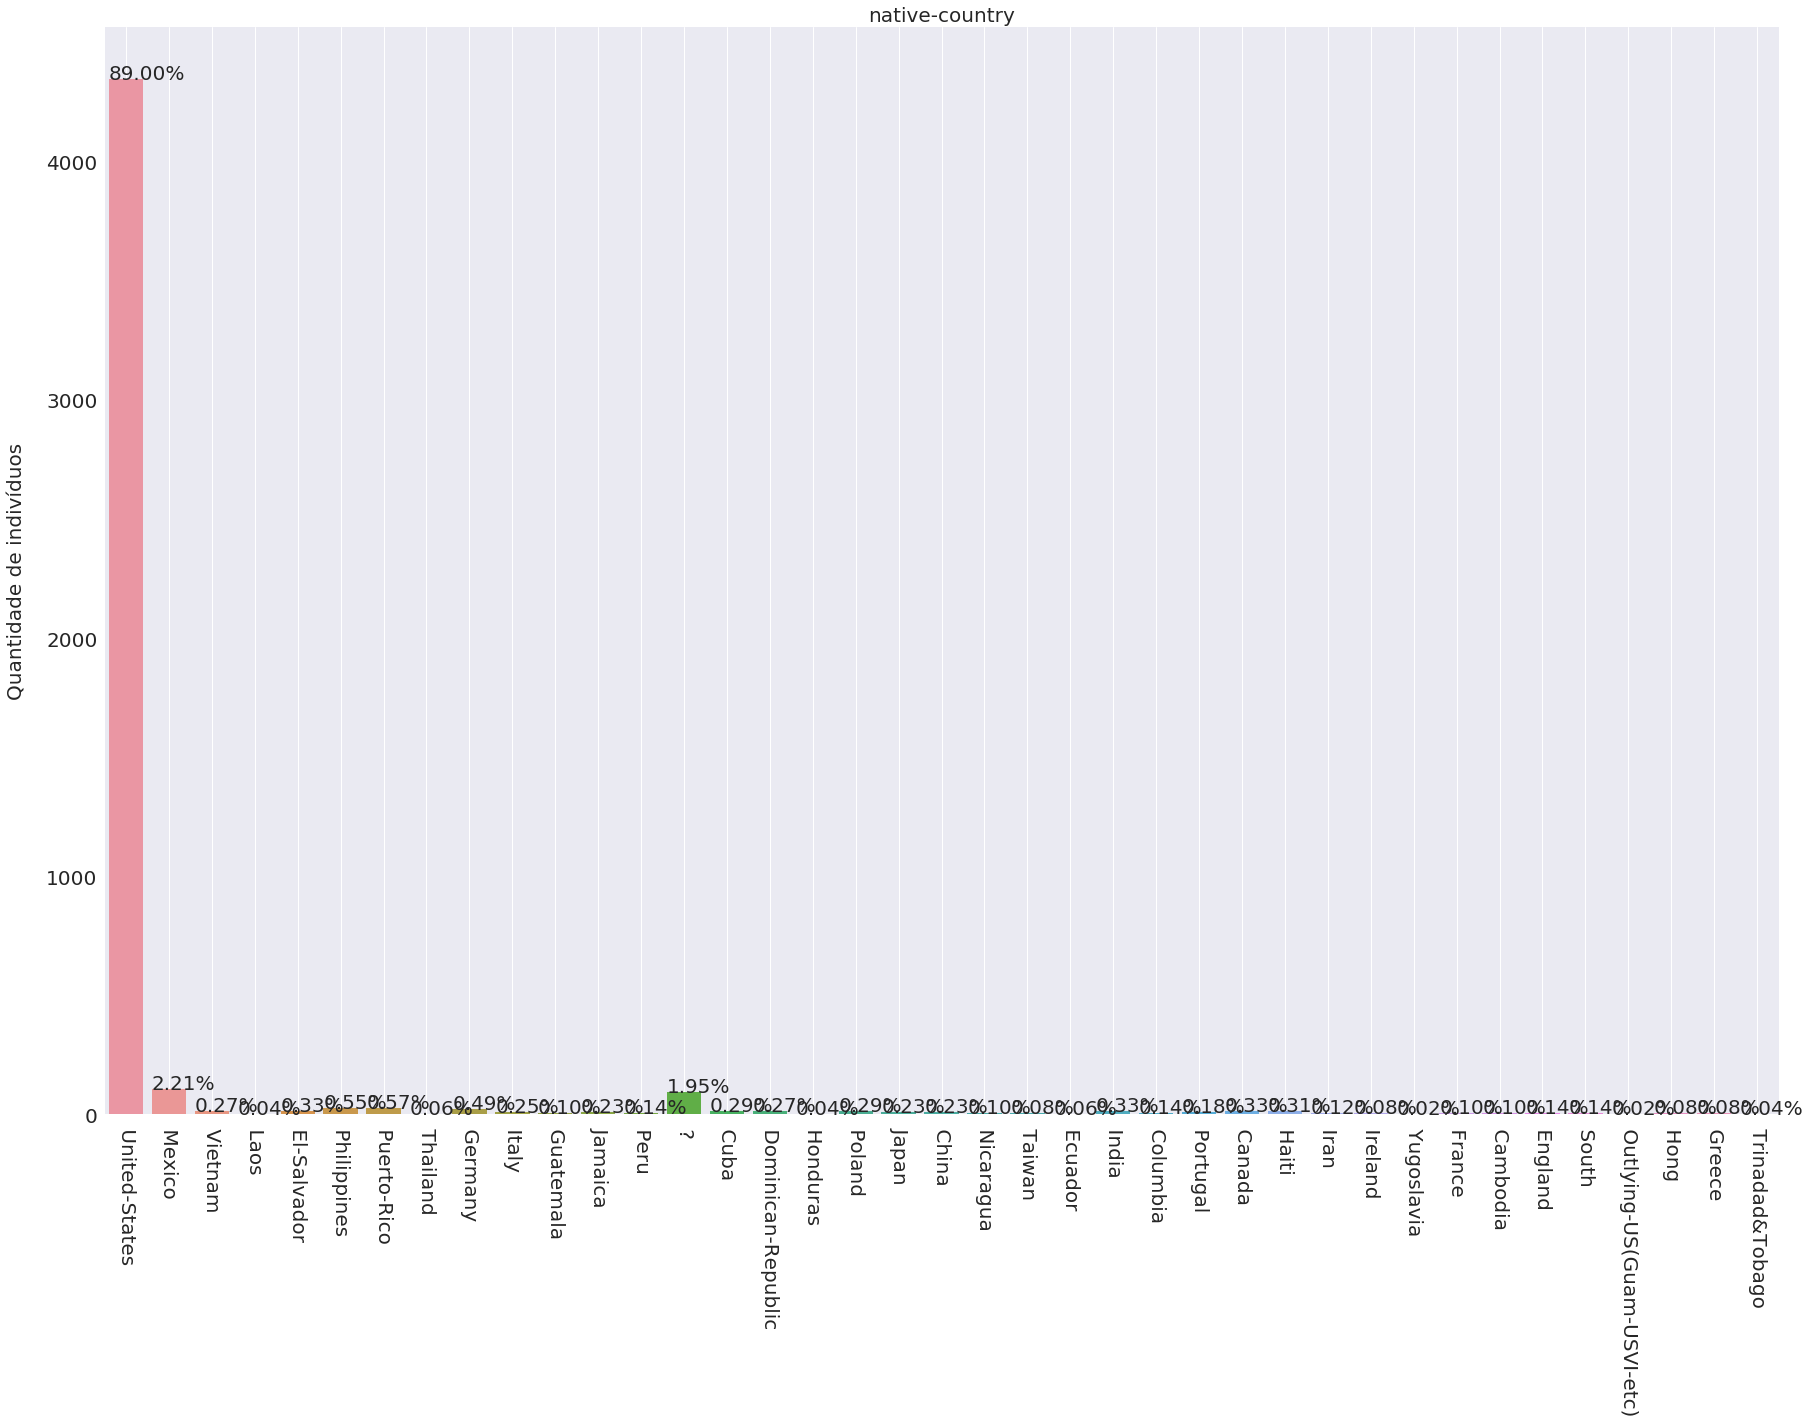

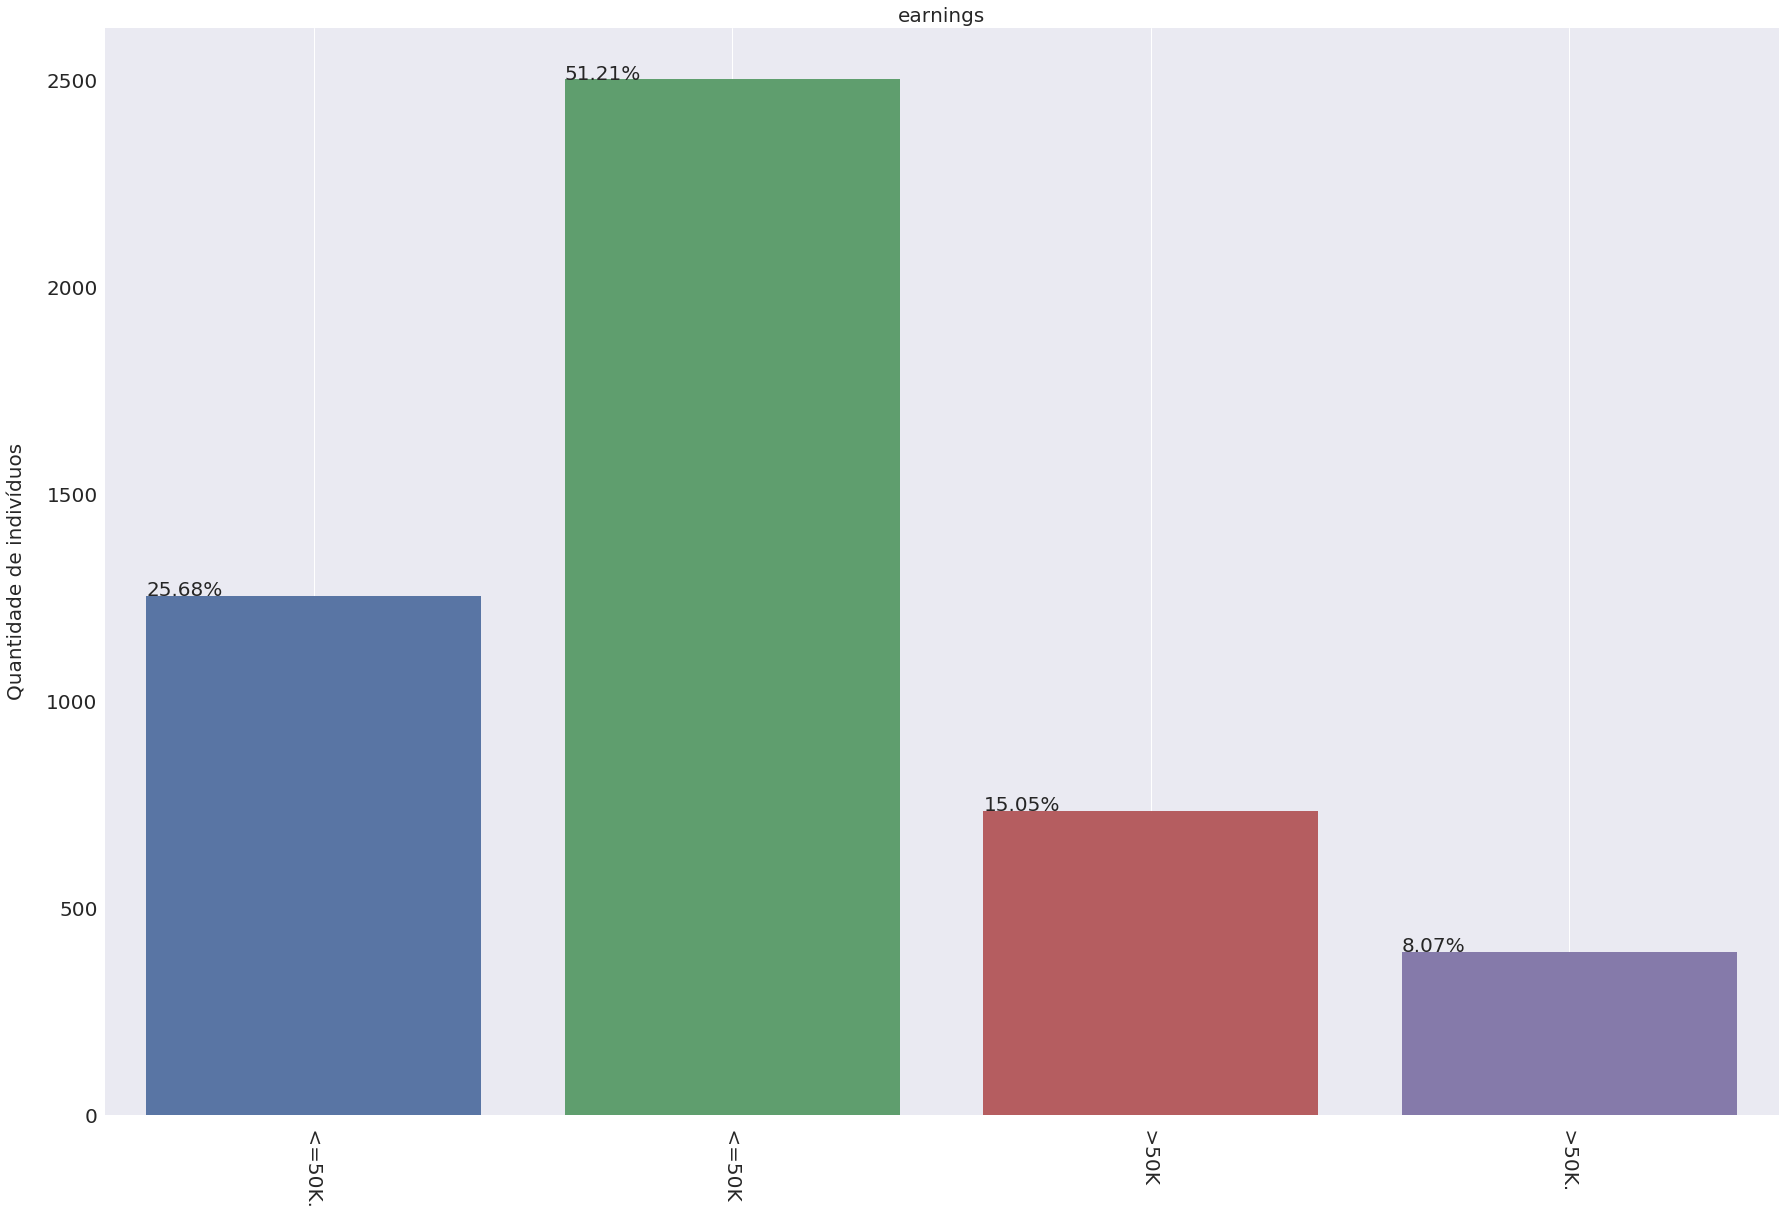

In [19]:
# Visualização das features categóricas

sns.set(style="darkgrid")

path_arquivos = 'Graficos/'

for feature in list(data.select_dtypes(include=['object']).columns):
    # Configuração dos plots
    fig = plt.figure(figsize=(30,20))
#     plt.title(feature,fontsize=20)
#     plt.ylabel('Quantidade de indivíduos',fontsize=20)
    
    # Configurando os textos no gráfico
#     ax = sns.countplot(data[feature],hue='earnings',data=data)    
#     ax = sns.countplot(data[feature],label='Distribuição das idades')
    ax = sns.countplot(data[feature])
#     ax = data[feature].value_counts().plot.bar()
#     ax = data[feature].value_counts().plot.pie(autopct="%1.0f%%", fontsize=20)
    ax.set_alpha(0.8)
#     ax.set_facecolor('xkcd:light gray')
    
    for patch in ax.patches:
#         ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=20)
        ax.text(patch.get_x(), patch.get_height(), "{:.2f}%".format((int(patch.get_height())/data.shape[0]*100)),fontsize=20)
        plt.xticks(rotation=-90,fontsize=14)
    
    plt.ylabel('Quantidade de indivíduos',fontsize=20, labelpad=20)
    plt.xlabel('')
    plt.title(feature,fontsize=20)
    plt.xticks(fontsize=20, rotation=-90)
    plt.yticks(fontsize=20)
#     plt.legend(fontsize=20)
    plt.grid()
    fig.set_size_inches(30,20)
    plt.savefig(path_arquivos+feature+'-barplot.png')

plt.show()

In [18]:
# # Visualização das features categóricas no dataset amostrado

# sns.set(style="darkgrid")

# path_arquivos = 'Graficos/'

# for feature in list(data_amostrado.select_dtypes(include=['object']).columns):
#     # Configuração dos plots
#     plt.figure(figsize=(28,22))
# #     plt.title(feature,fontsize=20)
# #     plt.ylabel('Quantidade de indivíduos',fontsize=20)
    
#     # Configurando os textos no gráfico
# #     ax = sns.countplot(data_amostrado[feature],hue='earnings',data=data)    
# #     ax = sns.countplot(data_amostrado[feature],label='Distribuição das idades')
#     ax = sns.countplot(data_amostrado[feature])
# #     ax = data_amostrado[feature].value_counts().plot.bar()
# #     ax = data_amostrado[feature].value_counts().plot.pie(autopct="%1.0f%%", fontsize=20)
#     ax.set_alpha(0.8)
# #     ax.set_facecolor('xkcd:light gray')
    
#     for patch in ax.patches:
# #         ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=20)
#         ax.text(patch.get_x(), patch.get_height(), "{:.2f}%".format((int(patch.get_height())/data_amostrado.shape[0]*100)),fontsize=20)
#         plt.xticks(rotation=-90,fontsize=14)
    
#     plt.ylabel('Quantidade de indivíduos',fontsize=15)
#     plt.xlabel('')
#     plt.title(feature,fontsize=15)
#     plt.xticks(fontsize=15, rotation=-90)
#     plt.yticks(fontsize=15)
# #     plt.legend(fontsize=20)
#     plt.grid()
# #     plt.savefig(path_arquivos+feature+'-barplot.png')

# plt.show()

##### Verificação de Valores Faltantes no Dataset

In [19]:
# Valores nulos são considerados como "?". Adicionar aos valores NaN presentes.
data.replace(' ?',np.NaN,inplace=True)
# data_amostrado.replace(' ?', np.NaN, inplace=True)

In [20]:
# Existência de valores nulos(NaN)
data.isnull().any()
# data_amostrado.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
earnings          False
dtype: bool

In [21]:
# Dados faltantes
print('Informações sobre dados faltantes:\n')
# Features com valores faltantes
features_faltantes = ['workclass', 'occupation', 'native-country']

# Guardando os índices com valores nulos
null_indexes = data.isnull().any(1).nonzero()[0]

# Porcentagem de valores faltantes
print('Quantidade de valores faltates: {}\nPorcentagem de valores faltantes: {:.3f}%'.format(len(null_indexes),100 * len(null_indexes)/len(data)))
print()

# Porcentagem de valores faltantes para cada feature
for feature in features_faltantes:
    print('Quantidade de valores faltantes para a feature {}: {}'.format(feature,data[feature].isnull().sum()))

Informações sobre dados faltantes:

Quantidade de valores faltates: 374
Porcentagem de valores faltantes: 7.658%

Quantidade de valores faltantes para a feature workclass: 284
Quantidade de valores faltantes para a feature occupation: 285
Quantidade de valores faltantes para a feature native-country: 95


In [22]:
# # Dados faltantes no dataset amostrado
# print('Informações sobre dados faltantes:\n')
# # Features com valores faltantes
# features_faltantes = ['workclass', 'occupation', 'native-country']

# # Guardando os índices com valores nulos
# null_indexes = data_amostrado.isnull().any(1).nonzero()[0]

# # Porcentagem de valores faltantes
# print('Quantidade de valores faltates: {}\nPorcentagem de valores faltantes: {:.3f}%'.format(len(null_indexes),100 * len(null_indexes)/len(data_amostrado)))
# print()

# # Porcentagem de valores faltantes para cada feature
# for feature in features_faltantes:
#     print('Quantidade de valores faltantes para a feature {}: {}'.format(feature,data_amostrado[feature].isnull().sum()))

A variável <i>Earnings</i> é uma variável binária que precisa de tratamento, pois as strings que representam as duas classes existentes no dataset estão com labels errados.

#### Tratamento da variável earnings

In [23]:
# Possíveis valores para a variável earnings
print(data.earnings.unique())
# print(data_amostrado.earnings.unique())

[' <=50K.' ' <=50K' ' >50K' ' >50K.']


In [24]:
# Tratamento da feature Earnings: 
data.earnings.replace([' <=50K',' <=50K.'],'<=50K',inplace=True)
data.earnings.replace([' >50K',' >50K.'],'>50K',inplace=True)
data.earnings.unique()

# data_amostrado.earnings.replace([' <=50K',' <=50K.'],'<=50K',inplace=True)
# data_amostrado.earnings.replace([' >50K',' >50K.'],'>50K',inplace=True)
# data_amostrado.earnings.unique()

array(['<=50K', '>50K'], dtype=object)

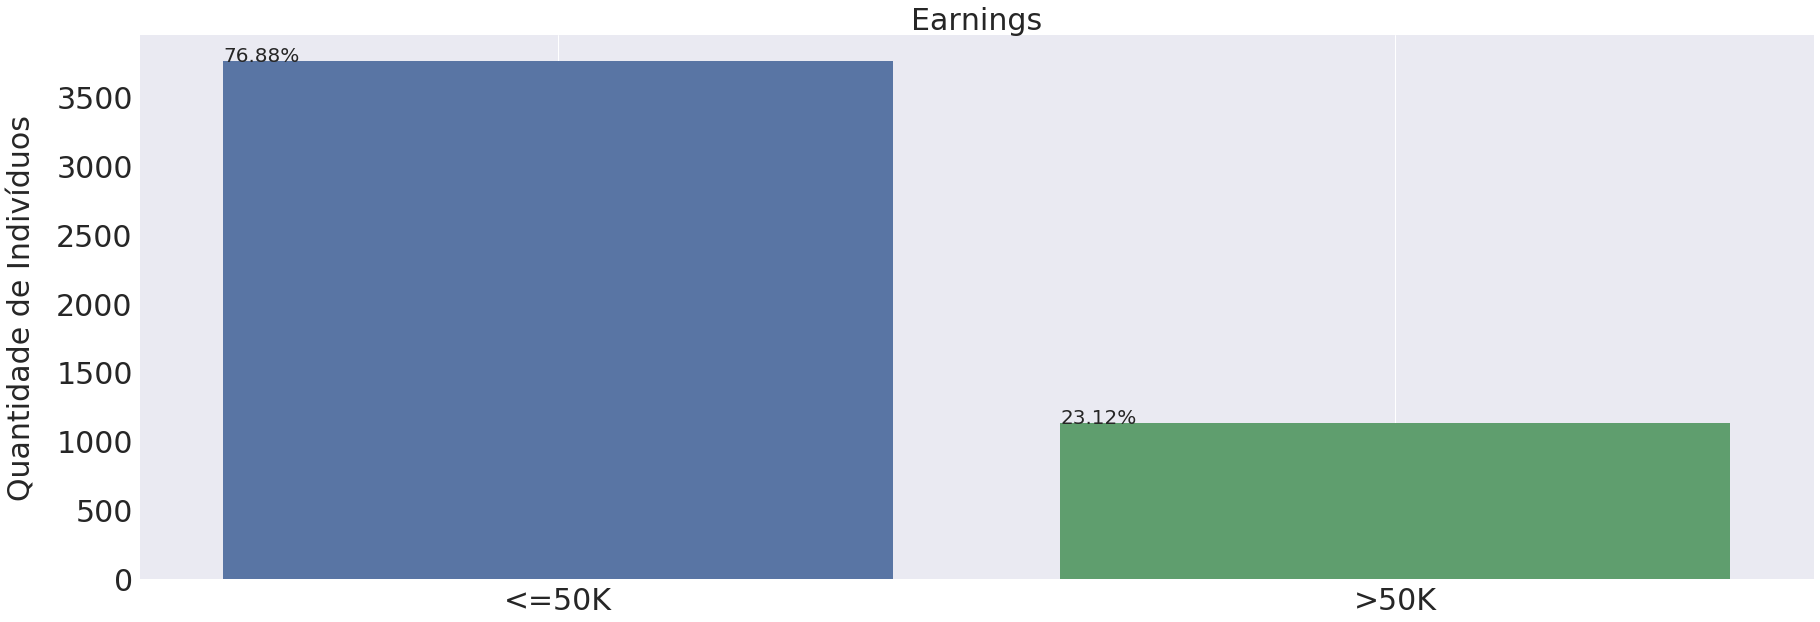

In [25]:
# Nova Visualização da variável Earnings

plt.figure(figsize=(30,10))

ax = sns.countplot(data.earnings)

for patch in ax.patches:
#         ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=20)
        ax.text(patch.get_x(), patch.get_height(), "{:.2f}%".format((int(patch.get_height())/data.shape[0]*100)),fontsize=20)
        plt.xticks(rotation=-90,fontsize=14)
        
plt.title('Earnings',fontsize=30)
plt.xticks(rotation=0,fontsize=30)
plt.xlabel('')
plt.ylabel('Quantidade de Indivíduos', fontsize=30, labelpad=20)
plt.yticks(fontsize=30)

plt.grid()
plt.savefig('./Graficos/earnings-barplot.png')
plt.show()

In [26]:
# Nova Visualização da variável Earnings no dataset amostrado

# plt.figure(figsize=(30,10))
# plt.title('Earnings após tratamento',fontsize=22)
# plt.ylabel('Quantidade de indivíduos',fontsize=22)

# ax = sns.countplot(data_amostrado.earnings)
# plt.xticks(rotation=-90,fontsize=22)

# plt.grid()
# plt.show()

Após o tratamento da variável, podemos perceber que o dataset é desbalanceado, isto é, a quantidade de exemplos de uma classe é superior à quantidade de exemplos da outra classe.

#### Resumo dos dados

Após o primeiro contato com os dados presentes no dataset, podemos resumir algumas informações para consulta posterior:

|      Variável      | Descrição                    | Tipo de variável  | Valores Ausentes? |
| -------------------|------------------------------|-------------------|-------------------|
| Age                | Idade do indivíduo           | Numérica          |        Não        | 
| Workclass          | Ramo da Atividade Exercida   | Nominal           |        Sim        | 
| Fnlwgt             | Peso Estatístico da Amostra  | Numérica          |        Não        |
| Education          | Nível de Educação            | Nominal           |        Não        |
| Education num      | Nível de Educação            | Ordinal           |        Não        |
| Marital Status     | Estado Civil                 | Nominal           |        Não        |
| Occupation         | Emprego Atual                | Nominal           |        Sim        |
| Hours-Per-Week     | Horas trabalhadas por semana | Numérica          |        Não        |
| Relationship       | Relacionamento               | Nominal           |        Não        |
| Race               | Raça do Indivíduo            | Nominal           |        Não        |
| Sex                | Sexo do Indivíduo            | Binária           |        Não        |
| Capital Gain       | Ganhos do Indivíduo          | Numérica          |        Não        |
| Capital Loss       | Gastos do Indivíduo          | Numérica          |        Não        |
| Native country     | País de Origem do Indivíduo  | Nominal           |        Sim        |
| Earnings           | Ganho Anual do Indivíduo     | Binária           |        Não        |

### Observações sobre os dados

 - O dataset é desbalanceado;
 - Não é clara a distinção entre a feature <i>Education</i> e <i>Education-Num</i>;
 
Adicionar outras observações em breve

### Avaliação preliminar dos dados

Os gráficos gerados acima servem como ponto inicial da análise exploratória do dataset, que estimula alguns questionamentos a serem analisados:

 - Qual a relação entre os dados ?
 - Qual a relação entre as features e o target ?
 - Qual a relação entre Education e Education-Num ? E Education e Earnings ?
 - Existem diferenças entre Marital-Status e Relationship ?
 - O que realmente significam as features Capital-Gain e Capital-Loss ?
 - Existe relação direta entre Hours-Per-Week e Earnings ?
 - Qual a relação entre nacionalidade e Earnings ?
 - O peso estatístico realmente influencia ?
 - Existem outliers ?

### Caracterização e visualização dos dados

Como requisito do trabalho, a caracterização e visualização de cada feature é realizada a seguir.

#### Atributo Idade

A variável idade representa a idade do indivíduo entrevistado no censo, como descrito anteriormente.

In [27]:
# Estatísticas básicas
data.age.describe()

count    4884.000000
mean       38.734029
std        13.899478
min        17.000000
25%        28.000000
50%        37.000000
75%        48.000000
max        90.000000
Name: age, dtype: float64

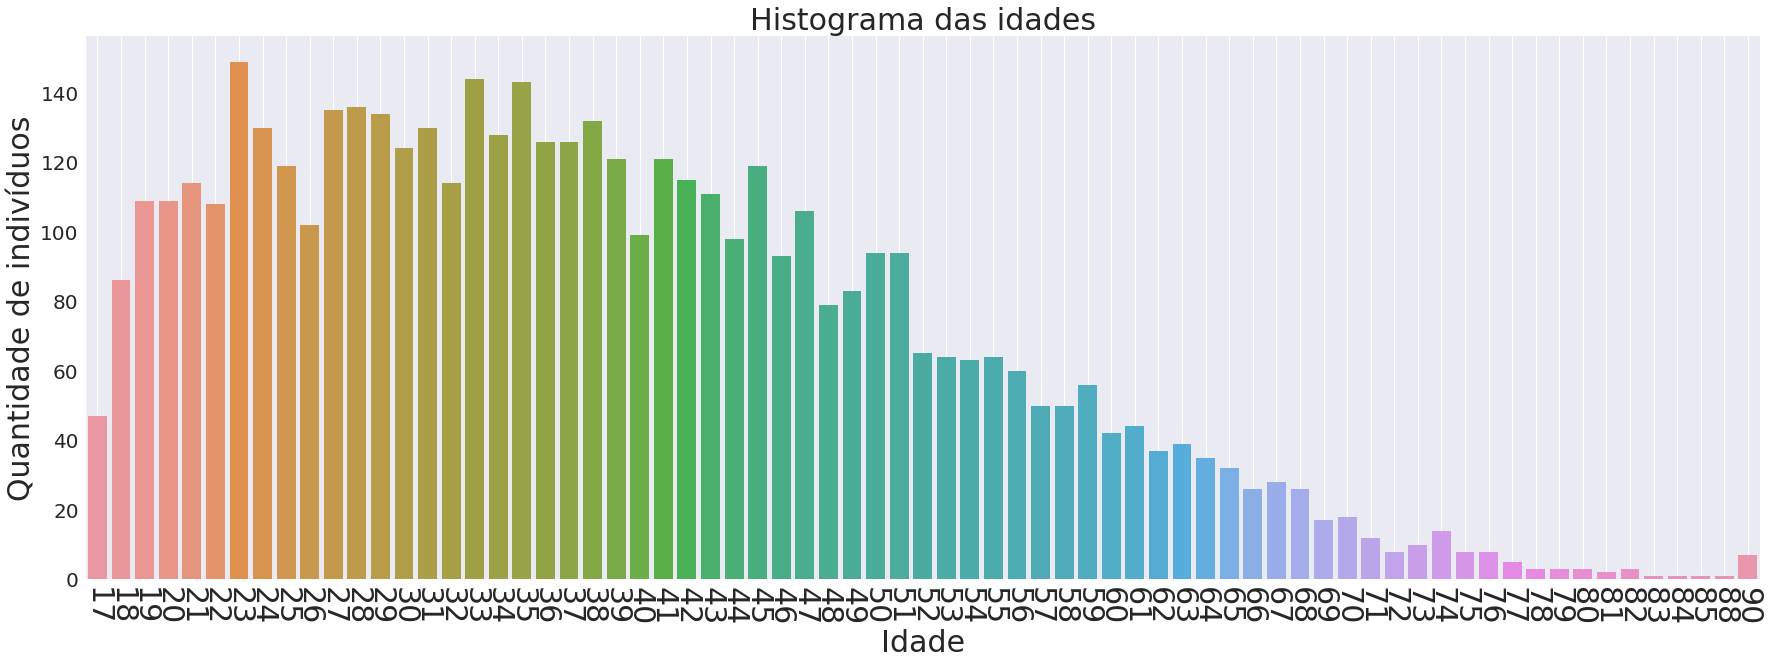

In [28]:
# Visualização dos dados (novamente) : Countplot 
plt.figure(figsize=(30,10))
sns.countplot(data['age'].values.astype(int),label='Distribuição das idades')
plt.xlabel('Idade',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.title('Histograma das idades',fontsize=30)
plt.xticks(rotation=-90,fontsize=30)
plt.yticks(fontsize=20)
plt.grid()

#plt.savefig('Images/Age_hist.png')

plt.show()

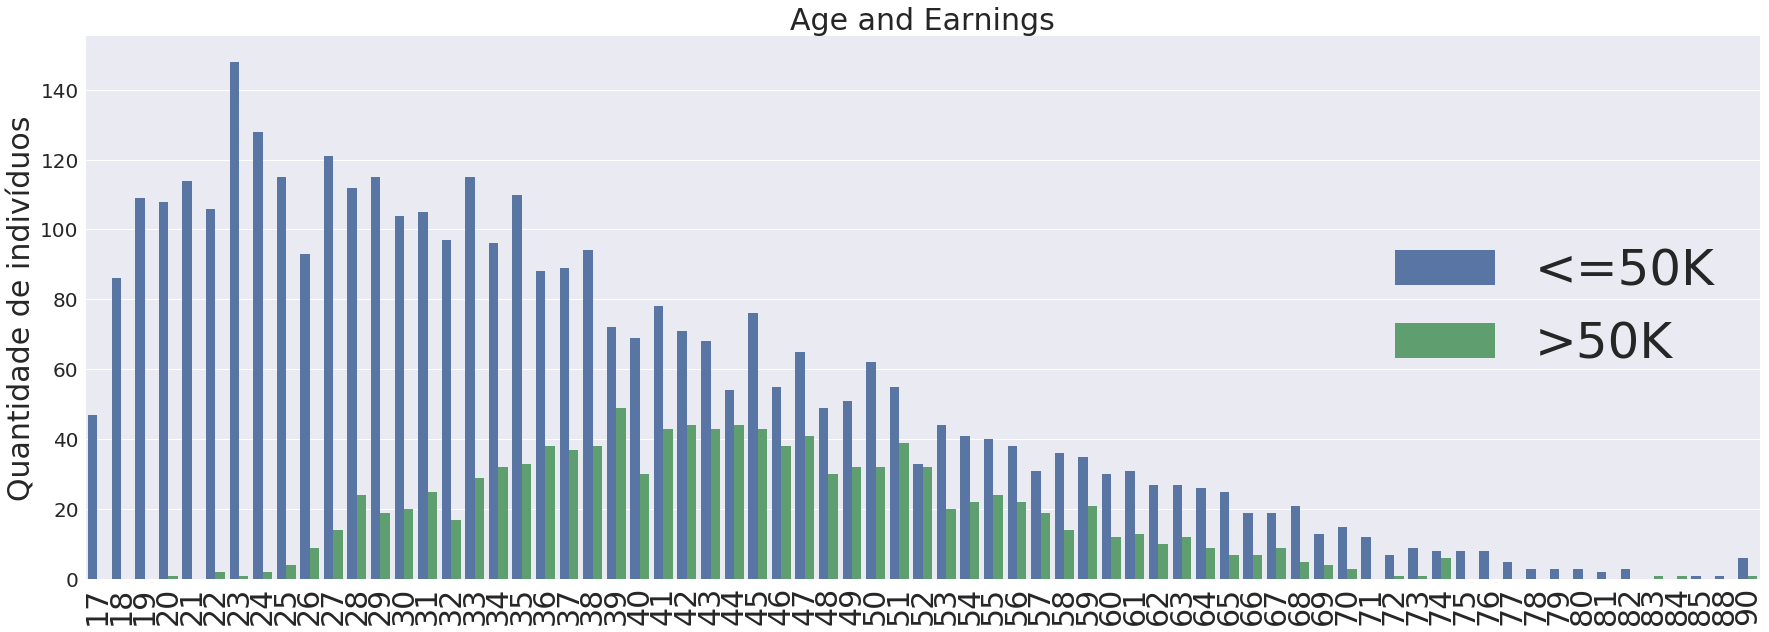

In [29]:
# Verificando a relação idade e ganhos
plt.figure(figsize=(30,10))
data.age.astype(int)
ax = sns.countplot(x=data['age'].values.astype(int),hue='earnings',data=data)
plt.title('Age and Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=20)
plt.legend(loc=5, prop={'size': 50})
plt.show()

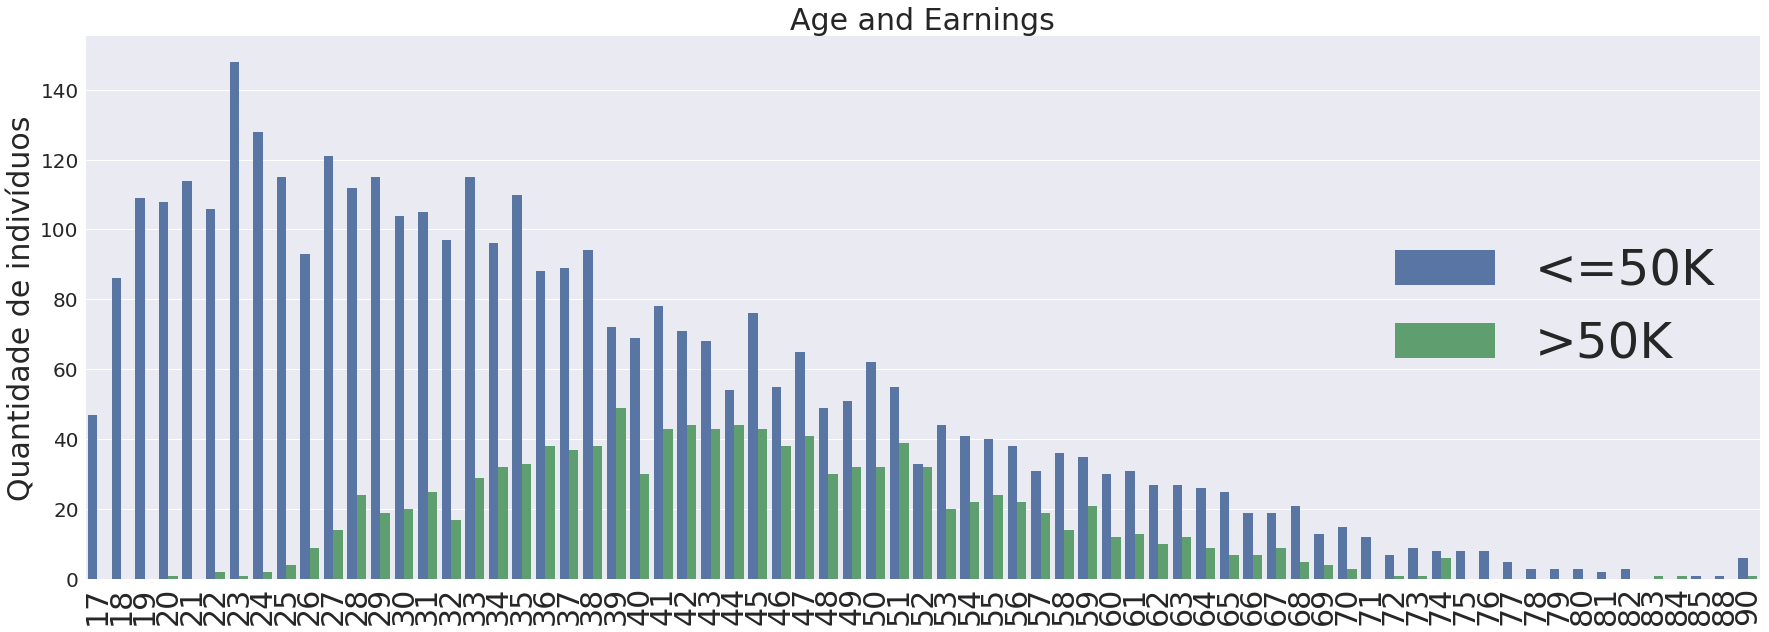

In [30]:
# Verificando a relação Idade e Sexo
plt.figure(figsize=(30,10))
data.age.astype(int)
ax = sns.countplot(x=data['age'].values.astype(int),hue='earnings',data=data)
plt.title('Age and Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=20)
plt.legend(loc=5, prop={'size': 50})
plt.show()

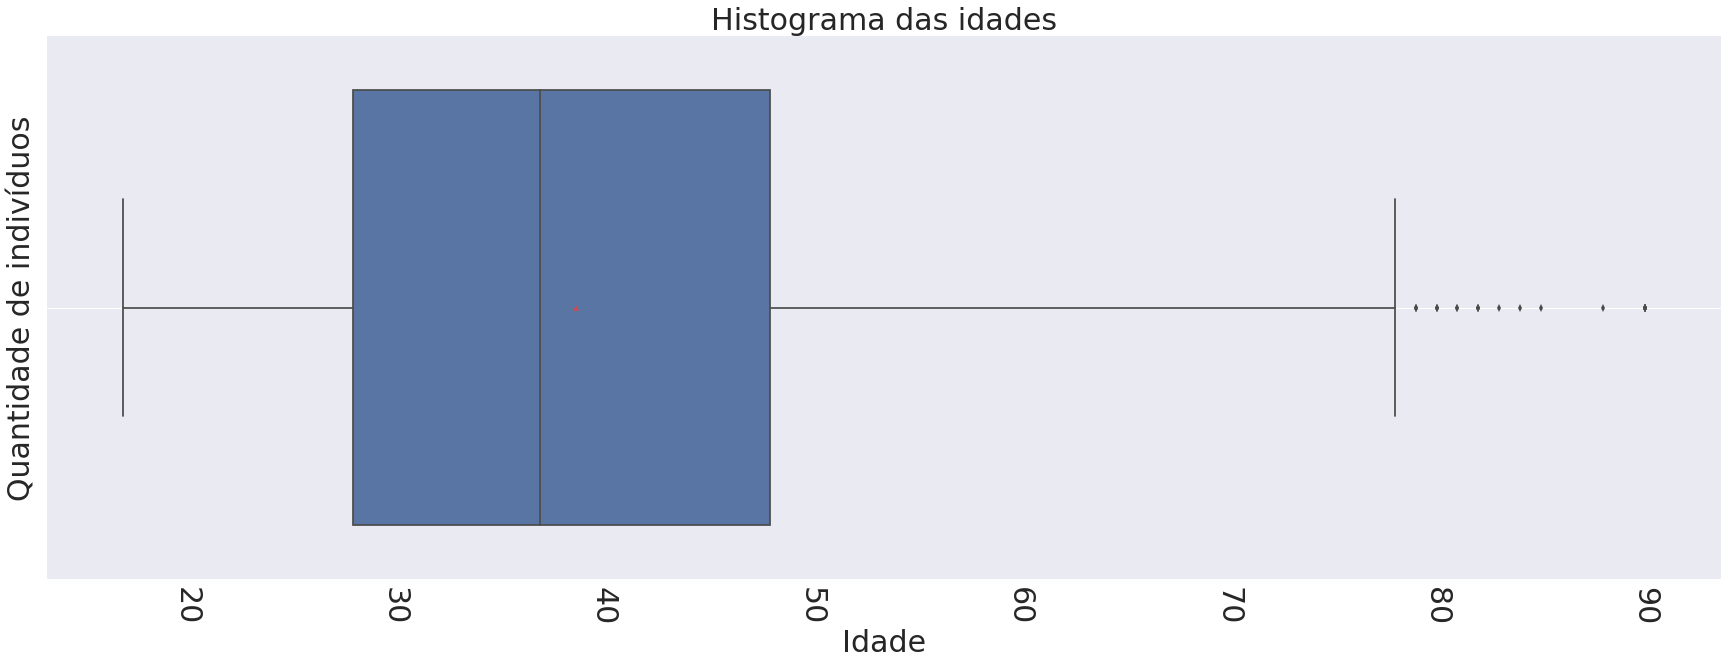

In [31]:
# Boxplot novamente
plt.figure(figsize=(30,10))
sns.boxplot(x=data['age'].values,showmeans=True)
plt.xlabel('Idade',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.title('Histograma das idades',fontsize=30)
plt.xticks(rotation=-90,fontsize=30)
plt.grid()
#plt.savefig('Images/Age_boxplot.png')
plt.show()

In [32]:
# Definição dos quantis
Q1, Q3 = data.age.quantile(0.25), data.age.quantile(0.75)

# Definição de IQR de acordo com o método de Tukey
IQR = Q3 - Q1

# De acordo com o boxplot, não existem outliers abaixo de Q1 - 1.5*IQR
outliers = data[data.age > (Q3 + 1.5 * IQR)]

# Visualização dos outliers
outliers.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
22895,88.0,Private,68539.0,Some-college,10.0,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
33641,81.0,Private,184615.0,7th-8th,4.0,Widowed,Machine-op-inspct,Unmarried,White,Female,1264.0,0.0,40.0,United-States,<=50K
48710,79.0,Local-gov,132668.0,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,15.0,United-States,<=50K
32459,85.0,Private,98611.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,3.0,Poland,<=50K
24395,83.0,Self-emp-inc,153183.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,2392.0,55.0,United-States,>50K
3211,82.0,NaN,29441.0,7th-8th,4.0,Widowed,NaN,Not-in-family,White,Male,0.0,0.0,5.0,United-States,<=50K
24043,90.0,Self-emp-not-inc,82628.0,HS-grad,9.0,Never-married,Exec-managerial,Not-in-family,White,Male,2964.0,0.0,12.0,United-States,<=50K
20421,82.0,Private,147729.0,5th-6th,3.0,Widowed,Other-service,Unmarried,White,Male,0.0,0.0,20.0,United-States,<=50K
11238,84.0,Self-emp-inc,172907.0,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,35.0,United-States,>50K
36058,90.0,Self-emp-not-inc,83601.0,Prof-school,15.0,Widowed,Prof-specialty,Not-in-family,White,Male,1086.0,0.0,60.0,United-States,<=50K


In [33]:
# Quantidade de outliers presentes:
print(len(outliers), Q1, Q3)

22 28.0 48.0


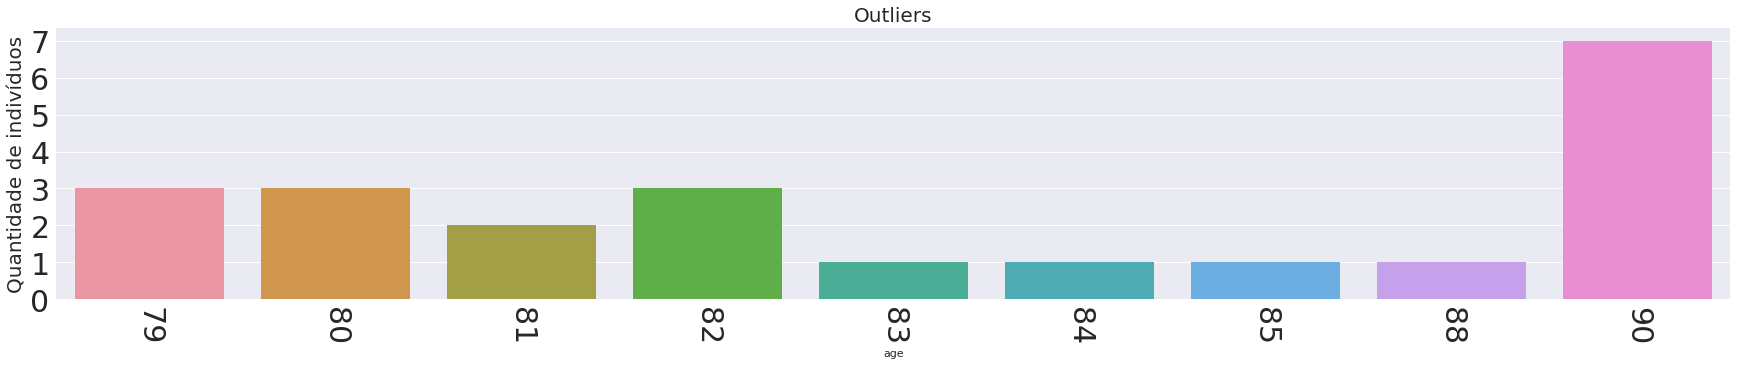

In [34]:
# Relação com age e earnings
plt.figure(figsize=(30,5))
sns.countplot(outliers.age.astype(int))
plt.title('Outliers',fontsize=20)
plt.ylabel('Quantidade de indivíduos',fontsize=20)
plt.xticks(rotation=-90,fontsize=30)
plt.yticks(fontsize=30)
plt.show()

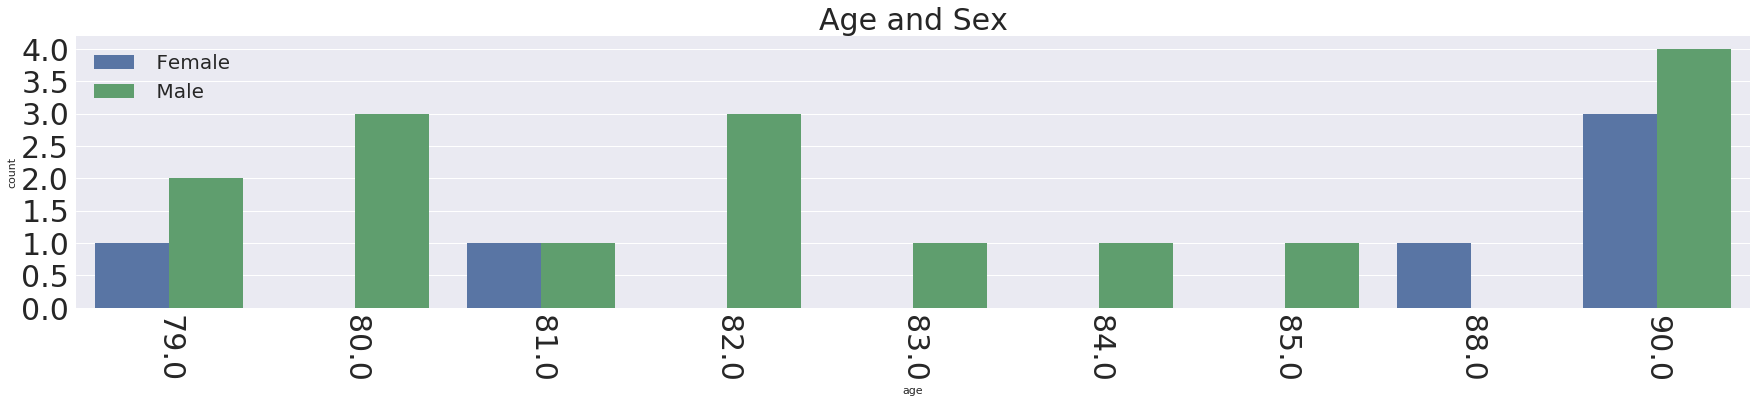

In [35]:
# Verificando a relação entre a idade e sexo
plt.figure(figsize=(30,5))
sns.countplot(x='age',hue='sex',data=outliers)
plt.title('Age and Sex',fontsize=30)
plt.xticks(rotation=-90,fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=2, prop={'size': 20})
plt.show()

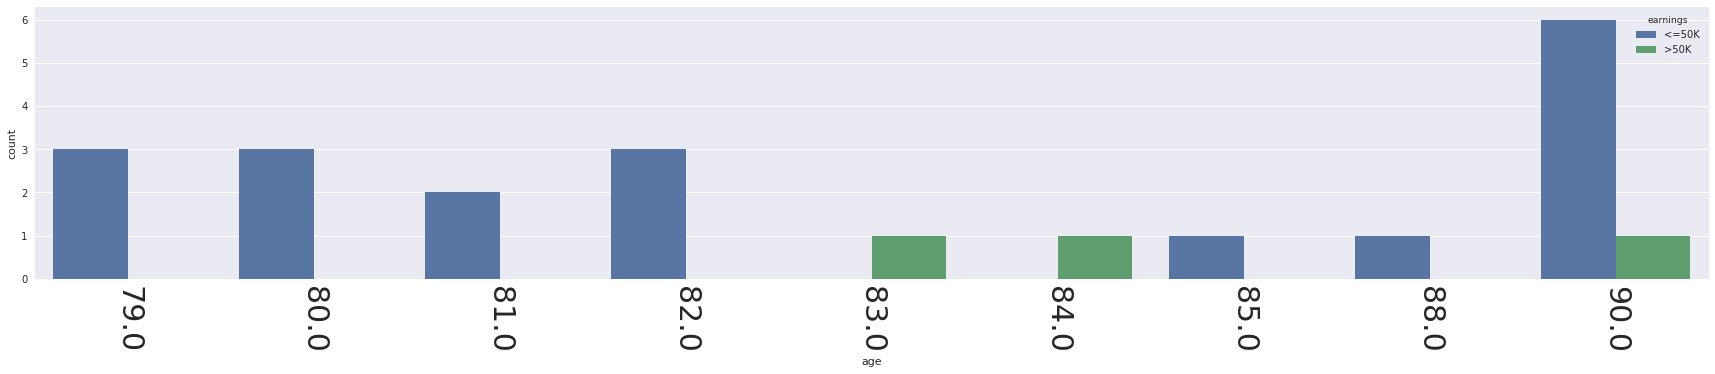

In [36]:
# Verificando a relação entre a idade e ganhos anuais
plt.figure(figsize=(30,5))
sns.countplot(x='age',hue='earnings',data=outliers)
plt.xticks(rotation=-90,fontsize=30)
plt.show()

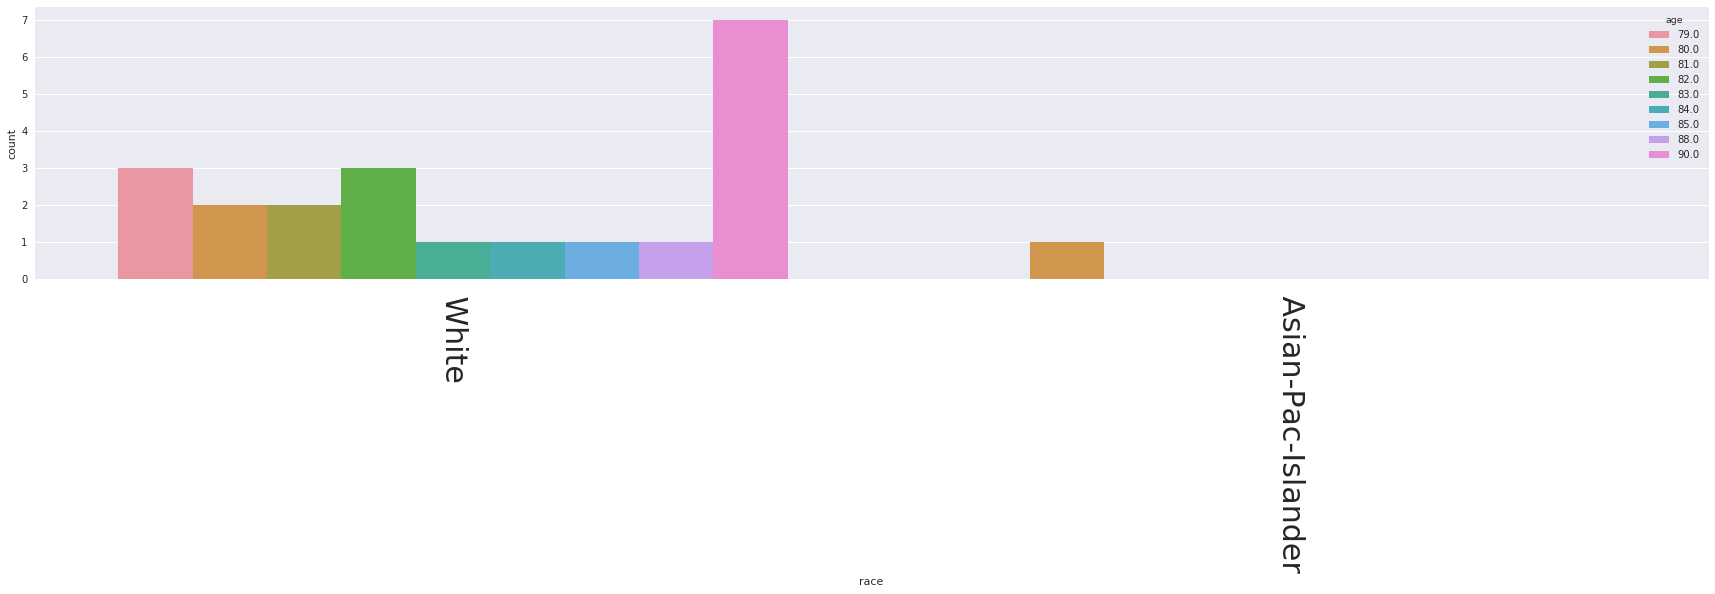

In [37]:
# Verificando a relação entre idade e raça
plt.figure(figsize=(30,5))
sns.countplot(x='race',hue='age',data=outliers)
plt.xticks(rotation=-90,fontsize=30)
plt.show()

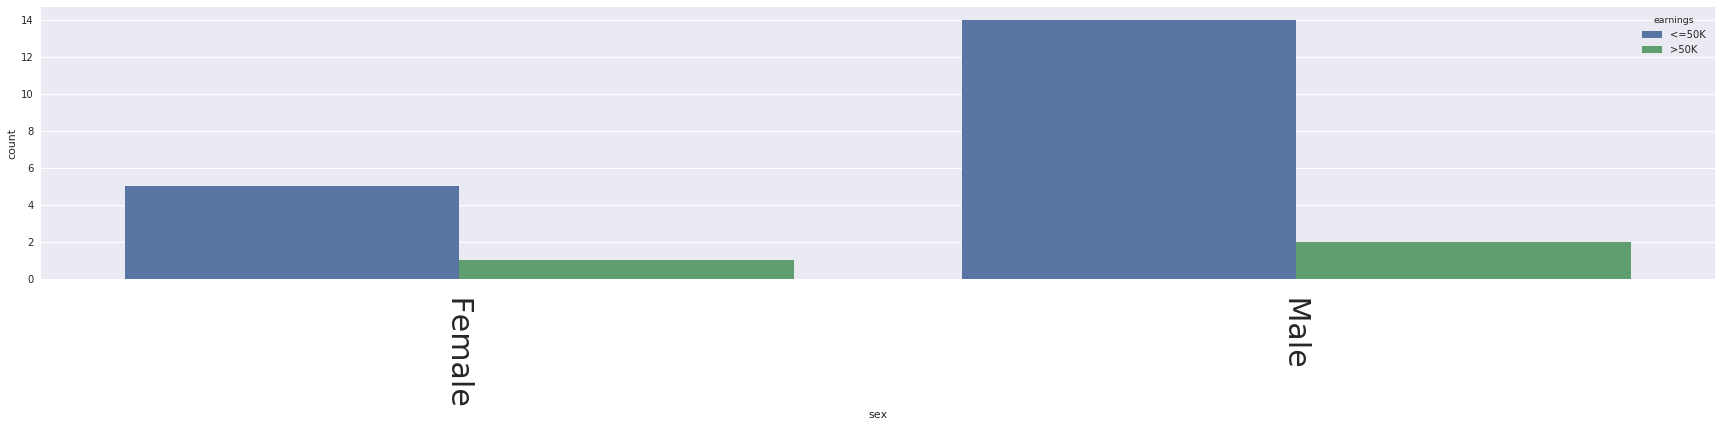

In [38]:
# Relação entre sexo e ganhos
plt.figure(figsize=(30,5))
sns.countplot(x='sex',hue='earnings',data=outliers)
plt.xticks(rotation=-90,fontsize=30)
plt.show()

#### Workclass

A feature Workclass representa o ramo ao qual o indivíduo trabalha, sendo dividido em sete categorias: Private, Self-emp-not-inc, Local-gov, State-gov, Self-emp-inc, Federal-gov, Without-pay.

In [39]:
# Representatividade de cada classe
data.workclass.value_counts() * 100 /(len(data))

 Private             69.369369
 Self-emp-not-inc     7.637183
 Local-gov            6.633907
 State-gov            4.217854
 Self-emp-inc         3.501229
 Federal-gov          2.784603
 Without-pay          0.020475
 Never-worked         0.020475
Name: workclass, dtype: float64

In [40]:
# Existem valores ausentes?
print('Quantidade de exemplos faltantes: {}'.format(data.workclass.isnull().sum()))

Quantidade de exemplos faltantes: 284


In [41]:
# Substituindo os valores faltantes por uma classe 'others'
data.workclass.replace(np.nan, 'Others',inplace=True)

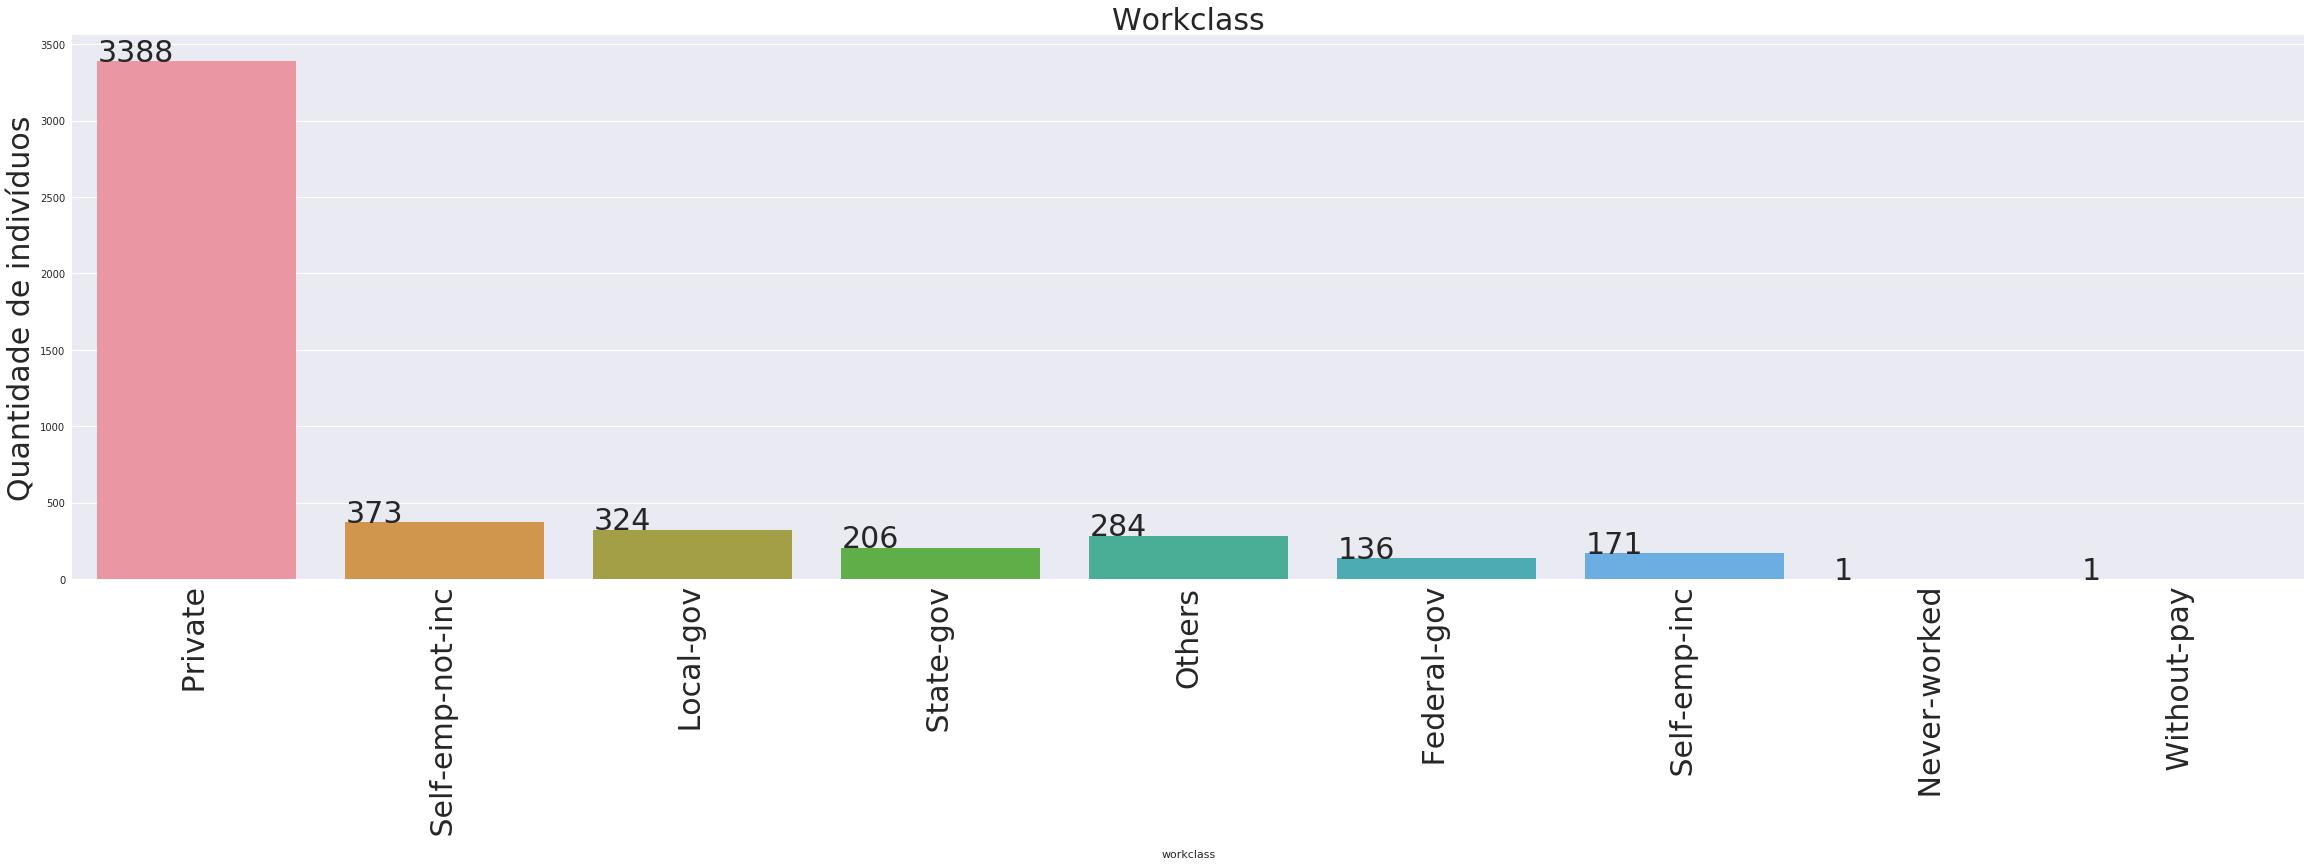

In [42]:
# Visualização (novamente) da feature Workclass
plt.figure(figsize=(40,10))
ax = sns.countplot(data.workclass)

plt.title('Workclass',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=30)
    
plt.show()

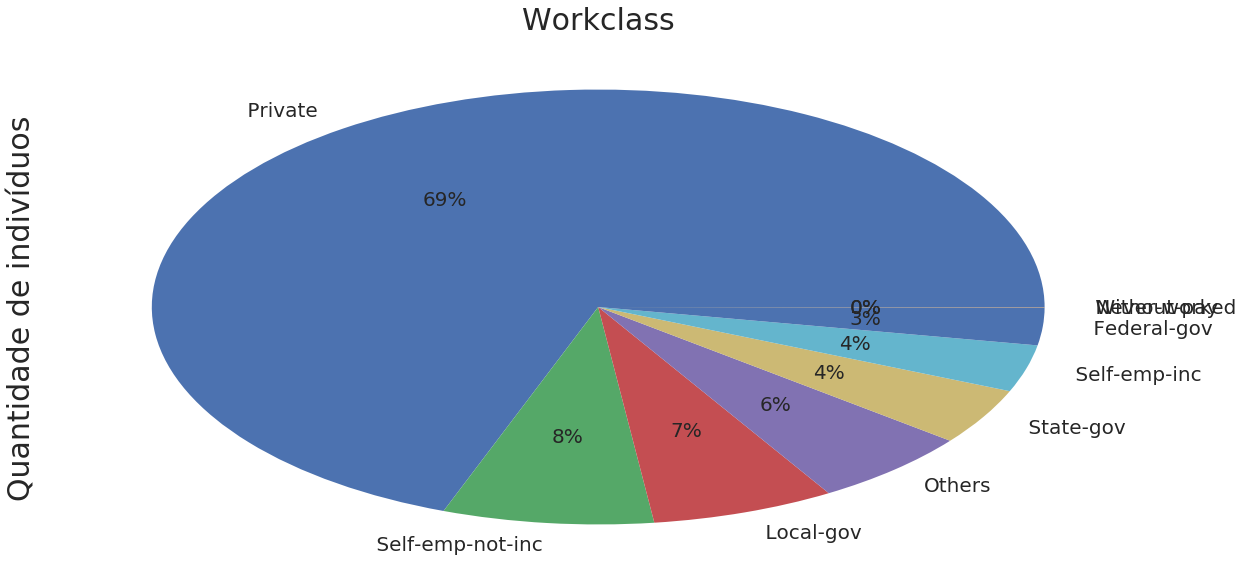

In [43]:
# Pizza plot
plt.figure(figsize=(20,10))
data.workclass.value_counts().plot.pie(autopct="%1.0f%%",fontsize=20)

plt.title('Workclass',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=30)
    
plt.show()

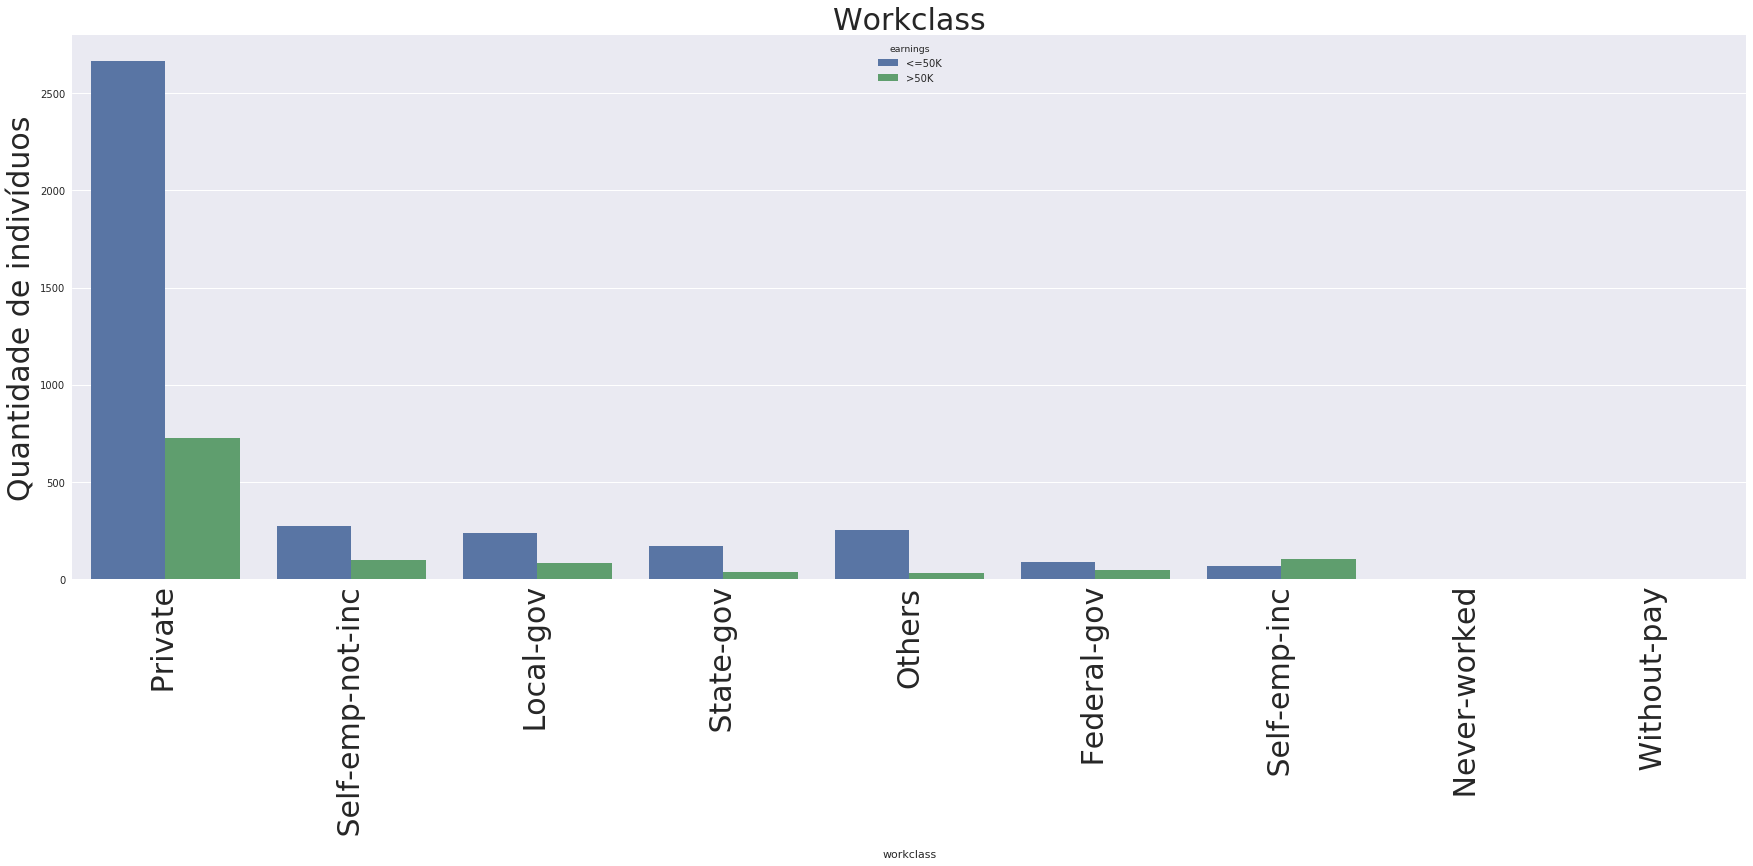

In [44]:
# Relações entre Workclass e Earnings
plt.figure(figsize=(30,10))
ax = sns.countplot(x='workclass',hue='earnings',data=data)

plt.title('Workclass',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

# for patch in ax.patches:
#     ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=30)
    
plt.show()

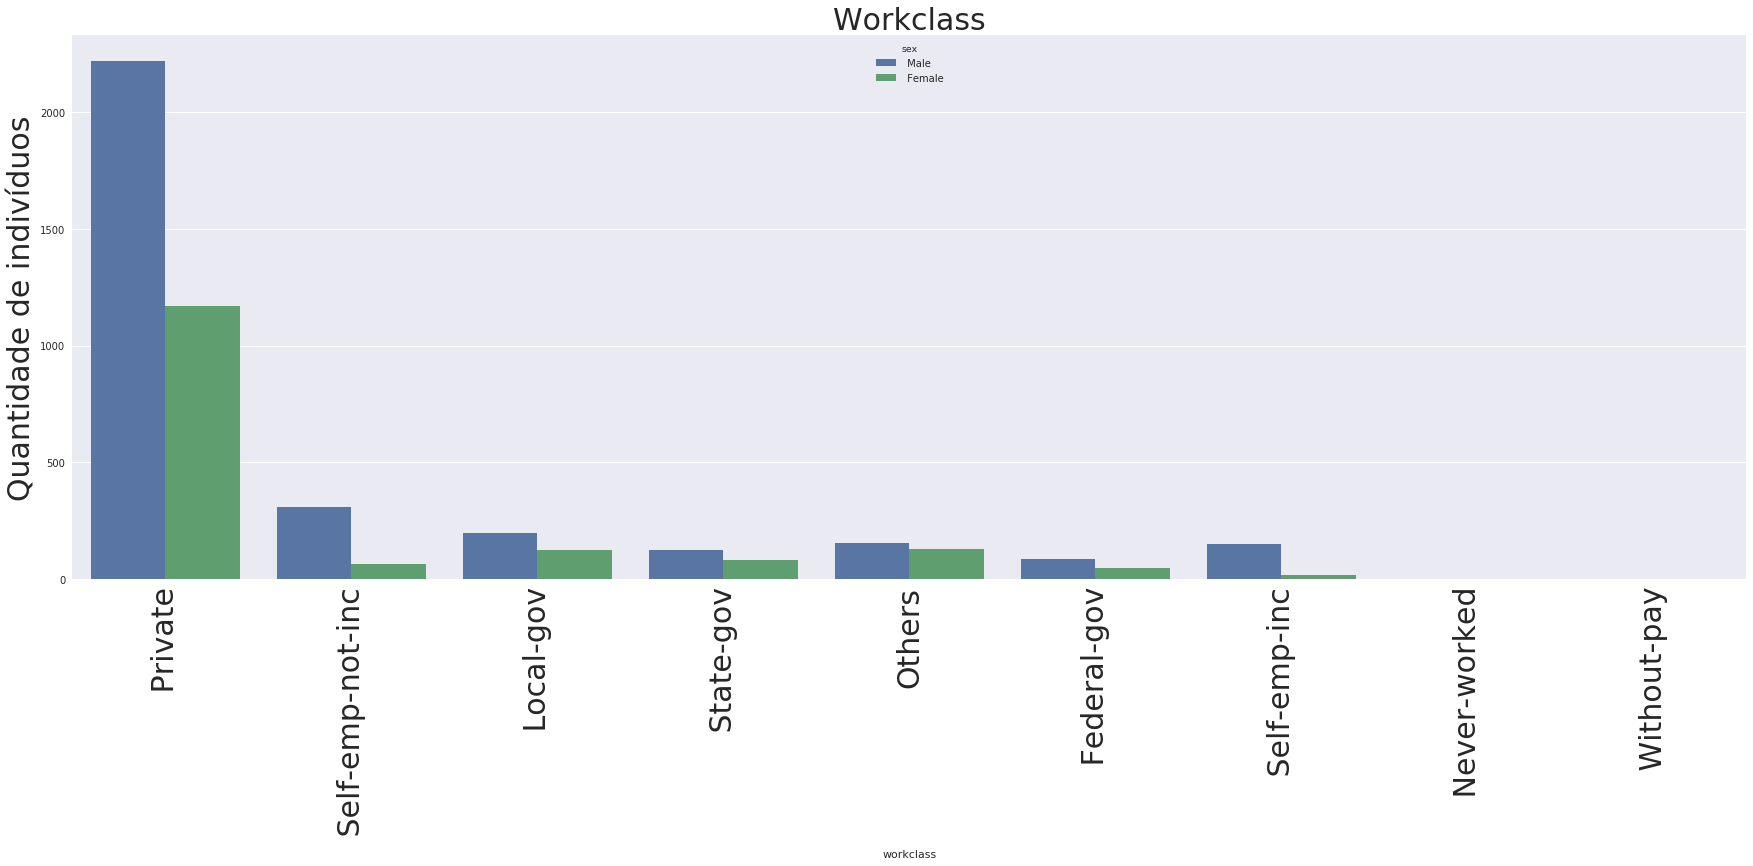

In [45]:
# Como os sexos se distribuem de acordo com os ramos de trabalho
plt.figure(figsize=(30,10))

ax = sns.countplot(x='workclass',hue='sex',data=data)
plt.title('Workclass',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

# for patch in ax.patches:
#     ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=30)
    
plt.show()

##### Observações

- As classes <i>Without-pay</i> e <i>Never-worked</i> possuem baixa representatividade em relação às outras classes presentes (0.042996 e 0.020474 respectivamente), enquanto que valores faltantes possuem mais exemplos que outras classes definidas. Na etapa de pré-processamento será decidida a forma de como será realizada a imputação de dados.

#### Fnlwgt

#### <i>Education</i> e <i>Education-num</i>

As features education e education-num representam, respectivamente, o nível de escolaridade de um indivíduo, e a quantidade de anos de educação do mesmo. De acordo com os gráficos preliminares gerados anteriormente, percebe-se que existe alguma equivalência entre os seus valores. Uma investigação mais minuciosa é realizada abaixo.

In [46]:
print('Possíveis valores para a feature education:\n')
print(', '.join([i for i in list(data.education.unique())]))

Possíveis valores para a feature education:

 HS-grad,  Doctorate,  Bachelors,  Assoc-voc,  10th,  Some-college,  Masters,  12th,  9th,  11th,  Assoc-acdm,  Prof-school,  7th-8th,  5th-6th,  1st-4th,  Preschool


Realizando o mesmo procedimento para a feature <i>Education-num</i>:

In [47]:
print('Possíveis valores para a feature education-num:\n')
print(', '.join([i for i in list(data['education-num'].astype(str).unique())]))

Possíveis valores para a feature education-num:

9.0, 16.0, 13.0, 11.0, 6.0, 10.0, 14.0, 8.0, 5.0, 7.0, 12.0, 15.0, 4.0, 3.0, 2.0, 1.0


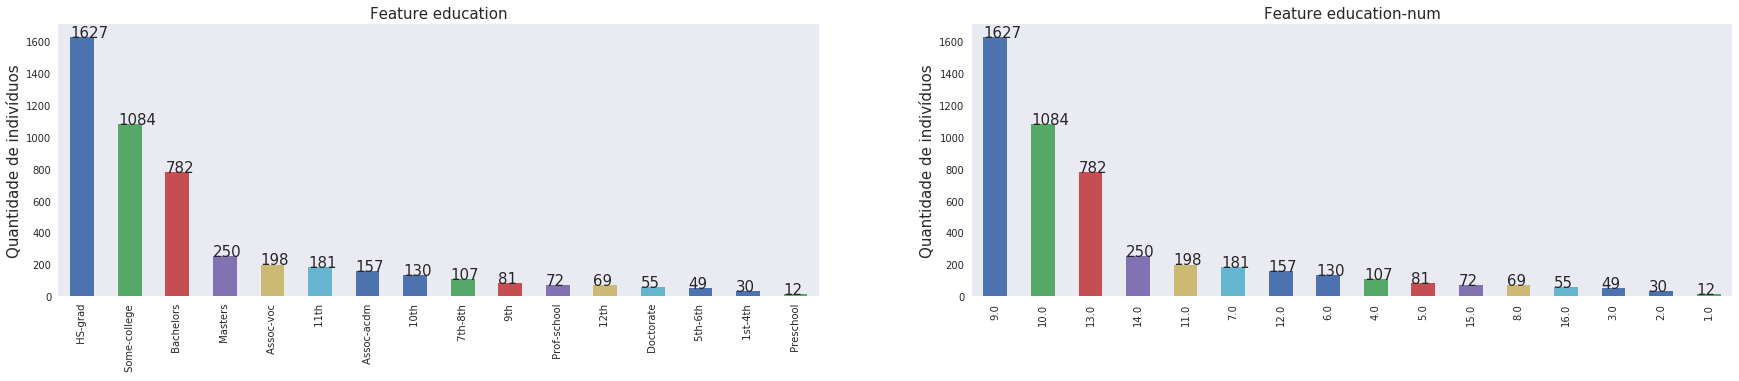

In [48]:
# Realizando a comparação visual de cada feature, com histogramas:
plt.figure(figsize=(30,5))
plt.subplot(121)
ax = data['education'].value_counts().plot.bar()
plt.title('Feature education',fontsize=15)
plt.ylabel('Quantidade de indivíduos',fontsize=15)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=15)

plt.grid()

plt.subplot(122)
ax = data['education-num'].value_counts().plot.bar()
plt.title('Feature education-num',fontsize=15)
plt.ylabel('Quantidade de indivíduos',fontsize=15)
plt.grid()

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=15)

plt.show()

Os gráficos de cada feature são semelhantes, nos levando a dizer que as features são redundantes, porém a feature <i>Education-num</i> possui menos representatividade do que a outra feature, pois entendemos qual é o nível de escolaridade de cada pessoa entrevistada. Investigando mais os valores dos bins para a certeza de que as features são equivalentes:

Assim, podemos montar uma tabela de equivalência entre as duas features:

|      Education     | Education-num                |
| -------------------|------------------------------|
| Pre-School         | 1                            |
| 1st - 4th          | 2                            |
| 5th - 6th          | 3                            |
| 7th - 8th          | 4                            |
| 9th                | 5                            |
| 10th               | 6                            |
| 11th               | 7                            |
| 12th               | 8                            |
| HS-grad            | 9                            |
| Some-College       | 10                           |
| Assoc-Voc          | 11                           |
| Assoc-Acdm         | 12                           |
| Bachelors          | 13                           |
| Masters            | 14                           |
| Prof-School        | 15                           |
| Doctorate          | 16                           |

Como existe a equivalência entre as features, uma delas deve ser eliminada, pois não traz nenhuma informação adicional para o problema.

In [49]:
# Removendo a feature education-num
data.drop(['education-num'],axis=1,inplace=True)

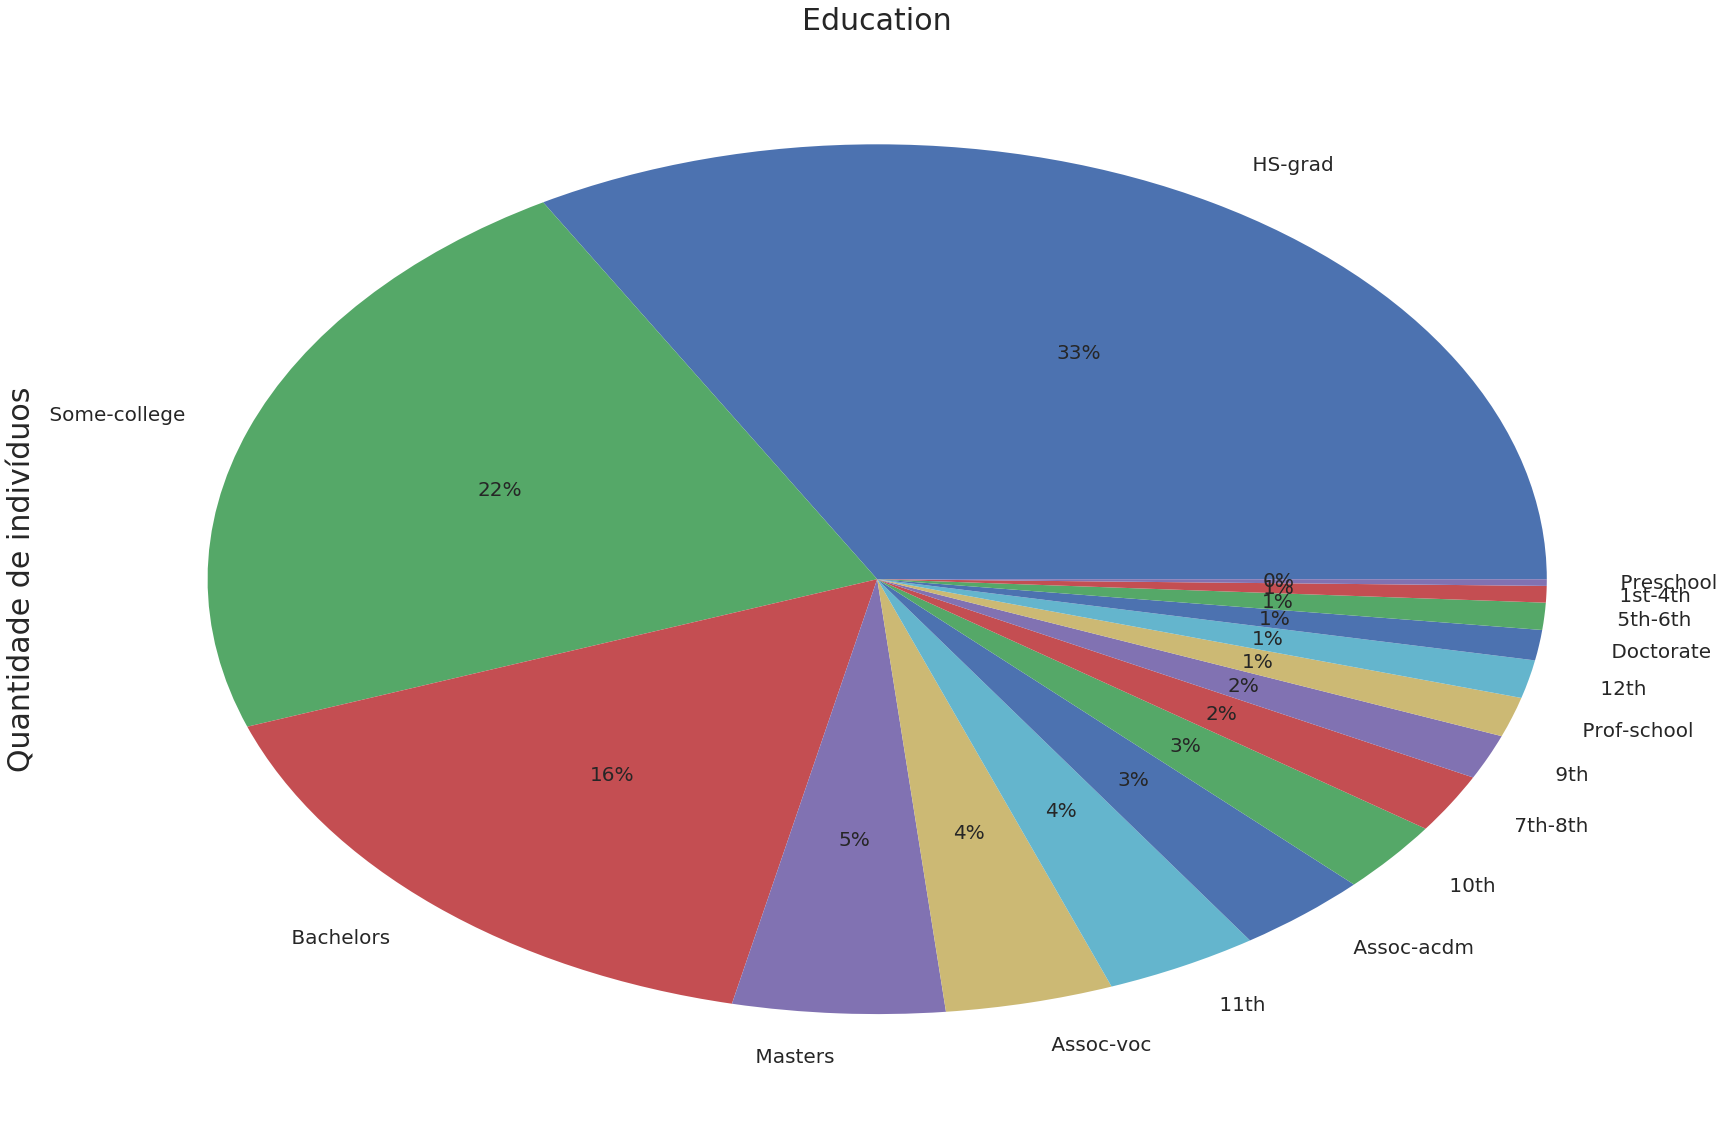

In [50]:
# Verificando a distribuição da feature education, utilizando Pizza plot
plt.figure(figsize=(30,20))
data.education.value_counts().plot.pie(autopct="%1.0f%%",fontsize=20)

plt.title('Education',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=25)
    
plt.show()

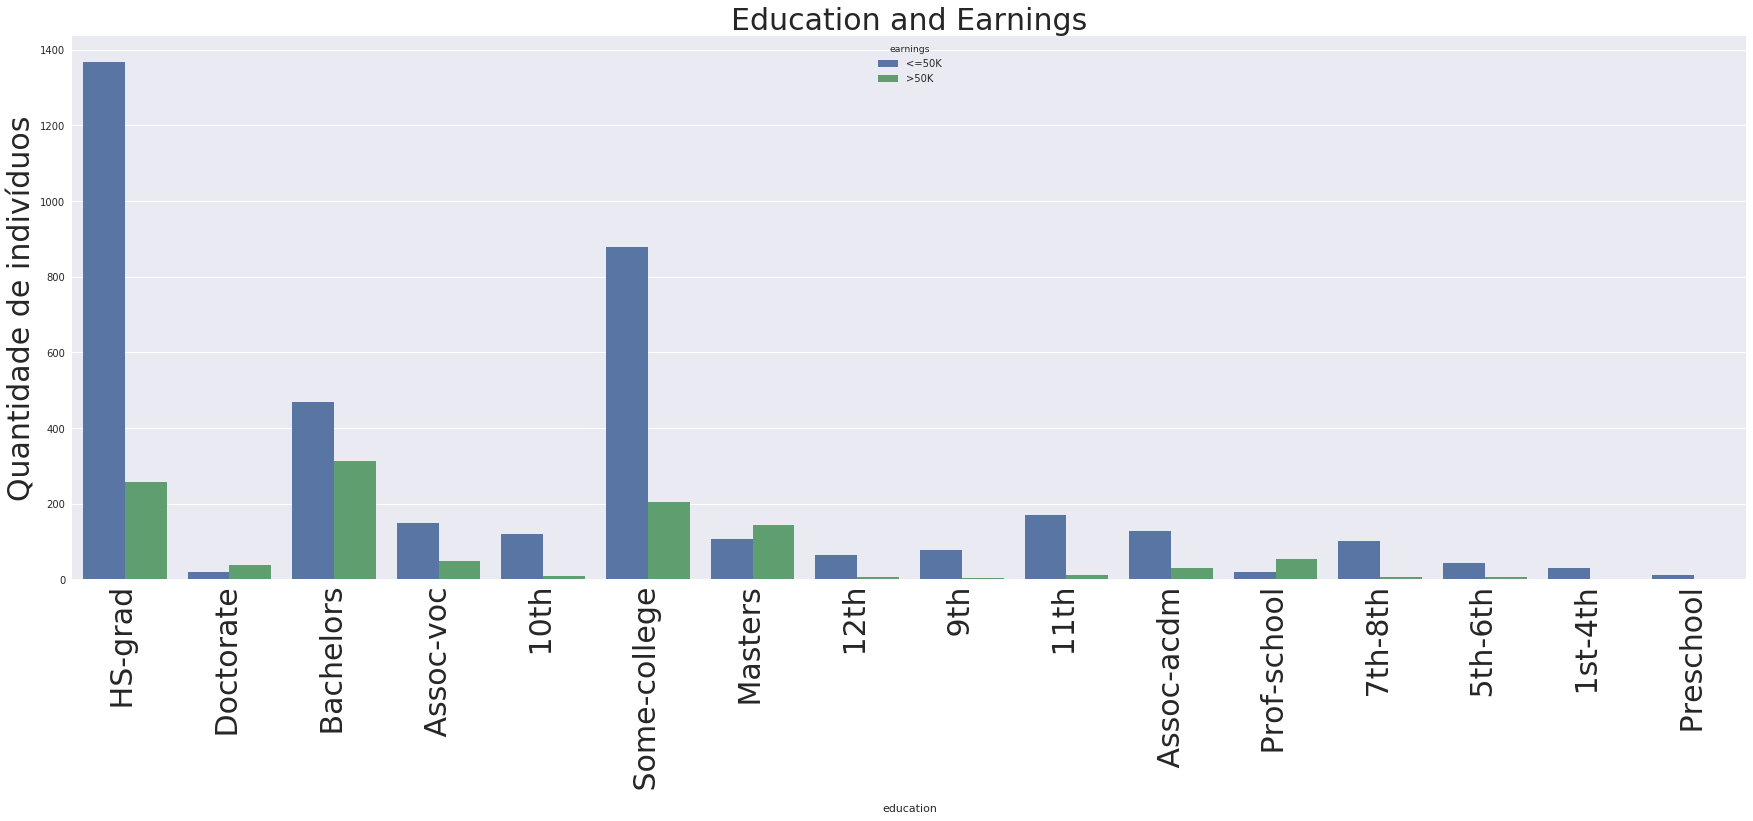

In [51]:
# Verificando a relação da feature Education e os ganhos 

education = ['Doctorate','Prof-School','Masters','Bachelors','Assoc-Acdm','Assoc-Voc','Some-College','HS-grad','12th','11th','10th','9th','7th - 8th','5th - 6th','1st - 4th','Pre-School']

plt.figure(figsize=(30,10))
ax = sns.countplot(x='education',hue='earnings',data=data)
plt.title('Education and Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

# for patch in ax.patches:
#     ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=15)

plt.show()

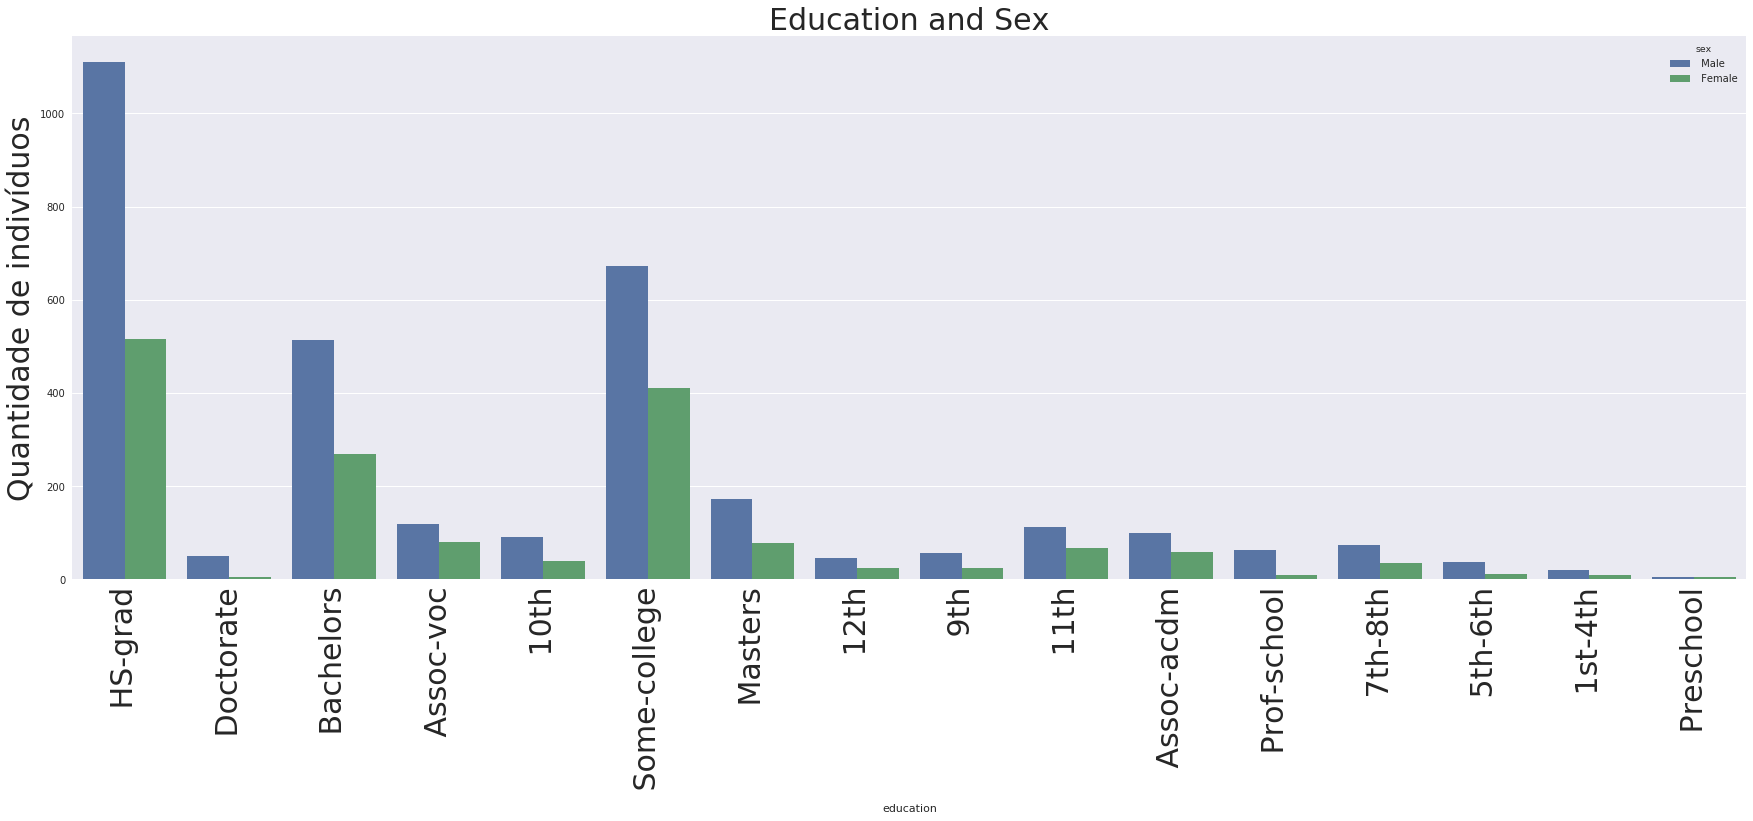

In [52]:
# Verificando a relação da feature Education e sexo 
plt.figure(figsize=(30,10))
ax = sns.countplot(x='education',hue='sex',data=data)
plt.title('Education and Sex',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

# for patch in ax.patches:
#     ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=15)

plt.show()

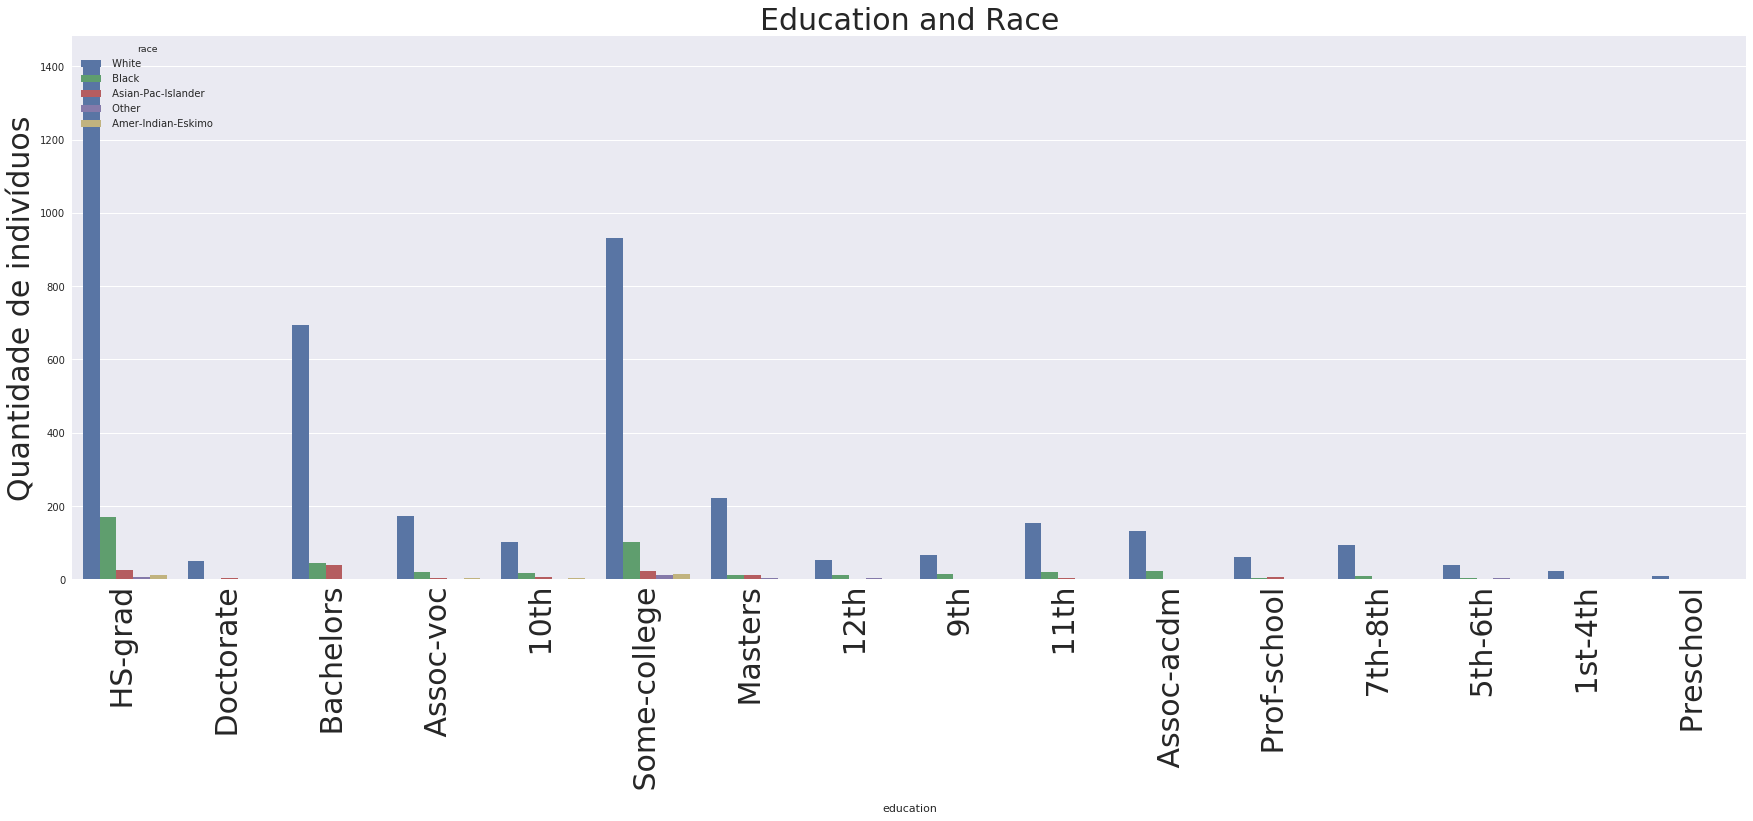

In [53]:
# Verificando a relação da feature Education e sexo 
plt.figure(figsize=(30,10))
ax = sns.countplot(x='education',hue='race',data=data)
plt.title('Education and Race',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

# for patch in ax.patches:
#     ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=12)

plt.show()

#### Marital-status

#### Occupation

In [54]:
# Substituindo os valores faltantes por uma classe 'others'
data.occupation.replace(np.nan, 'Others',inplace=True)

#### Native-Country

In [55]:
# Substituindo os valores faltantes por uma classe 'others'
data['native-country'].replace(np.nan, 'Others',inplace=True)

#### Relationship

#### Race

In [56]:
data.race.replace(np.nan,'others')

38114     White
39215     White
44249     White
10283     White
26724     White
20996     White
44338     White
33772     White
24651     White
36399     Black
37690     White
41337     White
6384      White
44416     White
2571      White
7110      White
6613      White
8467      White
47082     White
27267     White
29974     Black
22469     Black
19359     White
27710     White
40077     White
5007      White
20831     White
40348     White
31792     Black
29337     Black
          ...  
6804      White
22116     White
1814      White
14808     White
24532     White
2471      White
17127     White
12190     White
31172     White
46674     White
23083     White
31328     White
42273     White
37584     White
18750     White
3858      Black
16199     White
8001      White
21605     White
11140     White
28644     White
23935     Black
22256     White
1566      White
37506     White
13399     White
48264     White
22358     Other
9542      White
43331     Black
Name: race, Length: 4884

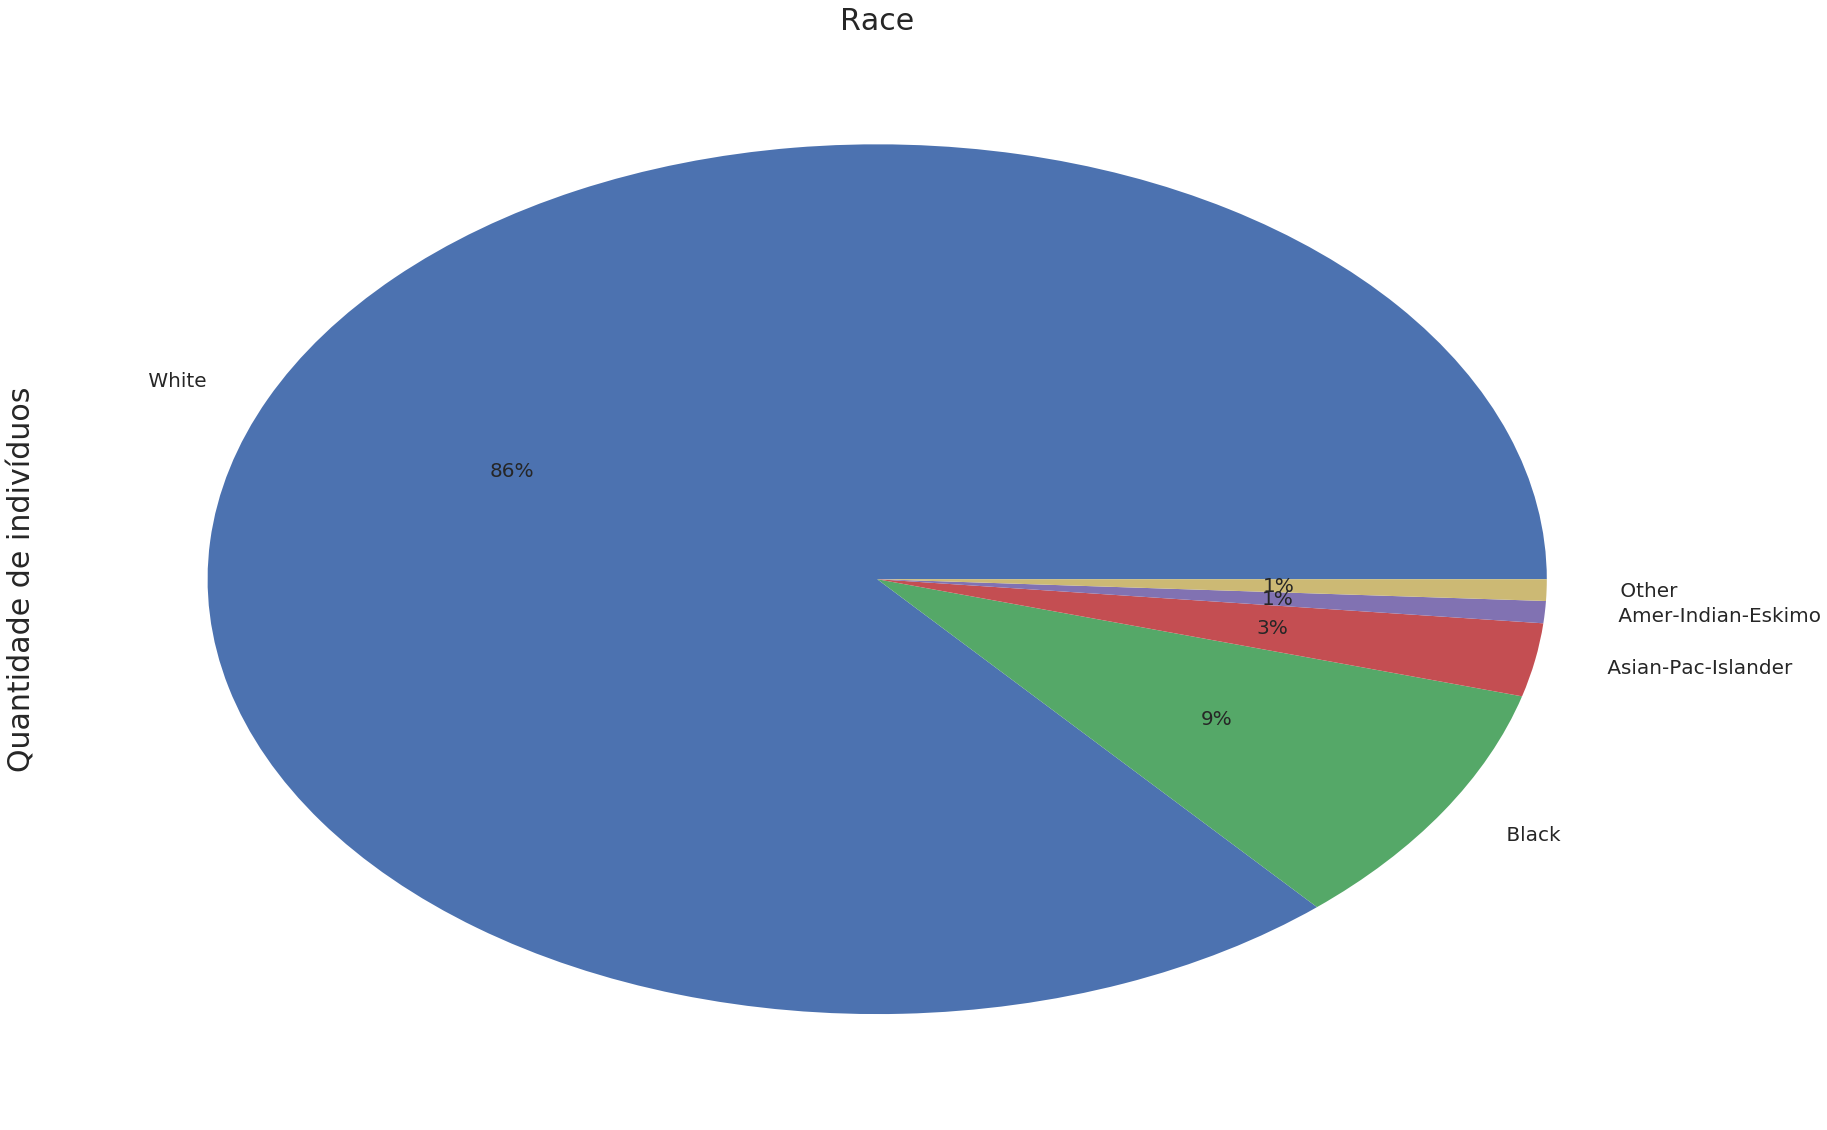

In [57]:
# Verificando a distribuição da feature education, utilizando Pizza plot
plt.figure(figsize=(30,20))
data.race.value_counts().plot.pie(autopct="%1.0f%%",fontsize=20)

plt.title('Race',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

# for patch in ax.patches:
#     ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=25)
    
plt.show()

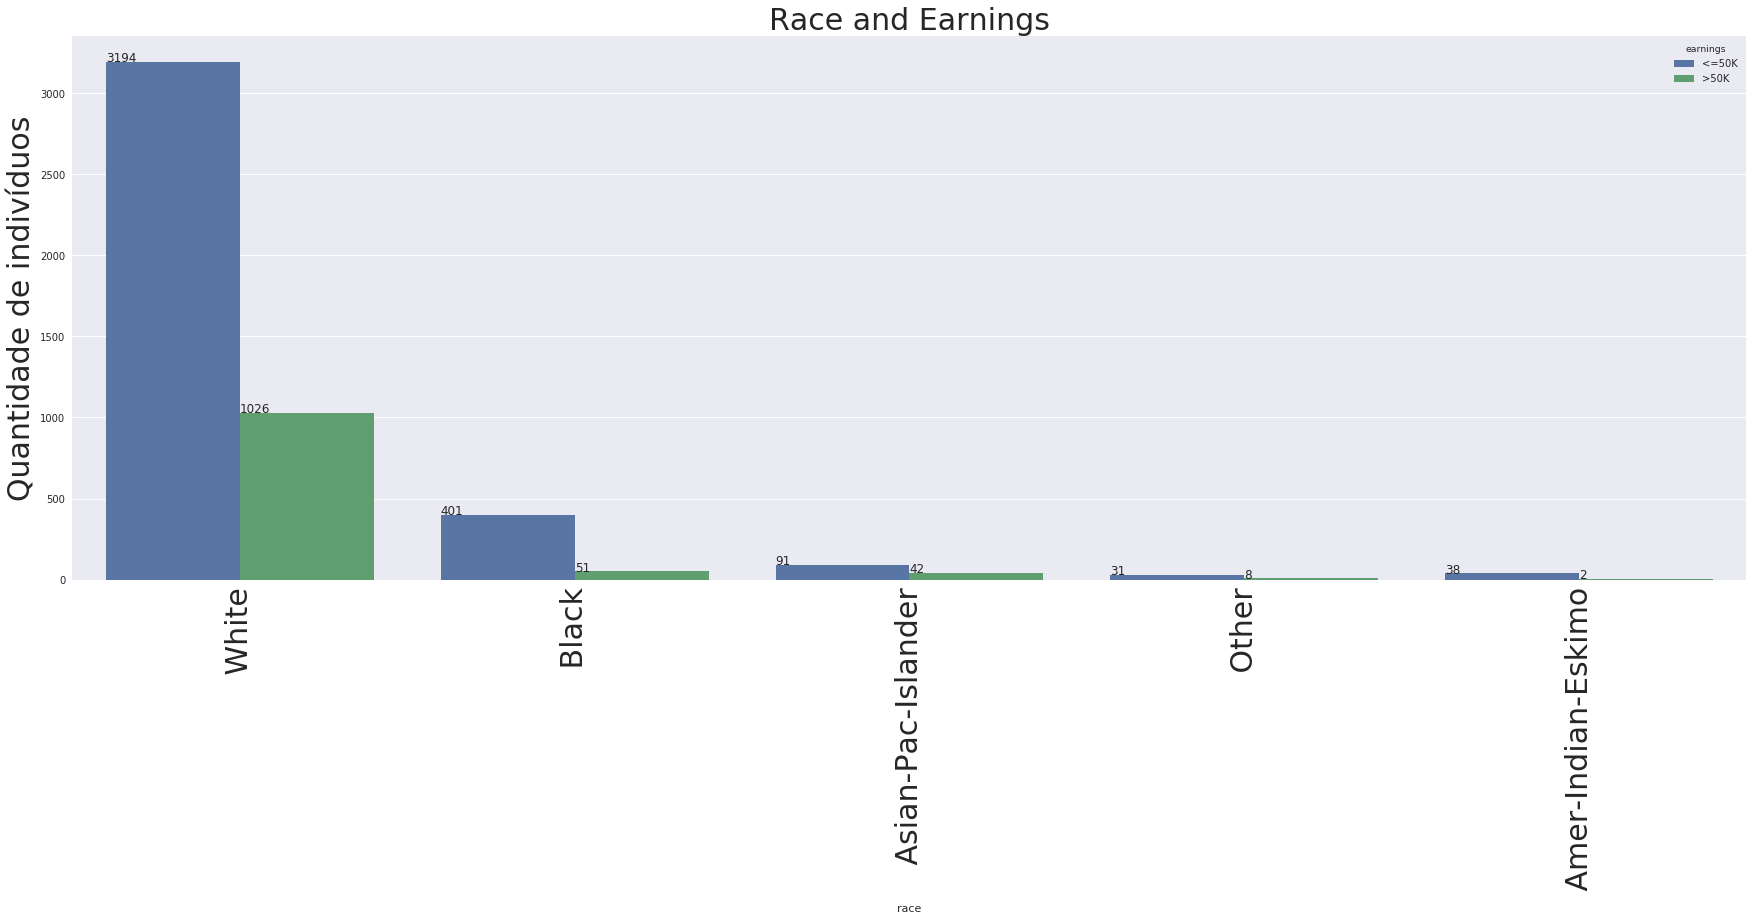

In [58]:
# Verificando a relação da raça e ganhos
plt.figure(figsize=(30,10))
ax = sns.countplot(x='race',hue='earnings',data=data)
plt.title('Race and Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=12)

plt.show()

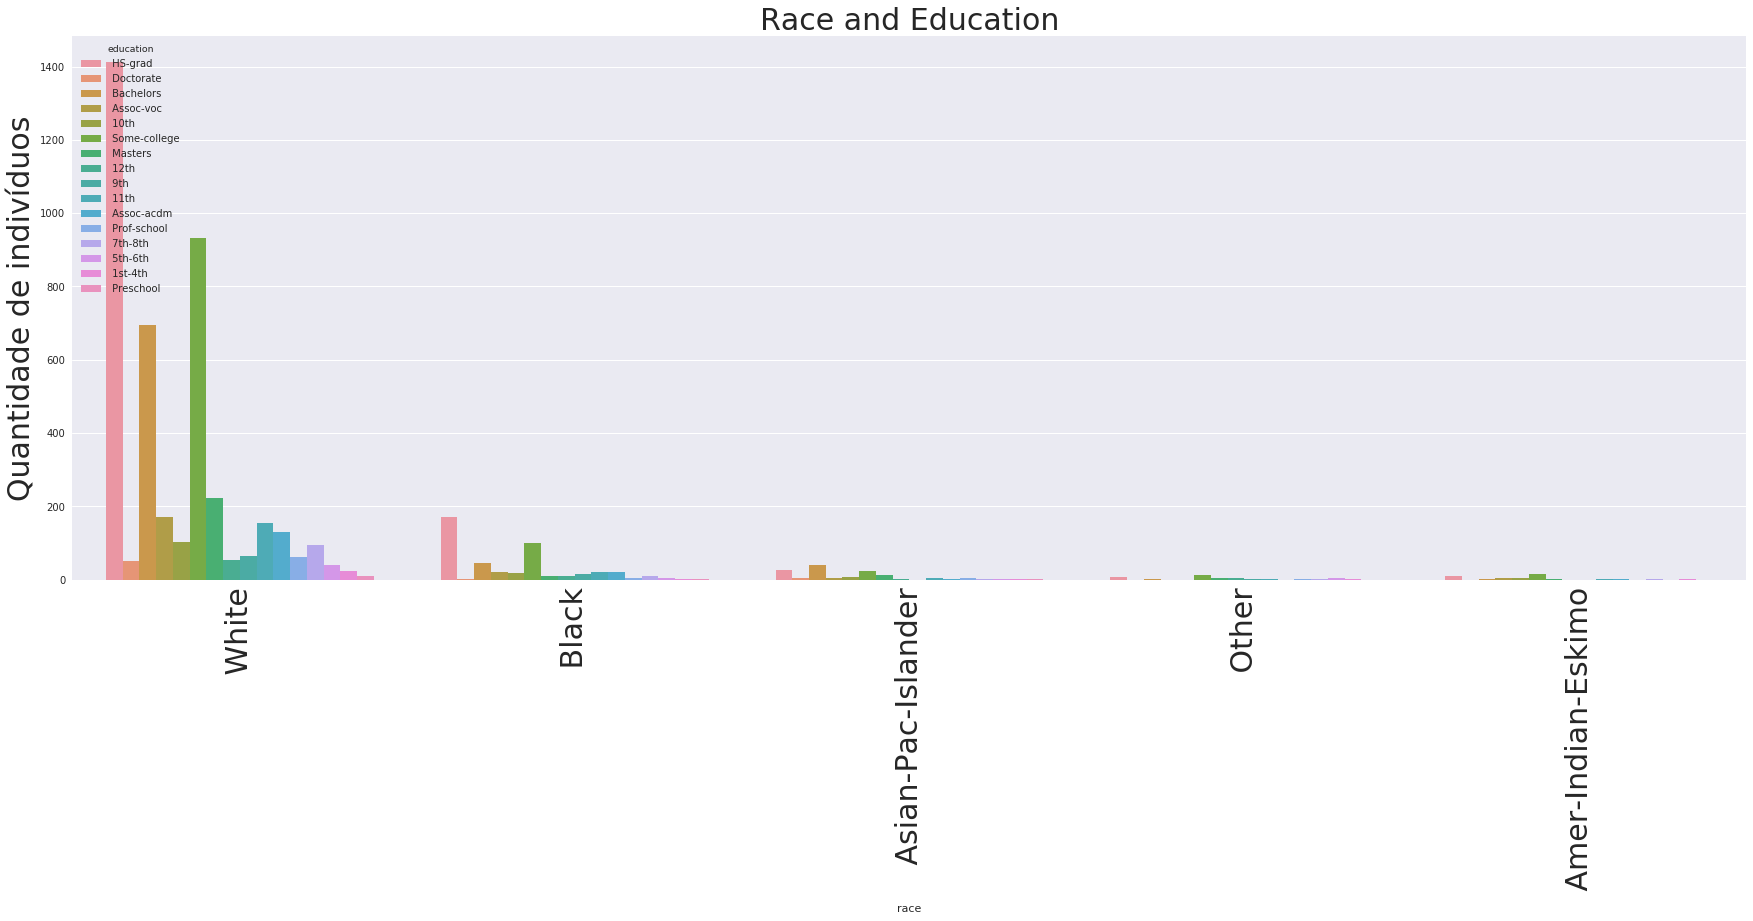

In [59]:
# Verificando a relação da raça e ganhos
plt.figure(figsize=(30,10))
ax = sns.countplot(x='race',hue='education',data=data)
plt.title('Race and Education',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

# for patch in ax.patches:
#     ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=12)

plt.show()

#### Sex

#### Capital-gain e Capital-loss

388
222


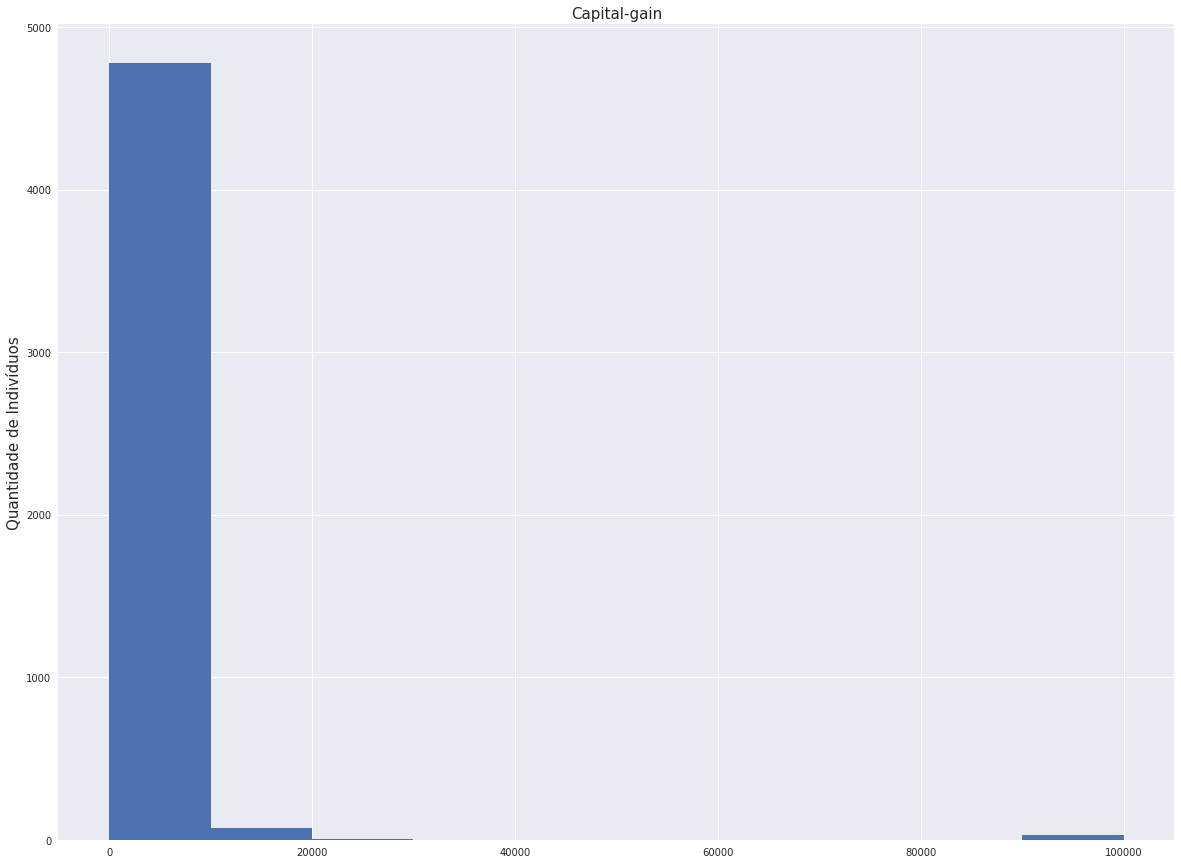

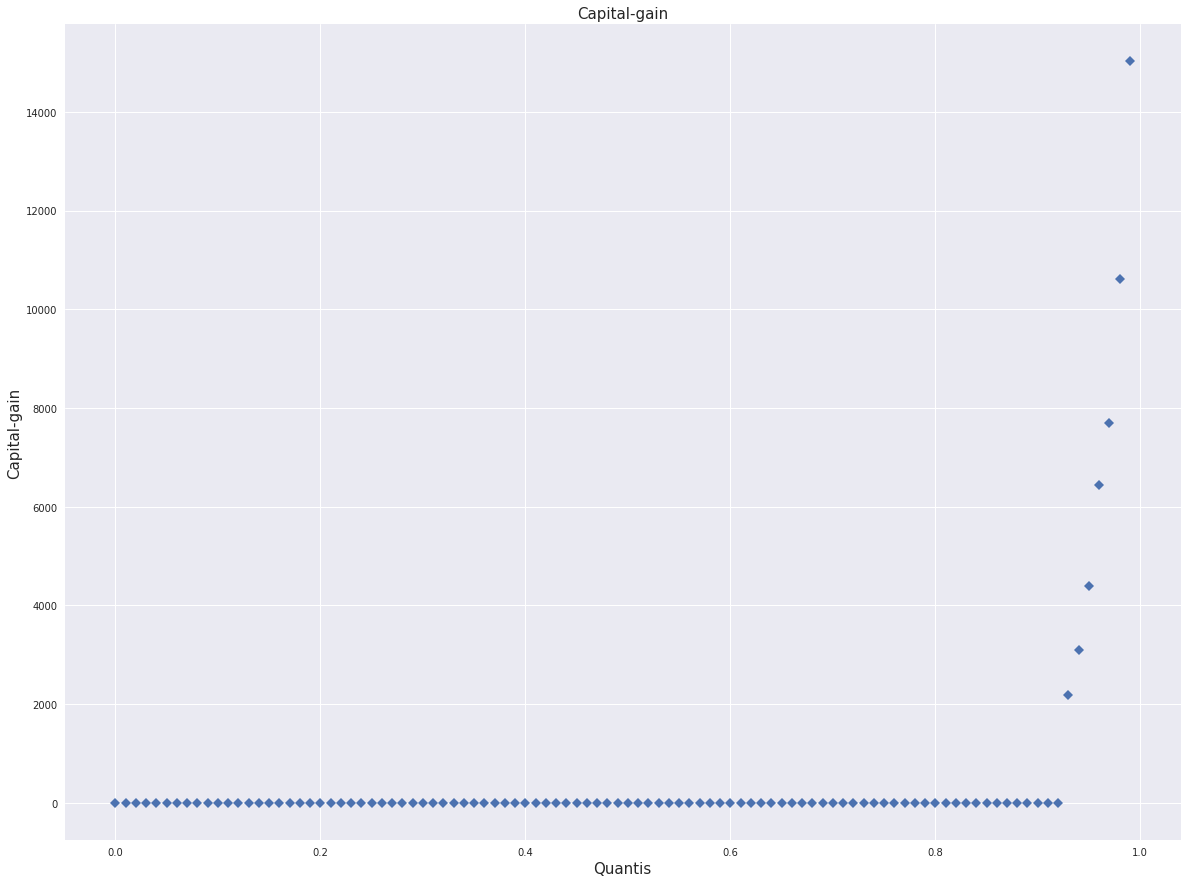

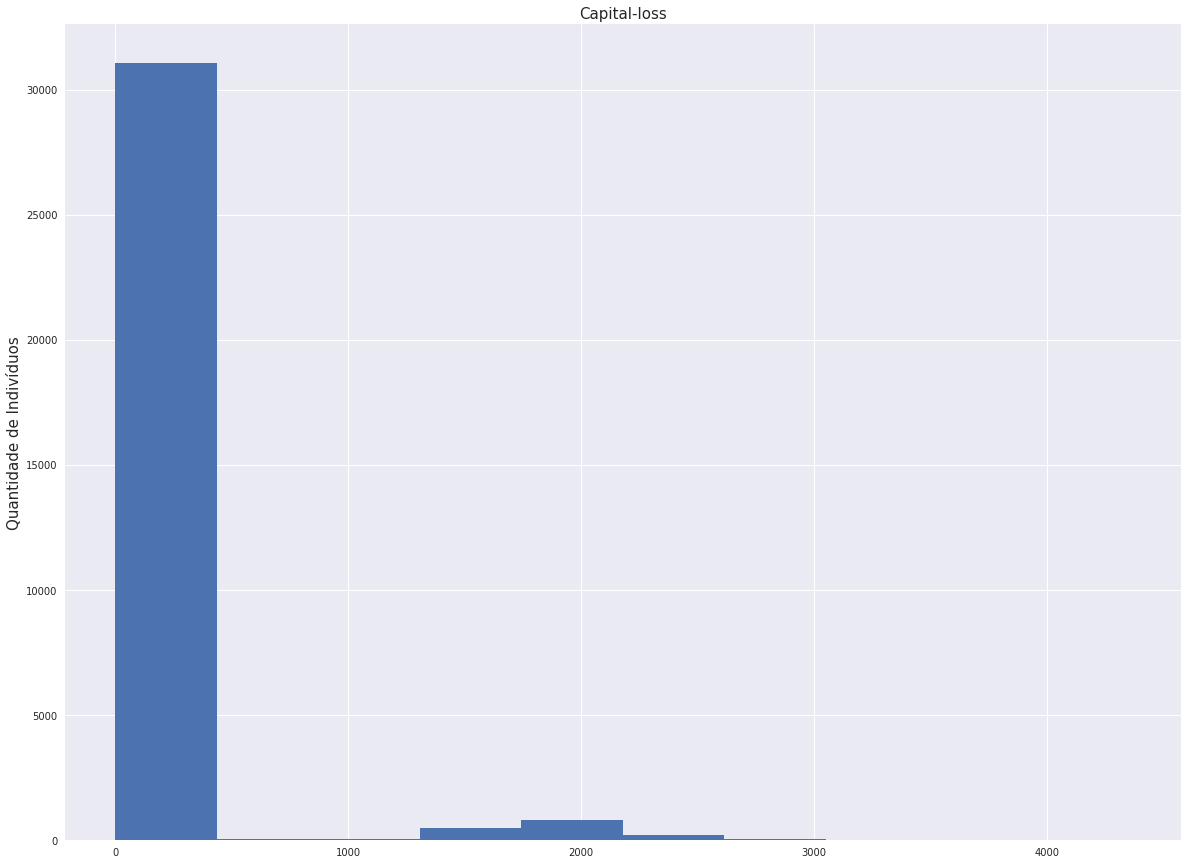

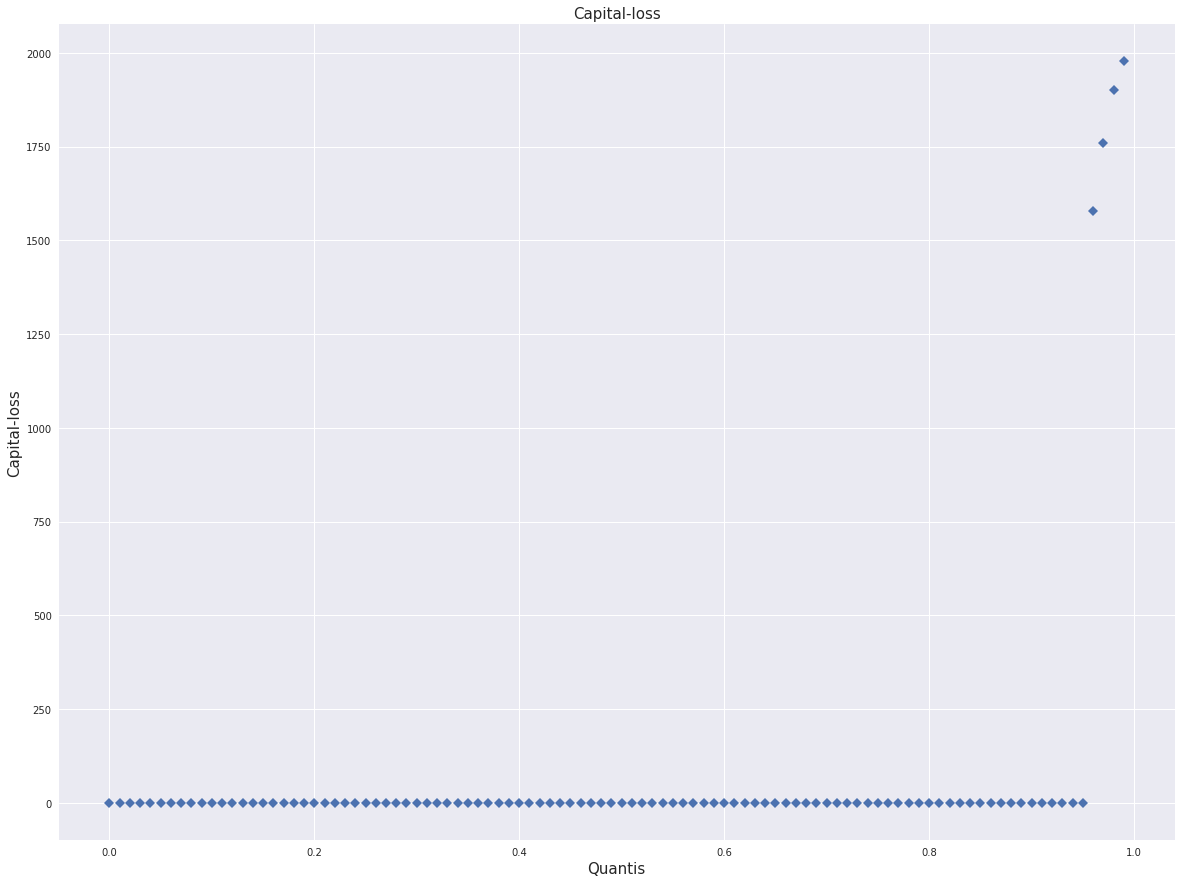

In [60]:
from scipy import stats

# Feature capital-gain

for i in range(4):
     
    plt.figure(figsize=(20,15))

    if i == 0:

        # plt.subplot(221)
        plt.hist(data["capital-gain"])
        # plt.xlabel('Capital-gain', fontsize=15)
        plt.ylabel('Quantidade de Indivíduos', fontsize=15)
        plt.title("Capital-gain",fontsize=15)
#         plt.show()
        
#         plt.savefig('capital-gain-hist.png')
    
    elif i == 1:
        #     plt.subplot(222)
        mq_capital_gain = stats.mstats.mquantiles(data['capital-gain'],np.arange(0,1,0.01))
        plt.plot(np.arange(0,1,0.01),mq_capital_gain,'D')
        # plt.plot(np.linspace(0,training_data['capital-gain'].values.max(),100), mq_capital_gain, '.')
        # stats.probplot(training_data["capital-gain"],plot=plt)
        plt.xlabel('Quantis', fontsize=15)
        plt.ylabel('Capital-gain', fontsize=15)
        plt.title("Capital-gain", fontsize=15)
#         plt.show()
        
#         plt.savefig('capital-gain-qplot.png')
        
    elif i == 2:
        
        # Feature capital-loss

#         plt.subplot(223)
        plt.hist(training_data["capital-loss"])
        # plt.xlabel('Capital-loss', fontsize=15)
        plt.ylabel('Quantidade de Indivíduos', fontsize=15)
        plt.title("Capital-loss",fontsize=15)
#         plt.show()
        
#         plt.savefig('capital-loss-hist.png')
        
    elif i == 3:
        
        #     plt.subplot(224)
        mq_capital_loss = stats.mstats.mquantiles(data['capital-loss'],np.arange(0,1,0.01))
        plt.plot(np.arange(0,1,0.01),mq_capital_loss,'D')
        # plt.plot(np.linspace(0,training_data['capital-loss'].values.max(),100), mq_capital_loss, '.')
        # stats.probplot(training_data["capital-loss"],plot=plt)
        plt.xlabel('Quantis', fontsize=15)
        plt.ylabel('Capital-loss', fontsize=15)
        plt.title('Capital-loss', fontsize=15)
#         plt.show()
        
#         plt.savefig('capital-loss-qplot.png')

        
print(data.loc[data["capital-gain"]>0].shape[0])
print(data.loc[data["capital-loss"]>0].shape[0])

    

#### Hours-per-week

1407


/home/gustavo/Faculdade/Doutorado/Disciplinas/Data_Mining/coc800-data-mining-trabalho/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


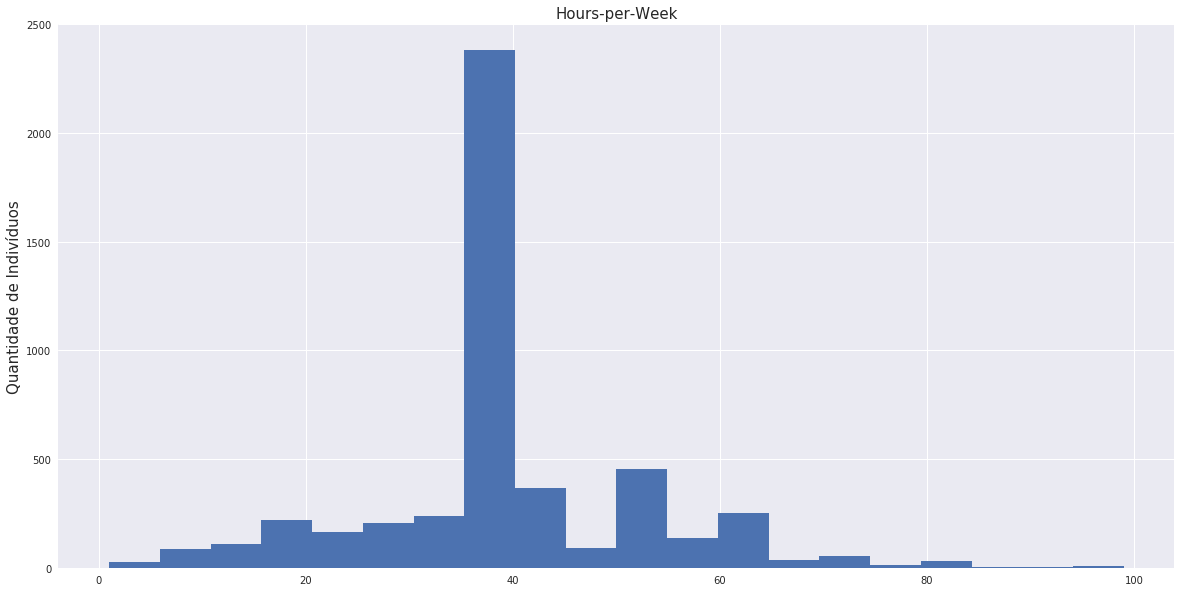

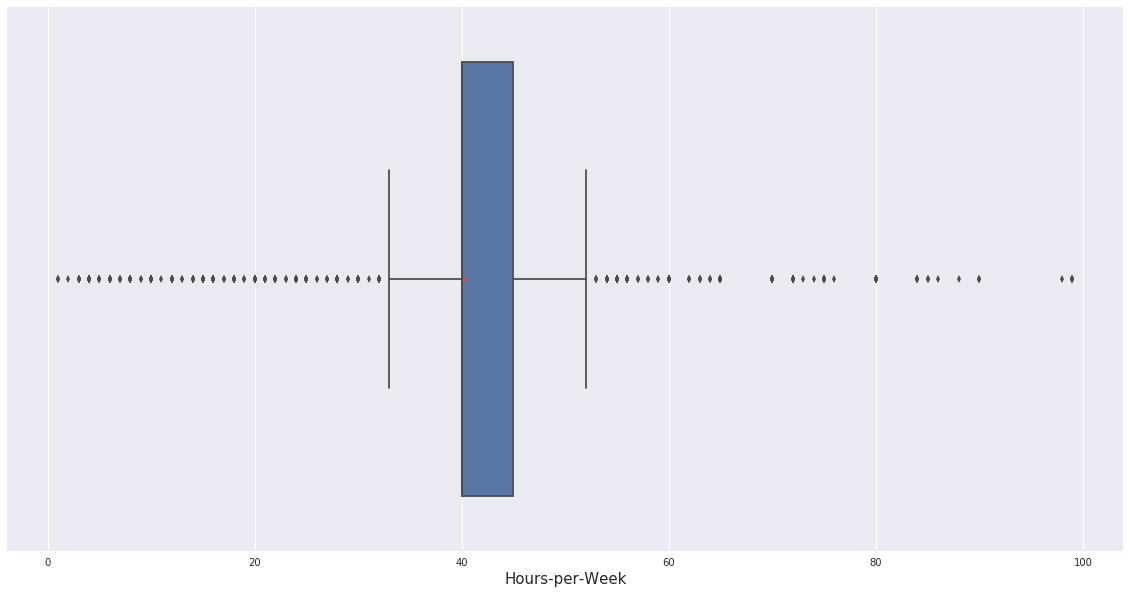

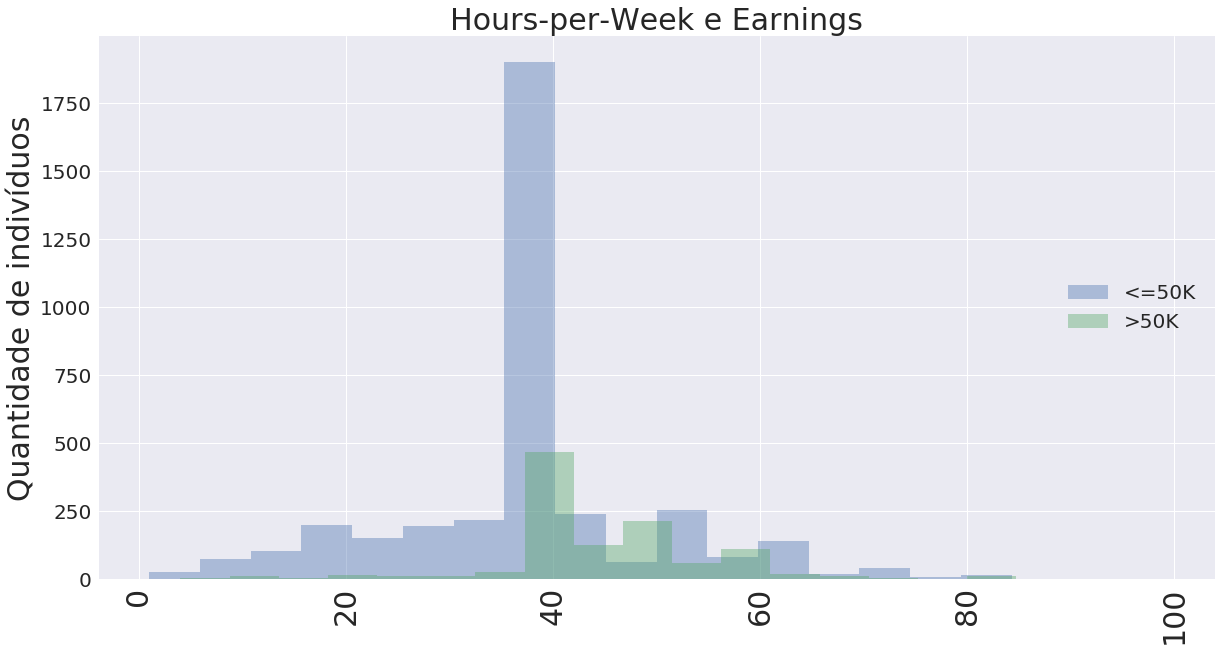

In [61]:
plt.figure(figsize=(20,10))
plt.hist(data['hours-per-week'], bins=20)
plt.ylabel('Quantidade de Indivíduos', fontsize=15)
plt.title("Hours-per-Week",fontsize=15)

# plt.savefig('hours-per-week-hist.png')

plt.figure(figsize=(20,10))
sns.boxplot(x=data['hours-per-week'].values,showmeans=True)
plt.xlabel('Hours-per-Week',fontsize=15)

# plt.savefig('hours-per-week-boxplot.png')

# Definição dos quantis
Q1, Q3 = data['hours-per-week'].quantile(0.25), data['hours-per-week'].quantile(0.75)

# Definição de IQR de acordo com o método de Tukey
IQR = Q3 - Q1

# De acordo com o boxplot, não existem outliers abaixo de Q1 - 1.5*IQR
outliers1 = data.loc[data['hours-per-week'] > (Q3 + 1.5 * IQR)]
outliers2 = data.loc[data['hours-per-week'] < (Q1 - 1.5 * IQR)]

# Visualização dos outliers
print(outliers1.shape[0]+outliers2.shape[0])

plt.figure(figsize=(20,10))

target_1 = data.loc[data['earnings']=='<=50K']
target_2 = data.loc[data['earnings']=='>50K']
# sns.kdeplot(target_1['hours-per-week'], label = '<=50K')
# sns.kdeplot(target_2['hours-per-week'], label = '>50K')
sns.distplot(target_1['hours-per-week'], label = '<=50K', kde=False, bins = 20)
sns.distplot(target_2['hours-per-week'], label = '>50K', kde=False, bins = 20)
plt.title('Hours-per-Week e Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xlabel('')
plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=20)
plt.legend(loc=5, prop={'size': 20})

plt.show()

# plt.savefig('hours-per-week-earnings-distplot.png')

### Relação entre os dados

In [62]:
categorical_features = list(data.select_dtypes(include=['object']).columns)
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'earnings']

In [63]:
continuous_features = list(data.select_dtypes(include=['float64']).columns)
data_cont = data[continuous_features]

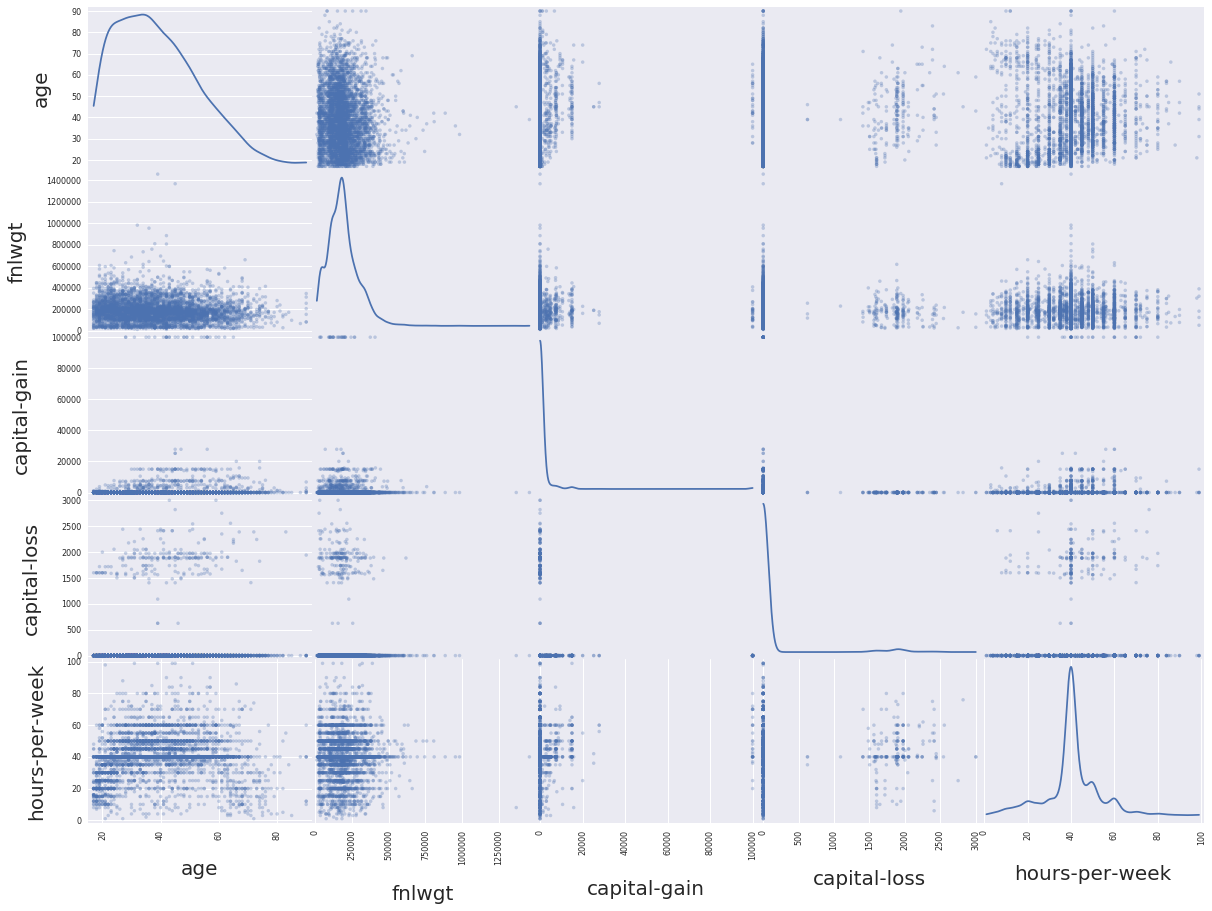

In [64]:
# pd.plotting.scatter_matrix(data_cont, alpha = 0.3, figsize=(14,8), diagonal = 'kde')
scatter_matrix = pd.plotting.scatter_matrix(data_cont, alpha = 0.3, figsize=(20,15), diagonal = 'kde')

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0, labelpad=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90, labelpad=20)
    
plt.savefig('./Graficos/scatter-matrix.png')

In [65]:
# sns.pairplot(data_cont,kind='reg')
# plt.show()

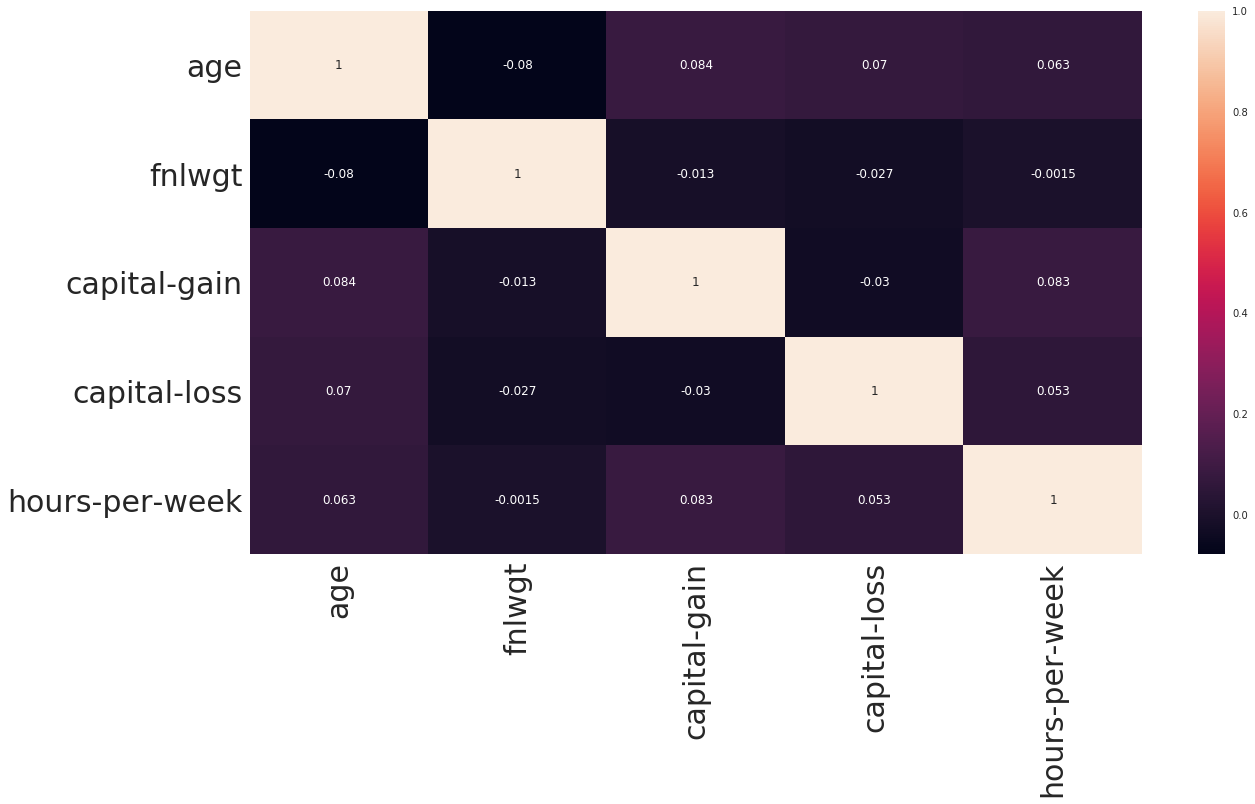

In [66]:
plt.figure(figsize=(20,10))
plt.yticks(rotation=90,fontsize=30)
plt.xticks(fontsize=30)
ax = sns.heatmap(data_cont.corr(),annot=True)
sns.set(font_scale=2)

plt.savefig('./Graficos/corr-matrix.png')

plt.show()

In [67]:
a = pd.crosstab(index=data.education, columns=data.earnings)

In [68]:
import scipy.stats as sps

chi2, pval, x,y = sps.chi2_contingency(a,correction=False)

In [69]:
chi2, pval, x

(624.7438103379098, 1.95408143186838e-123, 15)

In [70]:
len(data.education.unique())

16

In [71]:
# b = pd.crosstab(index=data['education-num'], columns=data.education)
# sps.chi2_contingency(b,correction=False)

In [72]:
# Correlação entre features categóricas usando o teste chi quadrado

# categorical_data = data.select_dtypes("object").copy()

# D = np.empty([categorical_data.shape[1], categorical_data.shape[1]])
# dof_matrix = np.empty([categorical_data.shape[1], categorical_data.shape[1]])
# pval_matrix = np.zeros([categorical_data.shape[1], categorical_data.shape[1]])

# aux = list(categorical_data.columns)

# for idx1, feature1 in enumerate(categorical_data.columns):
#     aux.pop(0)
#     for idx2, feature2 in enumerate(aux,idx1+1):
#         cont_table = pd.crosstab(index=categorical_data[feature1], columns=categorical_data[feature2])
#         chi2, pval, dof, y = sps.chi2_contingency(cont_table,correction=False)
#         D[idx2,idx1]= chi2
#         dof_matrix[idx2,idx1] = dof
#         pval_matrix[idx2,idx1] = pval
        
# pval_matrix[7,6]
# plt.matshow(pval_matrix)
# plt.show()


## Pré-processamento dos Dados

Diferentes pré-processamentos serão adotados, de forma a avaliar os impactos que alguns tratamentos de dados têm no desempenho final dos modelos treinados. Cada abordagem será salva em um dataset diferente. As diferentes abordagens de pré-processamento consideradas são:

1 - Retirada de valores faltantes e manutenção dos outliers

2 - Imputação dos valores faltantes pela moda de cada feature e manutenção dos outliers

3 - Imputação dos valores faltantes pela moda de cada feature e retirada dos outliers

4 - Retirada de valores faltantes e retirada dos outliers

In [73]:
# Importando os módulos necessários

from sklearn.model_selection import train_test_split # Divisão de conjunto de treinamento e teste

# Copiando o dataset para csv - usar esse dataset para calcular outliers usando o script desenvolvido para MATLAB

pd.get_dummies(data).to_csv(path_or_buf='dataset-amostrado-'+str(int(fracao_dataset*100))+'pct.csv',sep=',')

# Carregando os outliers encontrados no dataset

registros_outliers = pd.read_csv('indices-outliers-dataset-10pct.csv')
# print(data.shape)
# print(registros_outliers.shape)
# print(data_temp.drop(labels=a.values[:,0]).shape)

#### Tratamento das features numéricas

In [74]:
from scipy import stats

data_pre_proc = data.copy()

# Feature age

# data_pre_proc.age = (data_pre_proc.age - data_pre_proc.age.min())/(data_pre_proc.age.max() - data_pre_proc.age.min())
data_pre_proc.age = stats.zscore(data_pre_proc.age)

# Feature hours-per-week

# data_pre_proc['hours-per-week'] = (data_pre_proc['hours-per-week'] - data_pre_proc['hours-per-week'].min())/(data_pre_proc['hours-per-week'].max() - data_pre_proc['hours-per-week'].min())
data_pre_proc['hours-per-week'] = stats.zscore(data_pre_proc['hours-per-week'])

# Feature fnlwgt

# data_pre_proc['fnlwgt'] = (data_pre_proc['fnlwgt'] - data_pre_proc['fnlwgt'].min())/(data_pre_proc['fnlwgt'].max() - data_pre_proc['fnlwgt'].min())
data_pre_proc['fnlwgt'] = stats.zscore(data_pre_proc['fnlwgt'])

# Transformando a feature 'sex' em binária

# for idx in data_pre_proc.index.values:
# #     print(data_pre_proc.at[idx,'sex'])
#     data_pre_proc.at[idx,'sex'] = 1 if data_pre_proc.at[idx,'sex']=="Male" else 0
    
# # Renomeando a coluna 'sex' para 'is_male'

# data_pre_proc.rename(columns={'sex': 'is_male'}, inplace=True)
# data_pre_proc['is_male'] = pd.to_numeric(data_pre_proc['is_male'])

# Features capital-gain e capital-loss

abordagem = 2

# Abordagem 1: transformar em categórica

# Abordagem 2: juntar as duas em uma e aplicar z-score

if abordagem == 1:

    investment_status = list()

    for idx in data_pre_proc.index.values:
        if (data_pre_proc.at[idx,'capital-gain'] == 0) and (data_pre_proc.at[idx,'capital-loss'] > 0): # investimento trouxe prejuízo
    #         data_pre_proc.at[idx,'capital-gain'] = 'Loss'
            investment_status.append('Loss')
        elif (data_pre_proc.at[idx,'capital-gain'] > 0) and (data_pre_proc.at[idx,'capital-loss'] == 0): # investimento trouxe lucro
    #         data_pre_proc.at[idx,'capital-gain'] = 'Gain'
            investment_status.append('Gain')
        elif (data_pre_proc.at[idx,'capital-gain'] == 0) and (data_pre_proc.at[idx,'capital-loss'] == 0): # não houve investimento
    #         data_pre_proc.at[idx,'capital-gain'] = 'No'
            investment_status.append('No')

    data_pre_proc['investment-status'] = investment_status

    data_pre_proc.drop(columns=['capital-loss'], axis=1, inplace=True)
    data_pre_proc.drop(columns=['capital-gain'], axis=1, inplace=True)

elif abordagem == 2:
    
    for idx in data_pre_proc.index.values:
        if (data_pre_proc.at[idx,'capital-gain'] == 0) and (data_pre_proc.at[idx,'capital-loss'] > 0): # investimento trouxe prejuízo
            data_pre_proc.at[idx,'capital-gain'] = -data_pre_proc.at[idx,'capital-loss']
            
    # Removendo a coluna capital-loss
    data_pre_proc = data_pre_proc.drop(columns=['capital-loss'])
    
    # Normalizando pelo zscore
    
#     data_pre_proc['capital-gain'] = (data_pre_proc['capital-gain'] - data_pre_proc['capital-gain'].min())/(data_pre_proc['capital-gain'].max() - data_pre_proc['capital-gain'].min())
    data_pre_proc['capital-gain'] = stats.zscore(data_pre_proc['capital-gain'])
    
    # Renomeando a coluna capital-gain
    data_pre_proc = data_pre_proc.rename(columns={"capital-gain": "investment-status"})

# Reordenando as colunas do dataset
    
data_pre_proc = data_pre_proc[['age','fnlwgt','hours-per-week','investment-status','workclass','education','marital-status','occupation','relationship','race','sex','native-country','earnings']]

# indices_removidos = set(data_pre_proc.loc[data_pre_proc['age']>3].index)
# indices_removidos.union(set(data_pre_proc.loc[data_pre_proc['age']<-3].index))
# indices_removidos.union(set(data_pre_proc.loc[data_pre_proc['hours-per-week']>3].index))
# indices_removidos.union(set(data_pre_proc.loc[data_pre_proc['hours-per-week']<-3].index))
# indices_removidos.union(set(data_pre_proc.loc[data_pre_proc['investment-status']>3].index))
# indices_removidos.union(set(data_pre_proc.loc[data_pre_proc['investment-status']<-3].index))
# indices_removidos.union(set(data_pre_proc.loc[data_pre_proc['fnlwgt']>3].index))
# indices_removidos.union(set(data_pre_proc.loc[data_pre_proc['fnlwgt']<-3].index))

# data_pre_proc = data_pre_proc[(data_pre_proc['age'].between(-3,3,inclusive=True))&(data_pre_proc['hours-per-week'].between(-3,3,inclusive=True))&(data_pre_proc['investment-status'].between(-3,3,inclusive=True))&(data_pre_proc['fnlwgt'].between(-3,3,inclusive=True))]


# Plot das distribuições normalizadas

# data_pre_proc['investment-status'].plot.hist(bins=100)
# plt.show()

# data_pre_proc['age'].plot.hist(bins=100)
# plt.show()

# data_pre_proc['hours-per-week'].plot.hist(bins=100)
# plt.show()

# data_pre_proc['fnlwgt'].plot.hist(bins=100)
# plt.show()

# temp = data_pre_proc[(data_pre_proc['age'].between(-3,3,inclusive=True))&(data_pre_proc['hours-per-week'].between(-3,3,inclusive=True))&(data_pre_proc['investment-status'].between(-3,3,inclusive=True))&(data_pre_proc['fnlwgt'].between(-3,3,inclusive=True))]

# print('Tamanho Original: {}'.format(data_pre_proc.shape[0]))
# print('Tamanho Reduzido: {}'.format(temp.shape[0]))

In [75]:
np.percentile(data_pre_proc['investment-status'], 92)

-0.12710540458386055

#### Agrupamento de valores de features categóricas

In [76]:
# Feature Native-Country

country_south_america = set({' Columbia', ' Ecuador', ' Peru'})
country_north_america = set({' United-States', ' Mexico', ' Canada', ' Outlying-US(Guam-USVI-etc)'})
country_central_america = set({' Puerto-Rico', ' Dominican-Republic', ' Cuba', ' El-Salvador', ' Jamaica', ' Guatemala', ' Haiti', ' Nicaragua', ' Honduras', ' Trinadad&Tobago', ' Panama'})
country_europe = set({' Italy', ' Germany', ' Poland', ' England', ' Ireland', ' Portugal', ' Greece', ' Hungary', ' Scotland', ' Yugoslavia', ' France', ' Holand-Netherlands'})
country_asia = set({' Philippines', ' China', ' India', ' South', ' Vietnam', ' Japan', ' Iran', ' Taiwan', ' Cambodia', ' Laos', ' Thailand', ' Hong'})

data_pre_proc.replace(dict.fromkeys(country_south_america, 'South-America'), inplace=True)
data_pre_proc.replace(dict.fromkeys(country_north_america, 'North-America'), inplace=True)
data_pre_proc.replace(dict.fromkeys(country_central_america, 'Central-America'), inplace=True)
data_pre_proc.replace(dict.fromkeys(country_europe, 'Europe'), inplace=True)
data_pre_proc.replace(dict.fromkeys(country_asia, 'Asia'), inplace=True)

# Feature race

# race_white = set({' White'})
# race_black = set({' Black'})
race_other = set({' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Other'})

data_pre_proc.replace(dict.fromkeys(race_other, 'Other'), inplace=True)
# data_pre_proc.replace(dict.fromkeys(race_white, 'White'), inplace=True)
# data_pre_proc.replace(dict.fromkeys(race_black, 'Black'), inplace=True)

data_pre_proc.race = data_pre_proc.race.str.strip()

# Feature workclass

# workclass_private = set({' Private'})
workclass_government = set({' State-gov', ' Federal-gov', ' Local-gov'})
workclass_other = set({ ' Self-emp-inc', ' Self-emp-not-inc', ' Never-worked', ' Without-pay'})

# data_pre_proc.replace(dict.fromkeys(workclass_private, 'Private'), inplace=True)
data_pre_proc.replace(dict.fromkeys(workclass_government, 'Government'), inplace=True)
data_pre_proc.replace(dict.fromkeys(workclass_other, 'Other'), inplace=True)

data_pre_proc.workclass = data_pre_proc.workclass.str.strip()

# Feature marital-status

marital_married = set({' Married-spouse-absent', ' Married-AF-spouse', ' Married-civ-spouse', ' Separated'})
marital_once_married = set({' Divorced', ' Widowed'})
# marital_never_married = set({' Never-Married'})

data_pre_proc.replace(dict.fromkeys(marital_married, 'Married'), inplace=True)
data_pre_proc.replace(dict.fromkeys(marital_once_married, 'Once-Married'), inplace=True)
# data_pre_proc.replace(dict.fromkeys(marital_never_married, 'Never-Married'), inplace=True)

data_pre_proc['marital-status'] = data_pre_proc['marital-status'].str.strip()

# Feature relationship

relationship_spouse = set({' Husband', ' Wife'})
relationship_other = set({' Own-Child', ' Other-relative'})
# relationship_unmarried = set({' Unmarried'})
# relationship_not_in_family = set({' Not-in-family'})

data_pre_proc.replace(dict.fromkeys(relationship_spouse, 'Spouse'), inplace=True)
data_pre_proc.replace(dict.fromkeys(relationship_other, 'Other'), inplace=True)
# data_pre_proc.replace(dict.fromkeys(relationship_unmarried, 'Unmarried'), inplace=True)
# data_pre_proc.replace(dict.fromkeys(relationship_not_in_family, 'Not-in-family'), inplace=True)

data_pre_proc.relationship = data_pre_proc.relationship.str.strip()

# Feature occupation

occupation_blue_collar = set({' Craft-repair', ' Machine-op-inspct', ' Transport-moving', ' Handlers-cleaners'})
occupation_other_service = set({' Priv-house-serv', ' Protective-serv', ' Farming-fishing', ' Armed-Forces', ' Other-service', ' Tech-support'})

data_pre_proc.replace(dict.fromkeys(occupation_blue_collar, 'Blue-Collar'), inplace=True)
data_pre_proc.replace(dict.fromkeys(occupation_other_service, 'Other-service'), inplace=True)

data_pre_proc.occupation = data_pre_proc.occupation.str.strip()

# Feature education

education_compulsory_education_incomplete = set({' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' Preschool'})
education_compulsory_education_complete = set({' HS-grad'})
education_undergrad_incomplete = set({' Some-college'})
education_undergrad_complete = set({' Bachelors'})
education_graduates = set({' Doctorate', ' Masters', ' Prof-school'})
education_associates = set({' Assoc-voc', ' Assoc-acdm'})

data_pre_proc.replace(dict.fromkeys(education_compulsory_education_incomplete, 'Compulsory-education-incomplete'), inplace=True)
data_pre_proc.replace(dict.fromkeys(education_compulsory_education_complete, 'Compulsory-education-complete'), inplace=True)
data_pre_proc.replace(dict.fromkeys(education_undergrad_incomplete, 'Undergrad-incomplete'), inplace=True)
data_pre_proc.replace(dict.fromkeys(education_undergrad_complete, 'Undergrad-complete'), inplace=True)
data_pre_proc.replace(dict.fromkeys(education_graduates, 'Graduates'), inplace=True)
data_pre_proc.replace(dict.fromkeys(education_associates, 'Associates'), inplace=True)

In [77]:
# # Testando chi quadrado para as features categóricas processadas - ignorar esta célula

# # categorical_data = data_pre_proc.select_dtypes("object").copy()
# # categorical_data.head()
# # categorical_data.drop(columns=['native-country', 'workclass', 'education', 'relationship', 'occupation', 'earnings', 'marital-status'],inplace=True)

# # D = np.empty([categorical_data.shape[1], categorical_data.shape[1]])
# # dof_matrix = np.empty([categorical_data.shape[1], categorical_data.shape[1]])
# # pval_matrix = np.zeros([categorical_data.shape[1], categorical_data.shape[1]])

# # aux = list(categorical_data.columns)

# # for idx1, feature1 in enumerate(categorical_data.columns):
# #     aux.pop(0)
# #     for idx2, feature2 in enumerate(aux,idx1+1):
# #         cont_table = pd.crosstab(index=categorical_data[feature1], columns=categorical_data[feature2])
# #         display(cont_table)
# #         chi2, pval, dof, y = stats.chi2_contingency(cont_table,correction=False)
# #         D[idx2,idx1]= chi2
# #         dof_matrix[idx2,idx1] = dof
# #         pval_matrix[idx2,idx1] = pval
        
# # # # pval_matrix[7,6]
# # plt.matshow(pval_matrix)
# # plt.show()

# # print('Maior p-value encontrado: {}'.format(pval_matrix.max()))

In [78]:
# # Calculando a estatística de chi quadrado na mão para duas features categóricas - ignorar esta célula

# # temp = data_pre_proc[(data_pre_proc['marital-status']=='Married')&(data_pre_proc['occupation']=='Blue-Collar')]
# # temp.shape
# exp_freq = stats.contingency.expected_freq(cont_table)

# print('Frequências esperadas para cada célula da tabela de contingência das features:\n')
# print(exp_freq)
# print('\n')

# (2308+857+13027)*(2377+2308)/cont_table.sum().sum()

# print('Estatística do chi-quadrado calculada na mão: %f' % np.divide(np.square((cont_table-exp_freq)), exp_freq).sum().sum())

# # Pro caso das features em questão sendo comparadas serem race e sex
# print('Estatística do chi-quadrado calculada pelo algoritmo anterior: %f' % D[1,0])
# # D

In [79]:
# Tentativa de clusterizar os dados, em busca de outliers - ignorar esta célula

# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# np.random.seed(0)
# # a = np.zeros([data.shape[0], 10])

# data_temp = data.sample(frac=0.1, replace=False, random_state=0)
# data_temp.shape

# n_clusters_max = 2
# n_rodadas = 10

# silhouette_scores_avg = np.zeros([n_rodadas, n_clusters_max])

# for num_clusters in range(2,n_clusters_max+2):
#     rseed_mem = list()
#     for i in range (0,n_rodadas):
#         rseed = np.random.randint(low=0,high=100)
#         while rseed in rseed_mem:
#             rseed = np.random.randint(low=0,high=100)
#         rseed_mem.append(rseed)   
#         c = KMeans(n_clusters=num_clusters, random_state=rseed, n_init = 1)
#         clabels = c.fit_predict(pd.get_dummies(data_temp.drop(columns='earnings')))
# #         silhouette_scores_avg[i, num_clusters-2] = silhouette_score(pd.get_dummies(data_temp.drop(columns='earnings')), labels=clabels)
# #         for j in range(0,len(clabels)-1):
# #             a[j,i] = clabels[j]

# # silhouette_scores_avg

# # teste = pd.DataFrame(silhouette_scores_avg)
# # teste



#### Tratamento do target ('earnings')

In [80]:
# Substituindo as labels de 'earnings' para -1 (<=50K) e 1 (>50K)

for i in data_pre_proc['earnings'].index.values:
    data_pre_proc.at[i, 'earnings'] = -1 if data_pre_proc.at[i, 'earnings']=="<=50K" else 1

data_pre_proc['earnings'] = pd.to_numeric(data_pre_proc['earnings'])

#### Gerando os 4 cenários de pré-processamento

In [81]:
## Abordagem 1 - Retirar registros com valores faltantes e manter outliers

data_pre_proc_1 = data_pre_proc.copy()

# Removendo registros com valores faltantes

data_pre_proc_1.drop(labels=list(data_pre_proc_1.loc[data_pre_proc_1['workclass']=='Others'].index), axis=0, inplace=True)
data_pre_proc_1.drop(labels=list(data_pre_proc_1.loc[data_pre_proc_1['native-country']=='Others'].index), axis=0, inplace=True)
data_pre_proc_1.drop(labels=list(data_pre_proc_1.loc[data_pre_proc_1['occupation']=='Others'].index), axis=0, inplace=True)

print('Abordagem 1')
print('Tamanho original do dataset: %d' % data_pre_proc.shape[0])
print('Tamanho após pré-processamento: %d' % data_pre_proc_1.shape[0])
print('Porcentagem registros removidos: %.3f %%\n' % ((1-data_pre_proc_1.shape[0]/data_pre_proc.shape[0])*100))

# Separando o target ('earnings')

# target_1 = data_pre_proc_1['earnings']
# data_pre_proc_1.drop(columns='earnings', inplace=True)

# # Dividindo o conjunto de dados em treinamento e teste

# train_data_1, test_data_1, train_target_1, test_target_1 = train_test_split(
#     data_pre_proc_1, target_1, test_size=0.33, random_state=0)


## Abordagem 2 - Imputar valores faltantes pela moda das features em questão e manter outliers

data_pre_proc_2 = data_pre_proc.copy()

# Imputando valores faltantes pela moda da feature

data_pre_proc_2['workclass'].replace('Others', str(data_pre_proc_2['workclass'].mode()[0]), inplace=True)
data_pre_proc_2['native-country'].replace('Others', str(data_pre_proc_2['native-country'].mode()[0]), inplace=True)
data_pre_proc_2['occupation'].replace('Others', str(data_pre_proc_2['occupation'].mode()[0]), inplace=True)

print('Abordagem 2')
print('Tamanho original do dataset: %d' % data_pre_proc.shape[0])
print('Tamanho após pré-processamento: %d' % data_pre_proc_2.shape[0])
print('Porcentagem registros removidos: %.3f %%\n' % ((1-data_pre_proc_2.shape[0]/data_pre_proc.shape[0])*100))

# Separando o target ('earnings')

# target_2 = data_pre_proc_2['earnings']
# data_pre_proc_2.drop(columns='earnings', inplace=True)

# # Dividindo o conjunto de dados em treinamento e teste

# train_data_2, test_data_2, train_target_2, test_target_2 = train_test_split(
#     data_pre_proc_2, target_2, test_size=0.33, random_state=0)


## Abordagem 3 - Imputar valores faltantes pela moda das features em questão e retirar outliers

data_pre_proc_3 = data_pre_proc.copy()

# Imputando valores faltantes pela moda da feature

data_pre_proc_3['workclass'].replace('Others', str(data_pre_proc_3['workclass'].mode()[0]), inplace=True)
data_pre_proc_3['native-country'].replace('Others', str(data_pre_proc_3['native-country'].mode()[0]), inplace=True)
data_pre_proc_3['occupation'].replace('Others', str(data_pre_proc_3['occupation'].mode()[0]), inplace=True)

# Retirando outliers

indices_registros_outliers = set(registros_outliers.values[:,0])

# data_pre_proc_3.drop(labels=indices_registros_outliers-indices_removidos, inplace=True)
data_pre_proc_3.drop(labels=indices_registros_outliers, inplace=True)

print('Abordagem 3')
print('Tamanho original do dataset: %d' % data_pre_proc.shape[0])
print('Tamanho após pré-processamento: %d' % data_pre_proc_3.shape[0])
print('Porcentagem registros removidos: %.3f %%\n' % ((1-data_pre_proc_3.shape[0]/data_pre_proc.shape[0])*100))

# Separando o target ('earnings')

# target_3 = data_pre_proc_3['earnings']
# data_pre_proc_3.drop(columns='earnings', inplace=True)

# # Dividindo o conjunto de dados em treinamento e teste

# train_data_3, test_data_3, train_target_3, test_target_3 = train_test_split(
#     data_pre_proc_3, target_3, test_size=0.33, random_state=0)


## Abordagem 4 - Retirar registros com valores faltantes e retirar outliers

# Removendo registros com valores faltantes

data_pre_proc_4 = data_pre_proc.copy()

indices_workclass_others = set(data_pre_proc_4.loc[data_pre_proc_4['workclass']=='Others'].index)
indices_native_country_others = set(data_pre_proc_4.loc[data_pre_proc_4['native-country']=='Others'].index)
indices_occupation_others = set(data_pre_proc_4.loc[data_pre_proc_4['occupation']=='Others'].index)
indices_registros_faltantes = indices_workclass_others.union(indices_native_country_others.union(indices_occupation_others))

data_pre_proc_4.drop(labels=list(data_pre_proc_4.loc[data_pre_proc_4['workclass']=='Others'].index), axis=0, inplace=True)
data_pre_proc_4.drop(labels=list(data_pre_proc_4.loc[data_pre_proc_4['native-country']=='Others'].index), axis=0, inplace=True)
data_pre_proc_4.drop(labels=list(data_pre_proc_4.loc[data_pre_proc_4['occupation']=='Others'].index), axis=0, inplace=True)

# Retirando outliers

# data_pre_proc_4.drop(labels=indices_registros_outliers-(indices_registros_faltantes.union(indices_removidos)), inplace=True)
data_pre_proc_4.drop(labels=indices_registros_outliers-indices_registros_faltantes, inplace=True)

print('Abordagem 4')
print('Tamanho original do dataset: %d' % data_pre_proc.shape[0])
print('Tamanho após pré-processamento: %d' % data_pre_proc_4.shape[0])
print('Porcentagem registros removidos: %.3f %%\n' % ((1-data_pre_proc_4.shape[0]/data_pre_proc.shape[0])*100))

# Separando o target ('earnings')

# target_4 = data_pre_proc_4['earnings']
# data_pre_proc_4.drop(columns='earnings', inplace=True)

# # Dividindo o conjunto de dados em treinamento e teste

# train_data_4, test_data_4, train_target_4, test_target_4 = train_test_split(
#     data_pre_proc_4, target_4, test_size=0.33, random_state=0)

Abordagem 1
Tamanho original do dataset: 4884
Tamanho após pré-processamento: 4510
Porcentagem registros removidos: 7.658 %

Abordagem 2
Tamanho original do dataset: 4884
Tamanho após pré-processamento: 4884
Porcentagem registros removidos: 0.000 %

Abordagem 3
Tamanho original do dataset: 4884
Tamanho após pré-processamento: 4395
Porcentagem registros removidos: 10.012 %

Abordagem 4
Tamanho original do dataset: 4884
Tamanho após pré-processamento: 4121
Porcentagem registros removidos: 15.622 %



In [82]:
# Exportando os datasets pré-processados

path_arquivos = 'Data/'

data_pre_proc_1.to_csv(path_or_buf=path_arquivos+'data-pre-proc-1.csv', sep=',')
data_pre_proc_2.to_csv(path_or_buf=path_arquivos+'data-pre-proc-2.csv', sep=',')
data_pre_proc_3.to_csv(path_or_buf=path_arquivos+'data-pre-proc-3.csv', sep=',')
data_pre_proc_4.to_csv(path_or_buf=path_arquivos+'data-pre-proc-4.csv', sep=',')

## Análise de Modelos

Serão treinados diferentes modelos, para cada um dos pré-processamentos adequados. Os modelos serão sempre comparados, assumindo que todos tiveram o mesmo pré-processamento (dentre os 4 possíveis). Em cada caso, é interessante avaliar, também, os efeitos do desbalanceamento das classes de saída (isto é, realizar os treinamentos compensando e não compensando o desbalanceamento). Os modelos considerados são:

1 - Árvores de Decisão

2 - Support Vector Machines (SVM)

3 - Redes Neurais

4 - Naive Bayes

5 - Linear Discriminant Analysis (LDA)

6 - Quadratic Discriminant Analysis (QDA)

7 - Regressão Logística (só se der tempo)

Extra (Ensembles - só se der tempo):

Random Forest

Gradient Boosting

## Referências Bibliográficas

[1] (Online) UCI Machine Learning Repository: Census Income Dataset. Disponível em https://archive.ics.uci.edu/ml/datasets/Census+Income. Último acesso: 21/03/2018 às 00:22 horas.<br>

[2] (Online) UCI Machine Learning Repository: Census Income KDD. Disponível em https://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD). Último acesso: 21/03/2018 às 01:30 horas.<br>

[3] (Online) Classifying Income data from Census 1994 Data. Disponível em https://cseweb.ucsd.edu/~jmcauley/cse190/reports/sp15/024.pdf. Último acesso: 21/03/2018 às 01:32 horas.<br>

[4] Ristanoski, Goce & Liu, Wei & Bailey, James. (2013). Discrimination aware classification for imbalanced datasets. International Conference on Information and Knowledge Management, Proceedings. 1529-1532. 10.1145/2505515.2507836.<br>

[5] Hunter, John D. "Matplotlib: A 2D graphics environment." Computing in science & engineering 9.3 (2007): 90-95.

[6] (Online) Esperança de vida. Disponível em https://pt.wikipedia.org/wiki/Esperan%C3%A7a_de_vida. Último acesso: 23/04/2018 às 16:05 horas.<br>

[7] (Online) Vital Statistics of the United States, 1994, Preprint of Volume II, Mortality, Part A, Section 6. https://www.cdc.gov/nchs/data/lifetables/life94_2.pdf. Último acesso: 23/04/2018 às 16:05 horas.<br>

[8] An Introduction to ROC Analysis, Tom Fawcett, 2005, Pattern Recognition Letters 27. Disponível em: http://people.inf.elte.hu/kiss/11dwhdm/roc.pdf<br>